# <font color='red'> Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as mn
import matplotlib.pyplot as plt
import scipy.stats as stat
from scipy.stats import shapiro
import pylab
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from statsmodels.graphics.regressionplots import influence_plot
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# <font color = 'Red'> Importing Data 

In [2]:
raw_data = pd.read_excel('Toyota.xlsx')
raw_data

Id                                              Model  Price  \
0        1      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500   
1        2      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750   
2        3      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950   
3        4      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950   
4        5        TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750   
...    ...                                                ...    ...   
1431  1438         TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors   7500   
1432  1439  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...  10845   
1433  1440  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   8500   
1434  1441  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   7250   
1435  1442        TOYOTA Corolla 1.6 LB LINEA TERRA 4/5-Doors   6950   

      Age_08_04  Mfg_Month  Mfg_Year     KM Fuel_Type     HP  Met_Color  ...  \
0            23         10      2002  46986    Diesel   90.0          1  ...   
1            23         10      2002  72937    Diesel   90.0          1  ...   
2            24          9      2002  41711    Diesel   90.0          1  ...   
3            26          7      2002  48000    Diesel   90.0          0  ...   
4            30          3      2002  38500    Diesel   90.0          0  ...   
...         ...        ...       ...    ...       ...    ...        ...  ...   
1431         69         12      1998  20544    Petrol   86.0          1  ...   
1432         72          9      1998  19000    Petrol   86.0          0  ...   
1433         71         10      1998  17016    Petrol   86.0          0  ...   
1434         70         11      1998  16916    Petrol   86.0          1  ...   
1435         76          5      1998      1    Petrol  110.0          0  ...   

     Central_Lock  Powered_Windows  Power_Steering  Radio  Mistlamps  \
0               1                1               1      0          0   
1               1                0               1      0          0   
2               0                0               1      0          0   
3               0                0               1      0          0   
4               1                1               1      0          1   
...           ...              ...             ...    ...        ...   
1431            1                1               1      0          1   
1432            0                0               1      0          0   
1433            0                0               1      0          0   
1434            0                0               0      0          0   
1435            0                0               1      0          0   

      Sport_Model  Backseat_Divider  Metallic_Rim  Radio_cassette  Tow_Bar  
0               0                 1             0               0        0  
1               0                 1             0               0        0  
2               0                 1             0               0        0  
3               0                 1             0               0        0  
4               0                 1             0               0        0  
...           ...               ...           ...             ...      ...  
1431            1                 1             0               0        0  
1432            1                 1             0               0        0  
1433            0                 1             0               0        0  
1434            0                 1             0               0        0  
1435            0                 0             0               0        0  

[1436 rows x 38 columns]

# <font color = 'red'> EDA

###### Selecting the required columns, renaming columns and storing it in another Dataframe

In [3]:
raw_data.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [4]:
data= raw_data[["Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight","Price"]]
data

Age_08_04     KM     HP    cc  Doors  Gears  Quarterly_Tax  Weight  \
0            23  46986   90.0  2000      3      5            210    1165   
1            23  72937   90.0  2000      3      5            210    1165   
2            24  41711   90.0  2000      3      5            210    1165   
3            26  48000   90.0  2000      3      5            210    1165   
4            30  38500   90.0  2000      3      5            210    1170   
...         ...    ...    ...   ...    ...    ...            ...     ...   
1431         69  20544   86.0  1300      3      5             69    1025   
1432         72  19000   86.0  1300      3      5             69    1015   
1433         71  17016   86.0  1300      3      5             69    1015   
1434         70  16916   86.0  1300      3      5             69    1015   
1435         76      1  110.0  1600      5      5             19    1114   

      Price  
0     13500  
1     13750  
2     13950  
3     14950  
4     13750  
...     ...  
1431   7500  
1432  10845  
1433   8500  
1434   7250  
1435   6950  

[1436 rows x 9 columns]

In [5]:
data =data.rename({'Age_08_04':'Age','cc':'CC','Quarterly_Tax':'QT'}, axis=1)
data

Age     KM     HP    CC  Doors  Gears   QT  Weight  Price
0      23  46986   90.0  2000      3      5  210    1165  13500
1      23  72937   90.0  2000      3      5  210    1165  13750
2      24  41711   90.0  2000      3      5  210    1165  13950
3      26  48000   90.0  2000      3      5  210    1165  14950
4      30  38500   90.0  2000      3      5  210    1170  13750
...   ...    ...    ...   ...    ...    ...  ...     ...    ...
1431   69  20544   86.0  1300      3      5   69    1025   7500
1432   72  19000   86.0  1300      3      5   69    1015  10845
1433   71  17016   86.0  1300      3      5   69    1015   8500
1434   70  16916   86.0  1300      3      5   69    1015   7250
1435   76      1  110.0  1600      5      5   19    1114   6950

[1436 rows x 9 columns]

###### Descriptive Statistics

In [6]:
data.describe()

Age             KM           HP           CC        Doors  \
count  1436.000000    1436.000000  1434.000000   1436.00000  1436.000000   
mean     55.947075   68533.259749   101.513250   1576.85585     4.033426   
std      18.599988   37506.448872    14.987975    424.38677     0.952677   
min       1.000000       1.000000    69.000000   1300.00000     2.000000   
25%      44.000000   43000.000000    90.000000   1400.00000     3.000000   
50%      61.000000   63389.500000   110.000000   1600.00000     4.000000   
75%      70.000000   87020.750000   110.000000   1600.00000     5.000000   
max      80.000000  243000.000000   192.000000  16000.00000     5.000000   

             Gears           QT      Weight         Price  
count  1436.000000  1436.000000  1436.00000   1436.000000  
mean      5.026462    87.122563  1072.45961  10730.824513  
std       0.188510    41.128611    52.64112   3626.964585  
min       3.000000    19.000000  1000.00000   4350.000000  
25%       5.000000    69.000000  1040.00000   8450.000000  
50%       5.000000    85.000000  1070.00000   9900.000000  
75%       5.000000    85.000000  1085.00000  11950.000000  
max       6.000000   283.000000  1615.00000  32500.000000

###### Checking datatypes and null values and duplicated values

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     1436 non-null   int64  
 1   KM      1436 non-null   int64  
 2   HP      1434 non-null   float64
 3   CC      1436 non-null   int64  
 4   Doors   1436 non-null   int64  
 5   Gears   1436 non-null   int64  
 6   QT      1436 non-null   int64  
 7   Weight  1436 non-null   int64  
 8   Price   1436 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 101.1 KB


In [8]:
data.isnull().sum()

Age       0
KM        0
HP        2
CC        0
Doors     0
Gears     0
QT        0
Weight    0
Price     0
dtype: int64

###### 
+ We can see there are 2 null values in HP column

In [9]:
data[data.duplicated()]

Age     KM     HP    CC  Doors  Gears   QT  Weight  Price
113    8  13253  116.0  2000      5      5  234    1320  24950

In [10]:
data = data.drop(data[data.duplicated()].index)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1435 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     1435 non-null   int64  
 1   KM      1435 non-null   int64  
 2   HP      1433 non-null   float64
 3   CC      1435 non-null   int64  
 4   Doors   1435 non-null   int64  
 5   Gears   1435 non-null   int64  
 6   QT      1435 non-null   int64  
 7   Weight  1435 non-null   int64  
 8   Price   1435 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 112.1 KB


###### 
+ we had a duplicate value, hence we dropped that record

###### Checking the distribution of NULL values through missingno library

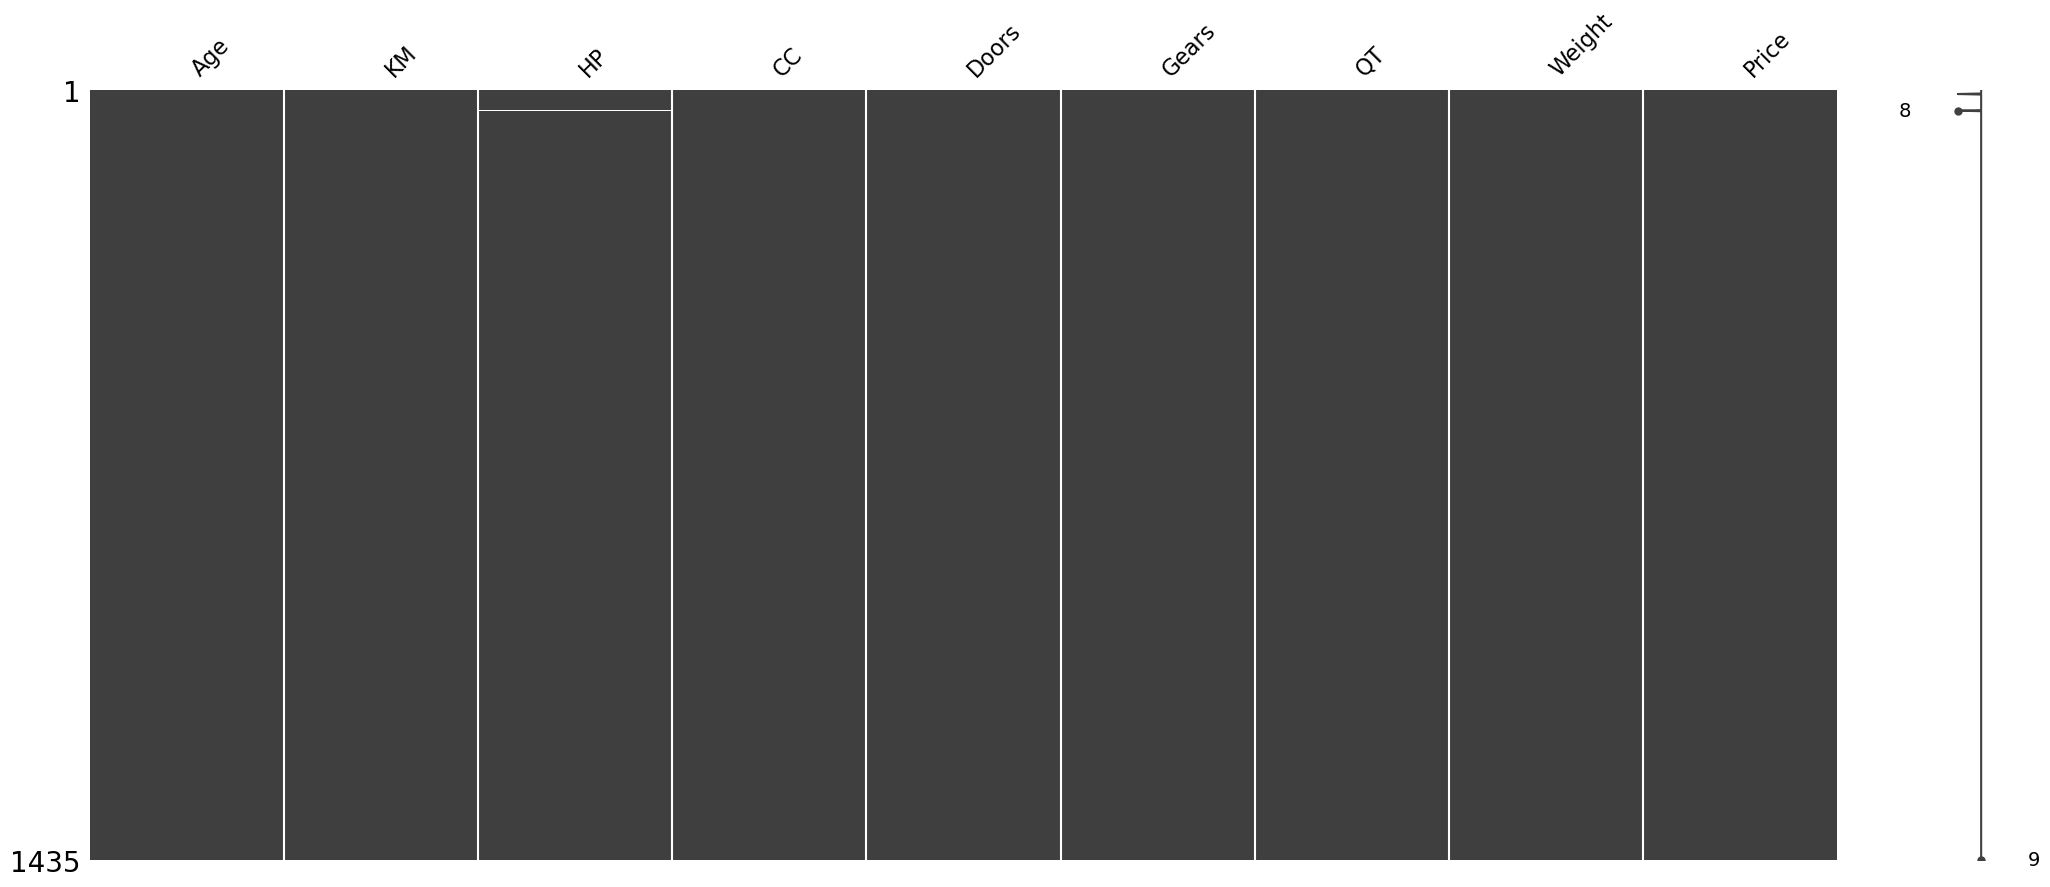

In [11]:
mn.matrix(data)
plt.show()

In [12]:
data['HP'] =data['HP'].fillna(np.round(data.HP.median(),2))
data.isnull().sum()

Age       0
KM        0
HP        0
CC        0
Doors     0
Gears     0
QT        0
Weight    0
Price     0
dtype: int64

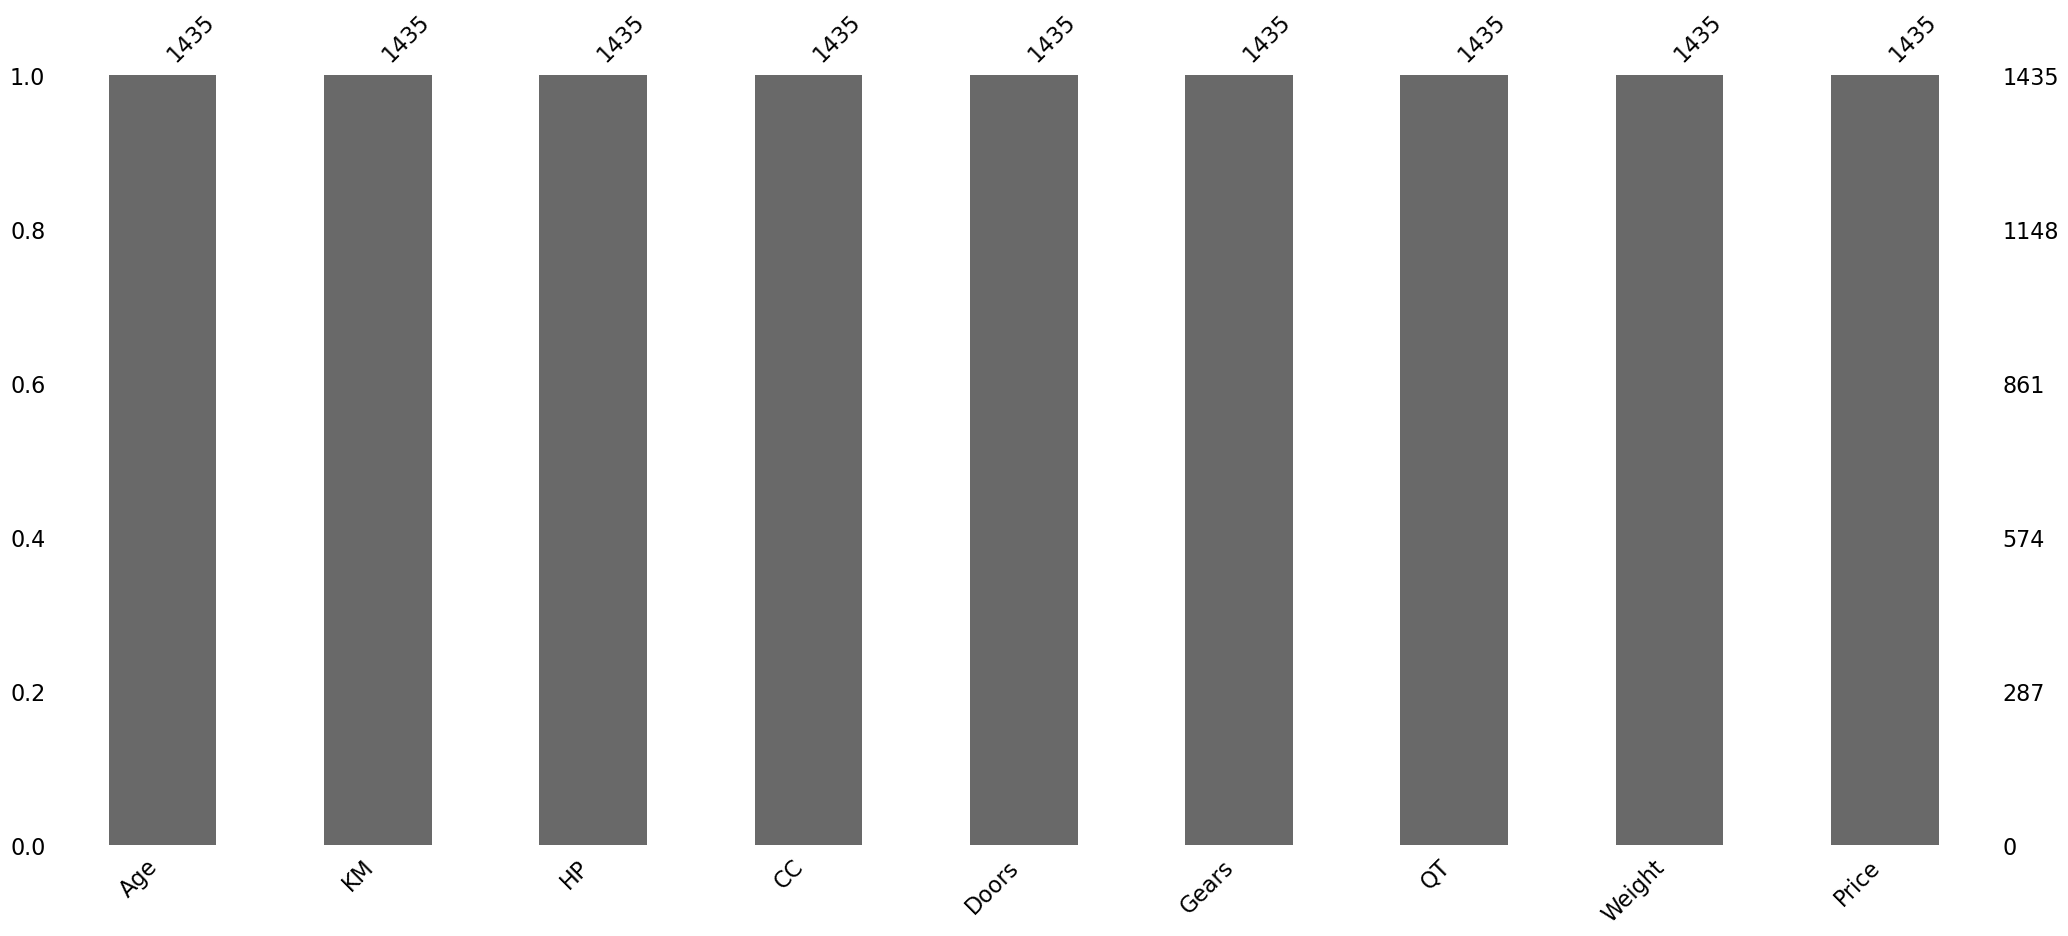

In [13]:
mn.bar(data)
plt.show()

###### We can see there are no null values now in the dataset

##### Descriptive statistics for the new data

In [14]:
data.describe()

Age             KM           HP            CC        Doors  \
count  1435.000000    1435.000000  1435.000000   1435.000000  1435.000000   
mean     55.980488   68571.782578   101.514983   1576.560976     4.032753   
std      18.563312   37491.094553    14.981216    424.387533     0.952667   
min       1.000000       1.000000    69.000000   1300.000000     2.000000   
25%      44.000000   43000.000000    90.000000   1400.000000     3.000000   
50%      61.000000   63451.000000   110.000000   1600.000000     4.000000   
75%      70.000000   87041.500000   110.000000   1600.000000     5.000000   
max      80.000000  243000.000000   192.000000  16000.000000     5.000000   

             Gears           QT       Weight         Price  
count  1435.000000  1435.000000  1435.000000   1435.000000  
mean      5.026481    87.020209  1072.287108  10720.915679  
std       0.188575    40.959588    52.251882   3608.732978  
min       3.000000    19.000000  1000.000000   4350.000000  
25%       5.000000    69.000000  1040.000000   8450.000000  
50%       5.000000    85.000000  1070.000000   9900.000000  
75%       5.000000    85.000000  1085.000000  11950.000000  
max       6.000000   283.000000  1615.000000  32500.000000

###### Correlation among The variables

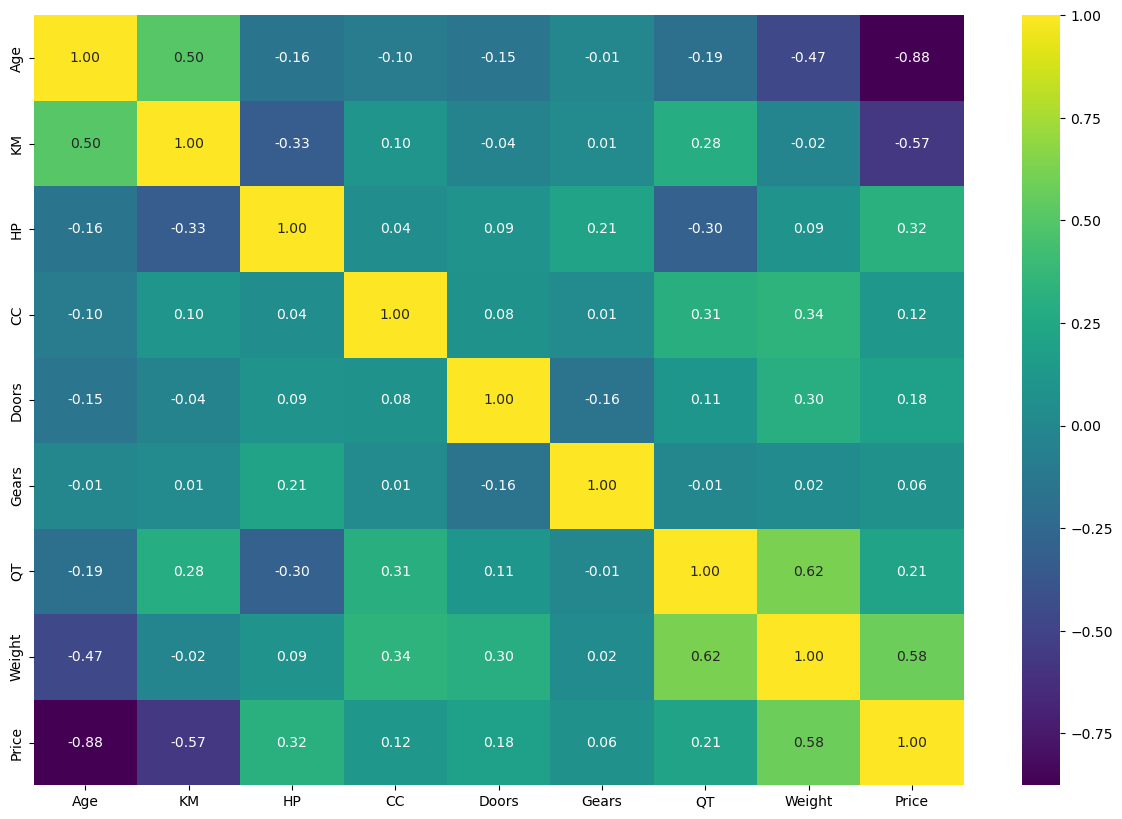

In [15]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True,fmt='.2f',cmap='viridis')
plt.show()

<Figure size 2000x4000 with 0 Axes>

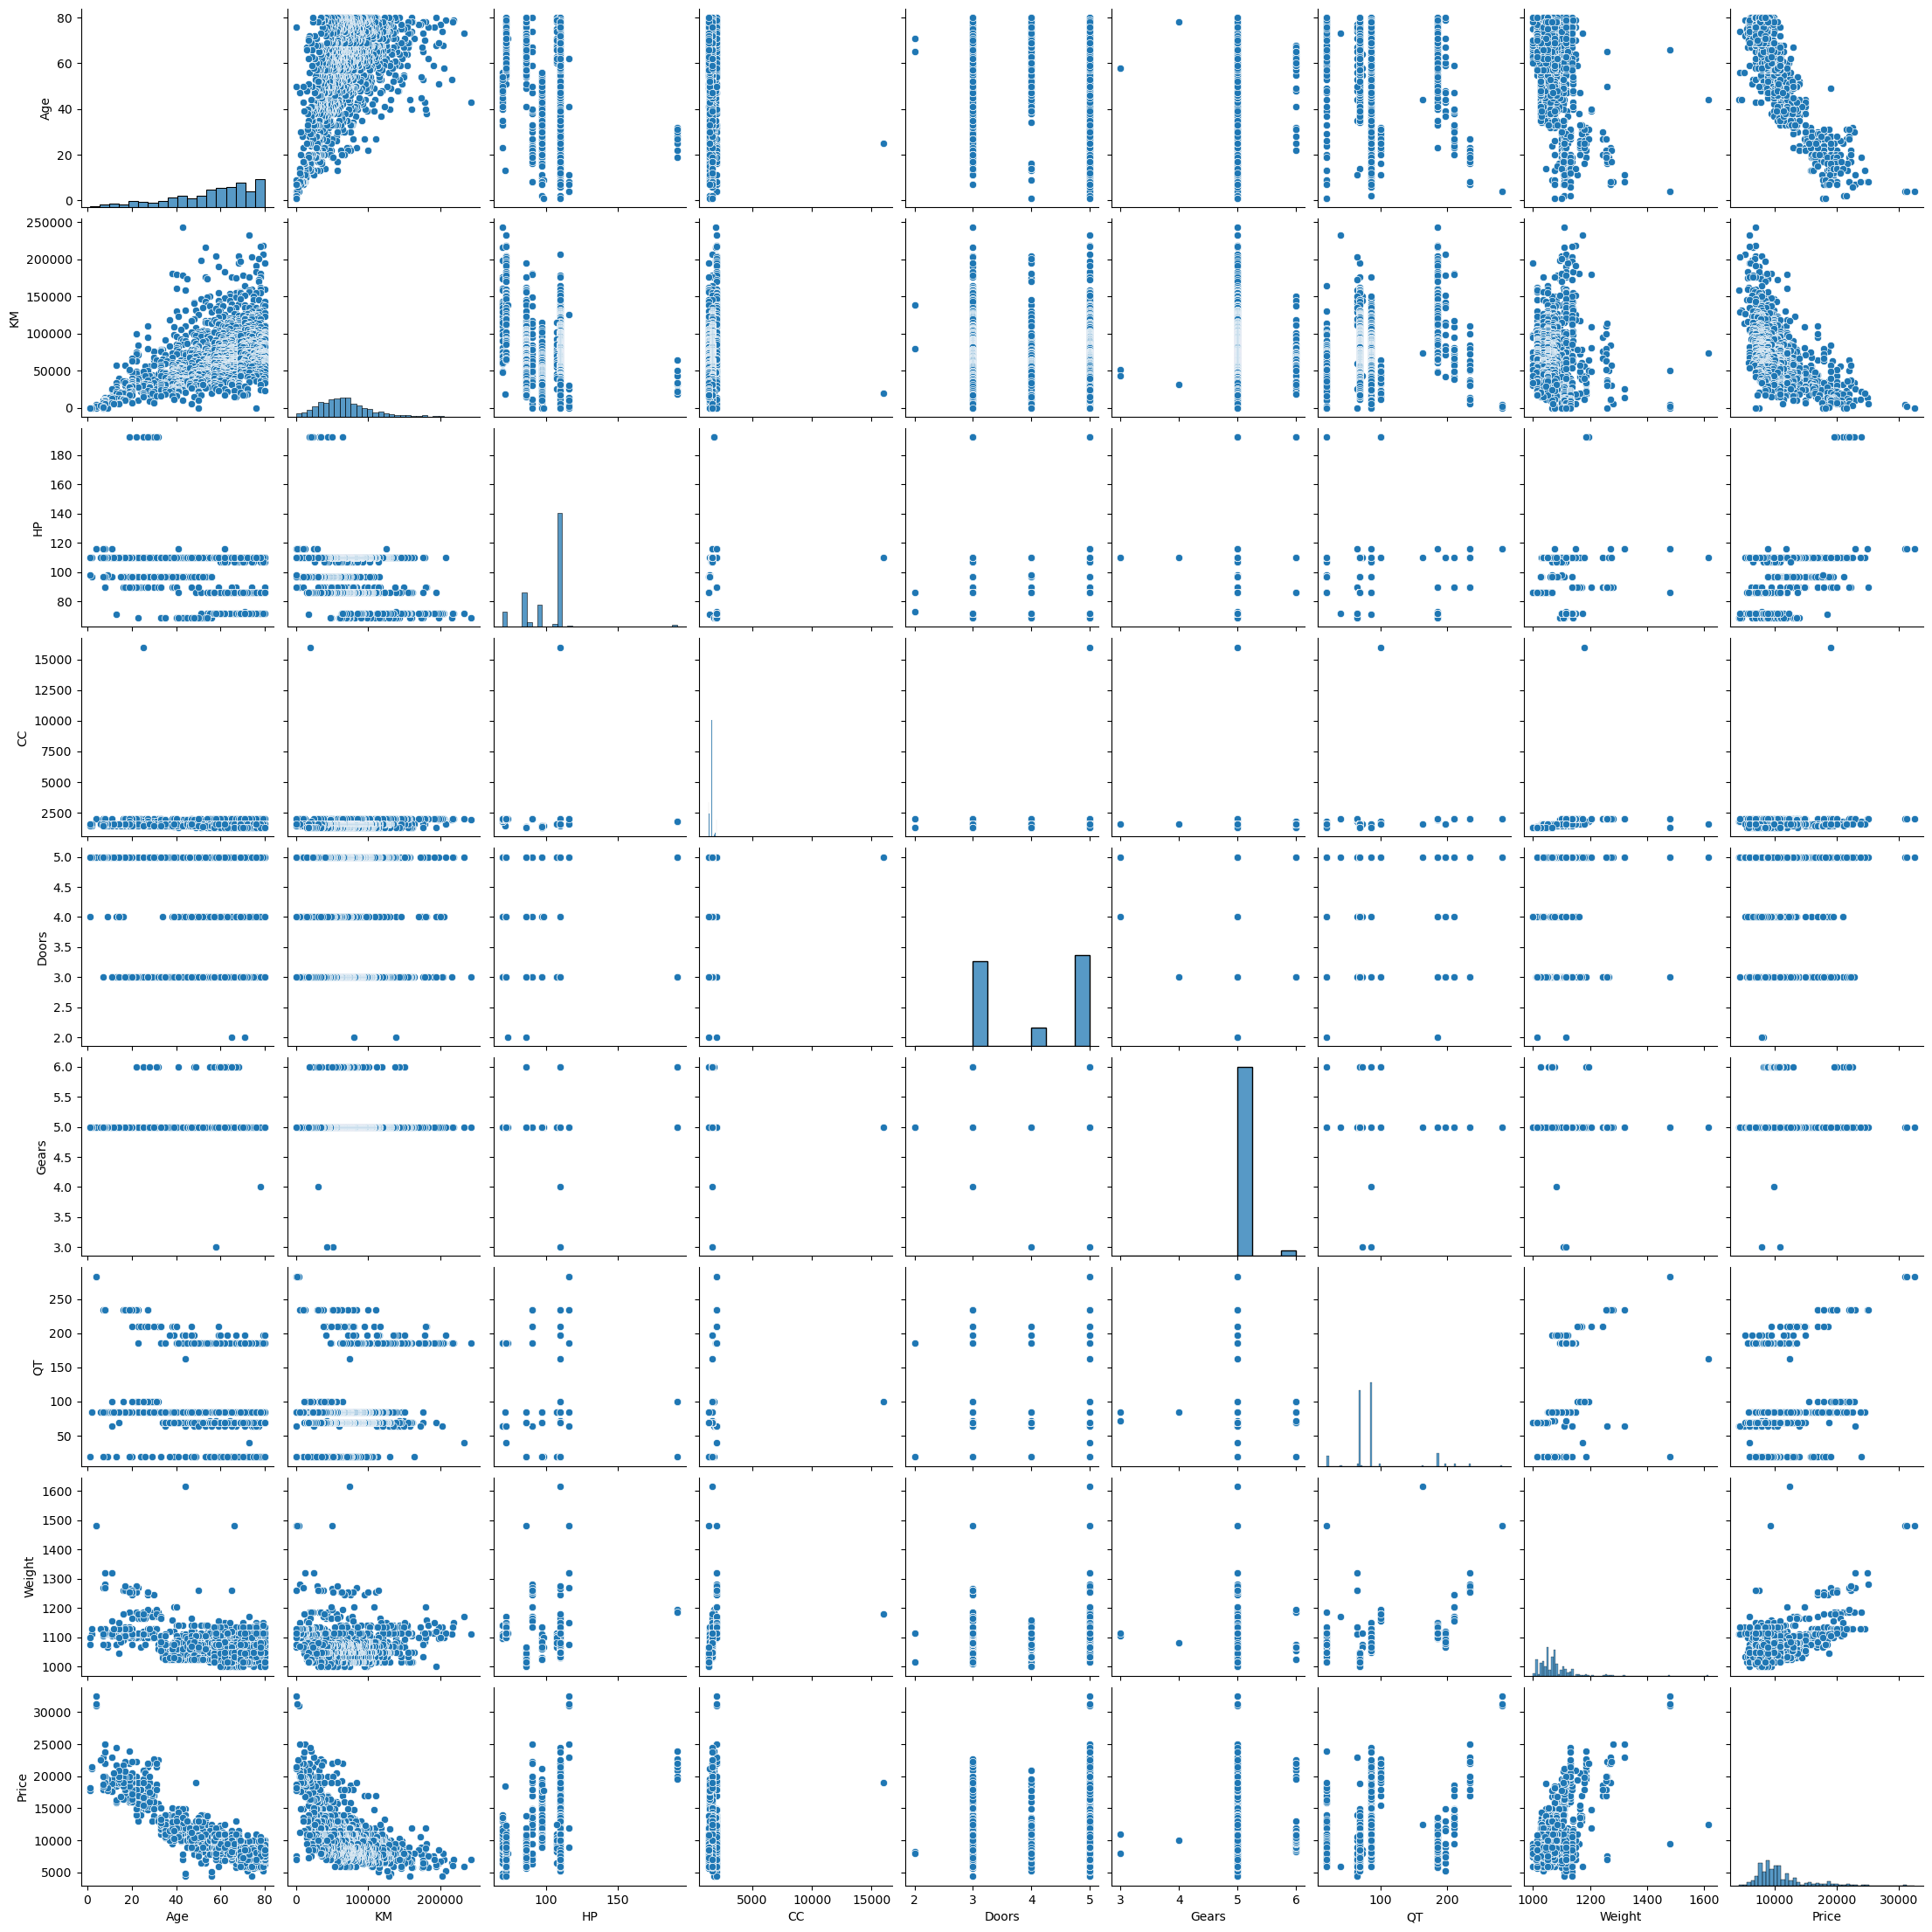

In [16]:
plt.figure(figsize=(20,40))
sns.pairplot(data)
plt.show()

###### We can see that Age,KM and Weight are good predictors for Target variables
###### Whereas Doors,CC and Gears have very less correlation with Price, hence they are very bad predictors
###### Age&Weight and Weight&QT have good correlation which might lead us to have multi collinearity problem

###### Let's Drop Doors,CC and Gears as they have very doesn't contribute much in predicting

###### <font color ='green'> New Data

In [17]:
df = data.copy()
df = df.drop(['CC','Doors','Gears'], axis=1)
df

Age     KM     HP   QT  Weight  Price
0      23  46986   90.0  210    1165  13500
1      23  72937   90.0  210    1165  13750
2      24  41711   90.0  210    1165  13950
3      26  48000   90.0  210    1165  14950
4      30  38500   90.0  210    1170  13750
...   ...    ...    ...  ...     ...    ...
1431   69  20544   86.0   69    1025   7500
1432   72  19000   86.0   69    1015  10845
1433   71  17016   86.0   69    1015   8500
1434   70  16916   86.0   69    1015   7250
1435   76      1  110.0   19    1114   6950

[1435 rows x 6 columns]

###### <font color ='green'> Visualizing the data using Boxplots

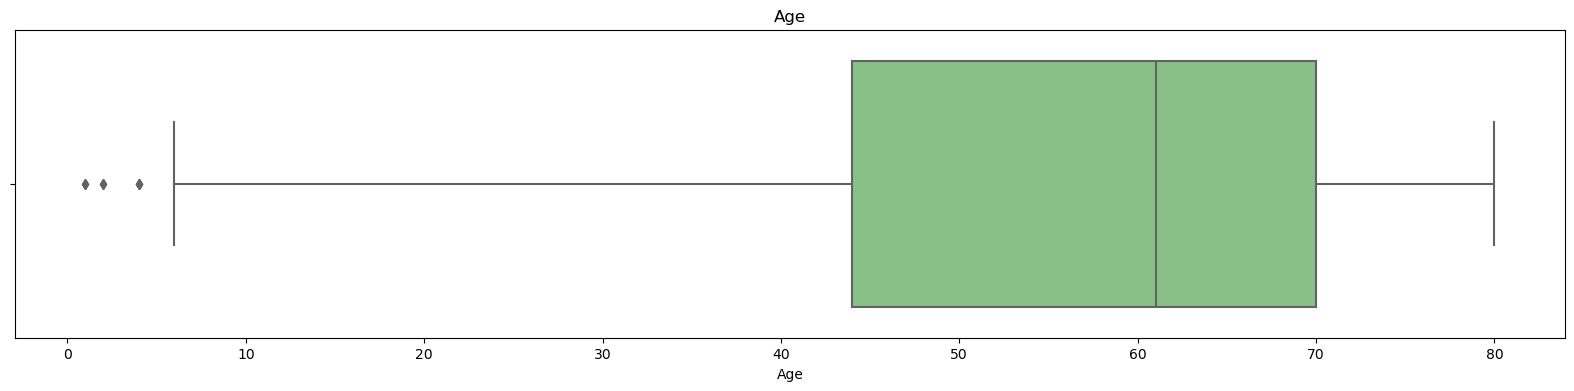

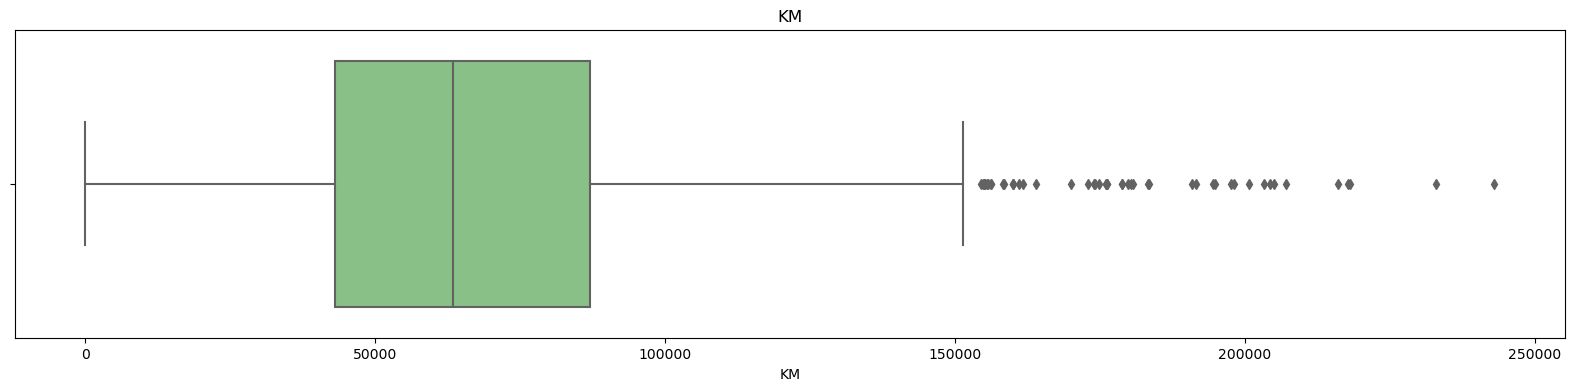

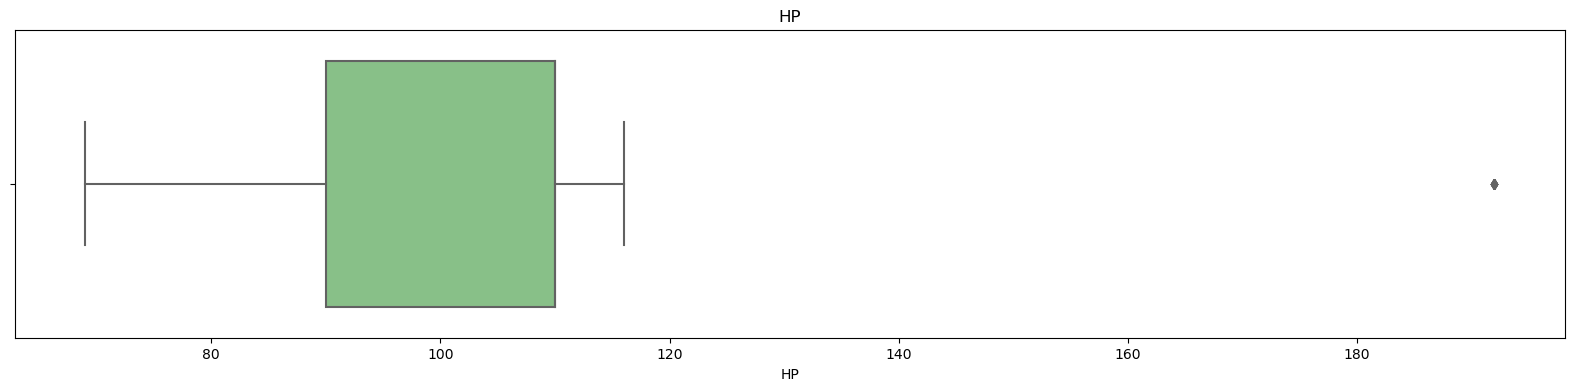

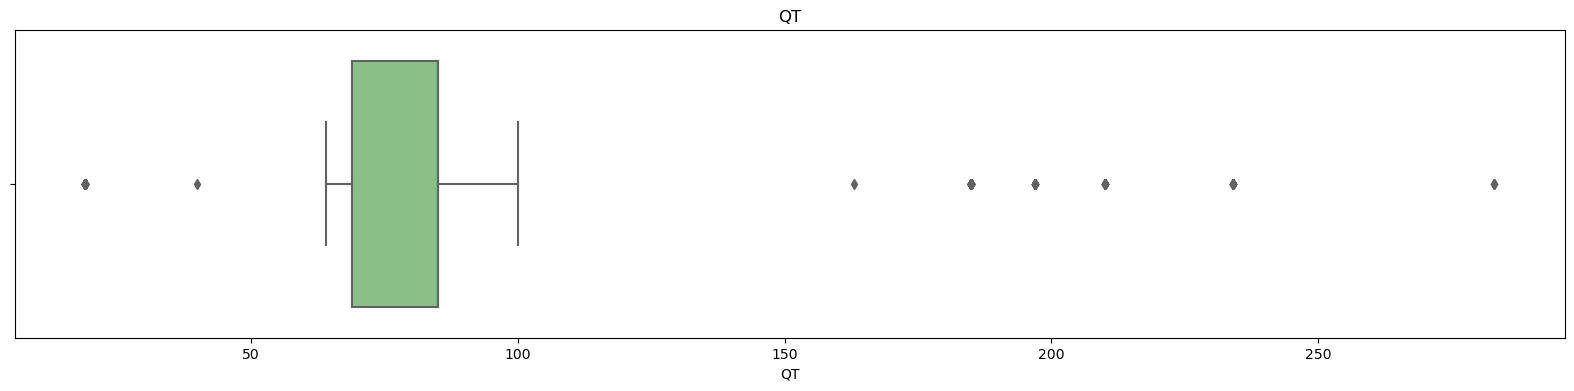

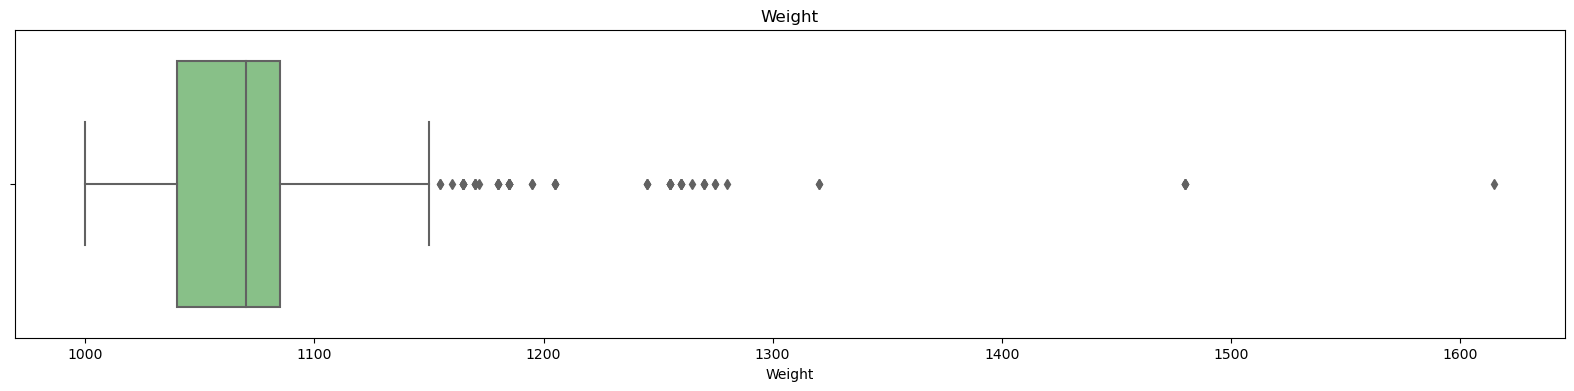

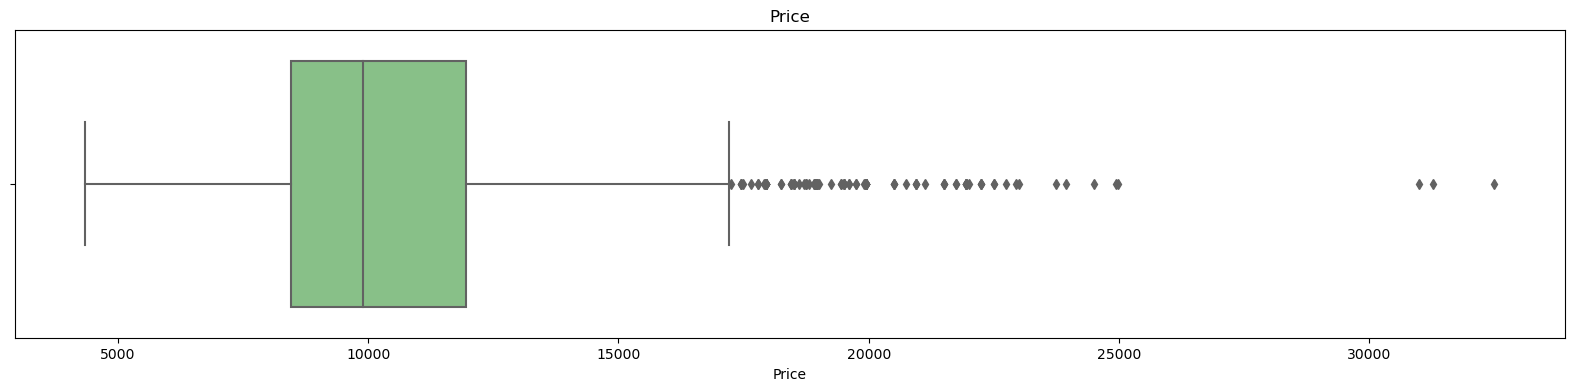

In [18]:
for i in df.columns:
    plt.subplots(figsize=(20,4))
    sns.boxplot(df[i],data=df,palette='Accent')
    plt.title(i)

###### Since some of the columns have very less unique values and the data set contains more than 1400 records, we can not use scatterplot for visualizing the relationship for these feature with the Target Variables

In [19]:
continuous_feature =[feature for feature in df.columns if len(df[feature].unique())>20]
print('Continuous Variables Count: ',(len(continuous_feature)))

Continuous Variables Count:  4


In [20]:
continuous_feature

['Age', 'KM', 'Weight', 'Price']

In [21]:
discrete_feature=[feature for feature in df.columns if len(df[feature].unique())<20]
print('Discrete Variables Count: ',(len(discrete_feature)))

Discrete Variables Count:  2


In [22]:
discrete_feature

['HP', 'QT']

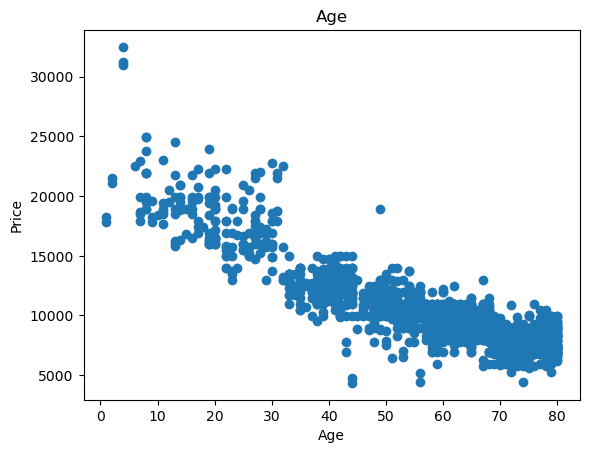

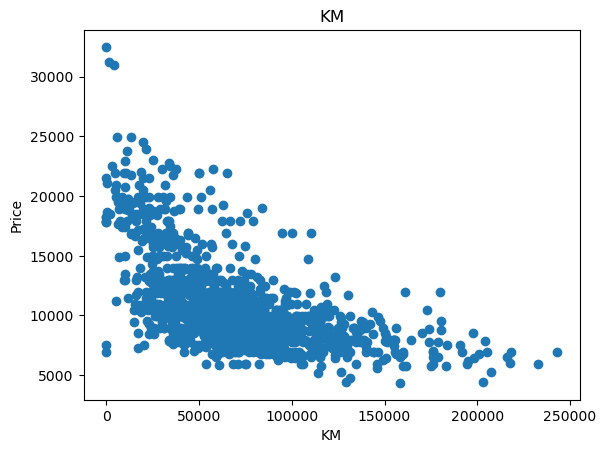

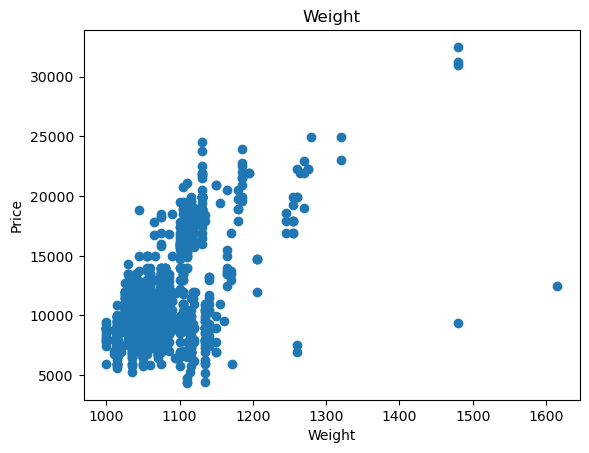

In [23]:
for feature in continuous_feature:
    if feature!="Price":
        plt.subplots()
        plt.scatter(data[feature],data['Price'])
        plt.xlabel(feature)
        plt.ylabel('Price')
        plt.title(feature)
        plt.show()

###### <font color ='green'> Observation
   
    
   i)Age and KM have good negative Correlation with Target Variable
    
   ii) Weight has positive but less correlation with Target Variable than other features

###### For discrete features we are grouping the features with Targetting variable and plotting median Price for each group of the feature

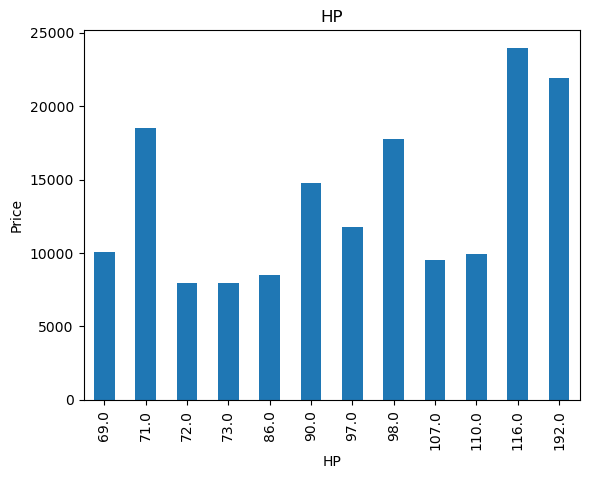

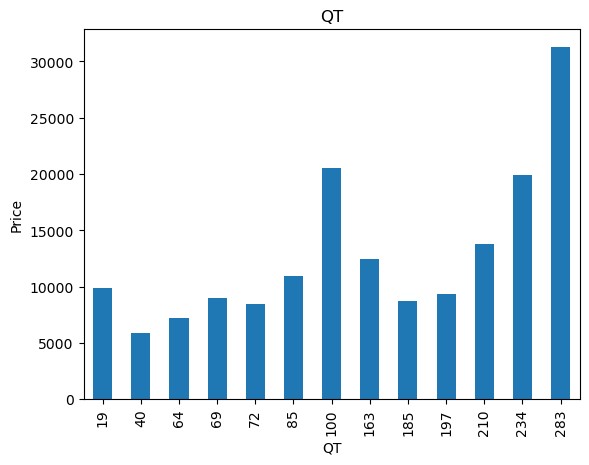

In [24]:
for feature in discrete_feature:
    data.groupby(feature)["Price"].median().plot.bar() #This statement groupby each feature and Price column, then it creates barplot between each group of the feature and median value of that group's price
    plt.xlabel(feature)
    plt.ylabel("Price")
    plt.title(feature)
    plt.show()

###### <font color ='green'> Observation 
   i)we can't find any direct relation between the discrete features and target variable
    
  ii)These are also not good predictors but we are keeping this variables to avoid the loss of information

###### Visualizing the Continuous features of the data

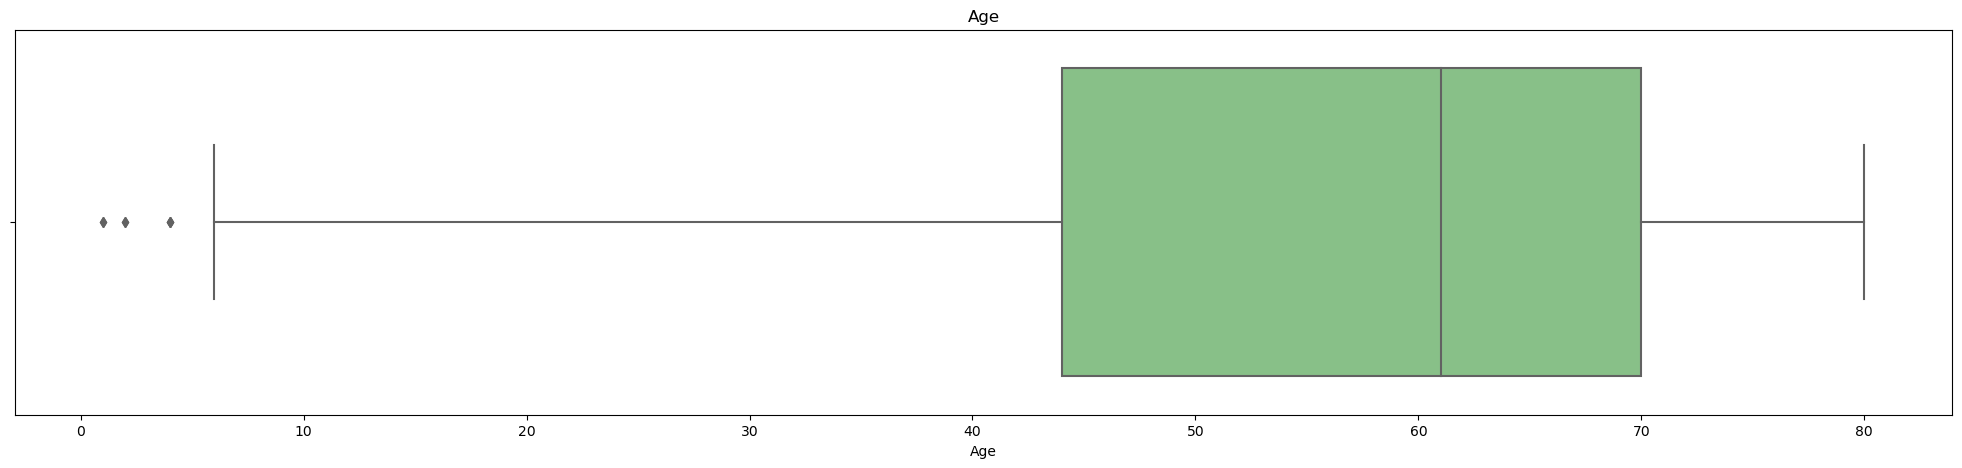

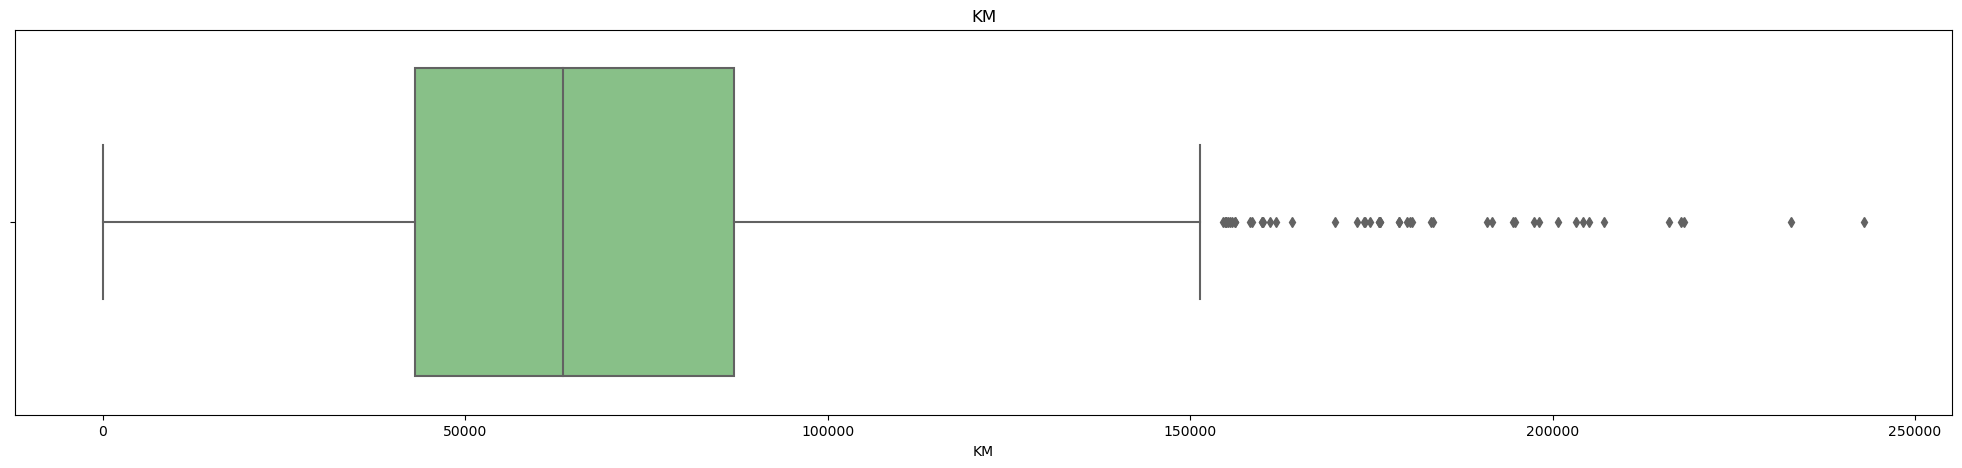

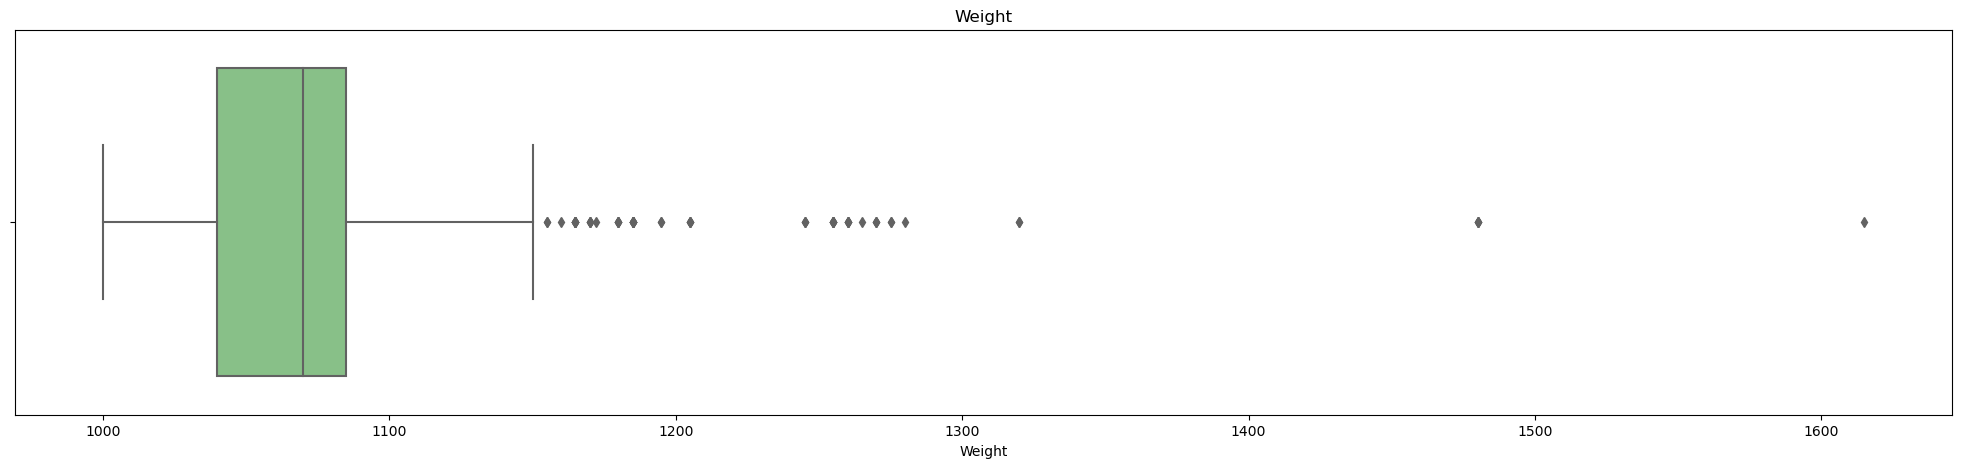

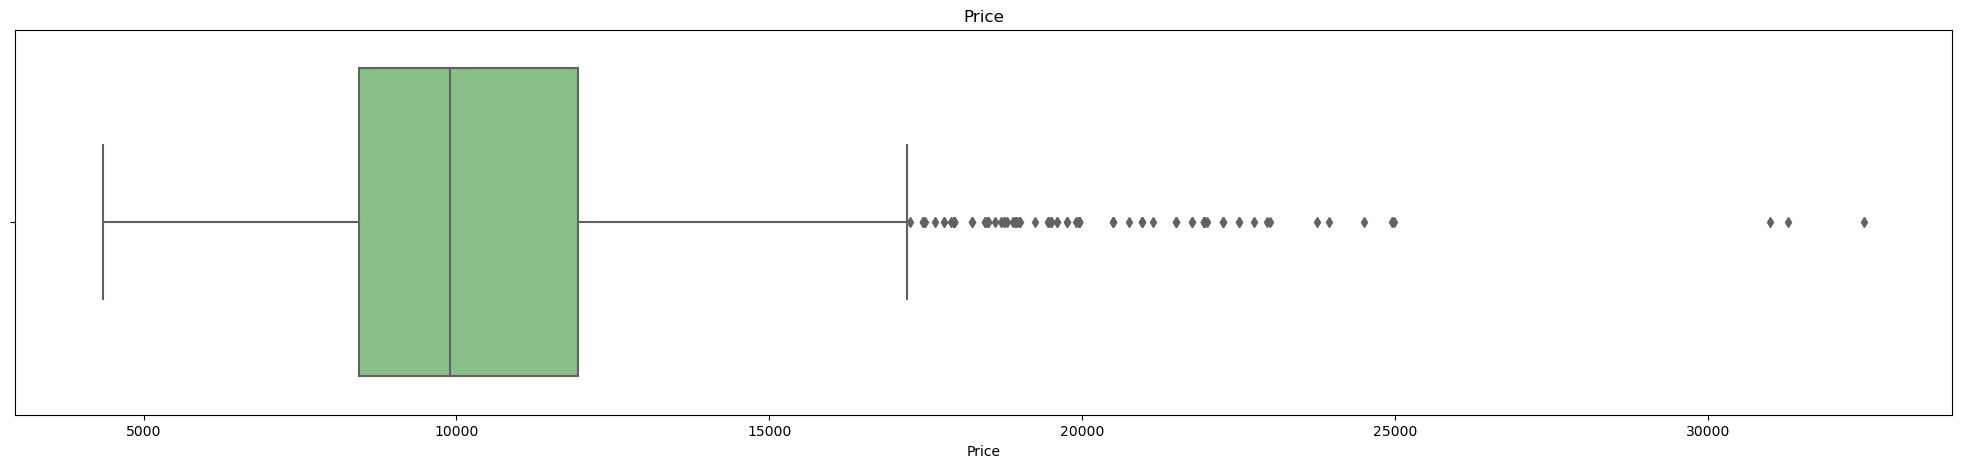

In [25]:
for feature in continuous_feature:
    plt.subplots(figsize=(25,5))
    sns.boxplot(feature,data=data,palette='Accent')
    plt.title(feature)
    plt.show()

###### As we can see there are outliers in every column, we need to deal with this outliers to get a good predictor model. 

###### But before handling the outliers let's build a model with this raw data for future comparision with other models

In [26]:
raw_model = smf.ols('Price~Age+KM+HP+QT+Weight',data=df).fit()
raw_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     1779.
Date:                Wed, 22 Feb 2023   Prob (F-statistic):               0.00
Time:                        00:56:50   Log-Likelihood:                -12371.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1429   BIC:                         2.479e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2418.3188   1049.710     -2.304      0.021   -4477.457    -359.181
Age         -121.8874      2.620    -46.517      0.000    -127.027    -116.747
KM            -0.0206      0.001    -16.457      0.000      -0.023      -0.018
HP            33.4359      2.729     12.253      0.000      28.083      38.789
QT             3.8981      1.297      3.005      0.003       1.353       6.443
Weight        16.4498      1.024     16.069      0.000      14.442      18.458
==============================================================================
Omnibus:                      142.104   Durbin-Watson:                   1.545
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              898.694
Skew:                          -0.190   Prob(JB):                    7.10e-196
Kurtosis:                       6.858   Cond. No.                     2.31e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.31e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

###### <font color ='green'> Observation
   i)We have a r-square value > 0.85, which describes that the model built is a decent model
    
   ii)p-values for beta0 and beta(i) are < 0.05 , so we can reject null hypothesis (beta0 = 0) , hence the regression plane has some significant slope

In [27]:
def plot_data(data,feature):
    plt.figure(figsize=(20,8))
    plt.subplot(131)
    data[feature].hist()
    plt.subplot(132)
    sns.boxplot(data[feature],data=data,palette='Accent')
    plt.subplot(133)
    stat.probplot(data[feature],dist='norm',plot=pylab)
    plt.title(feature)
    plt.show()
    return

###### We have defined a function for plotting Histogram,Boxplot and QQ-plot for the features

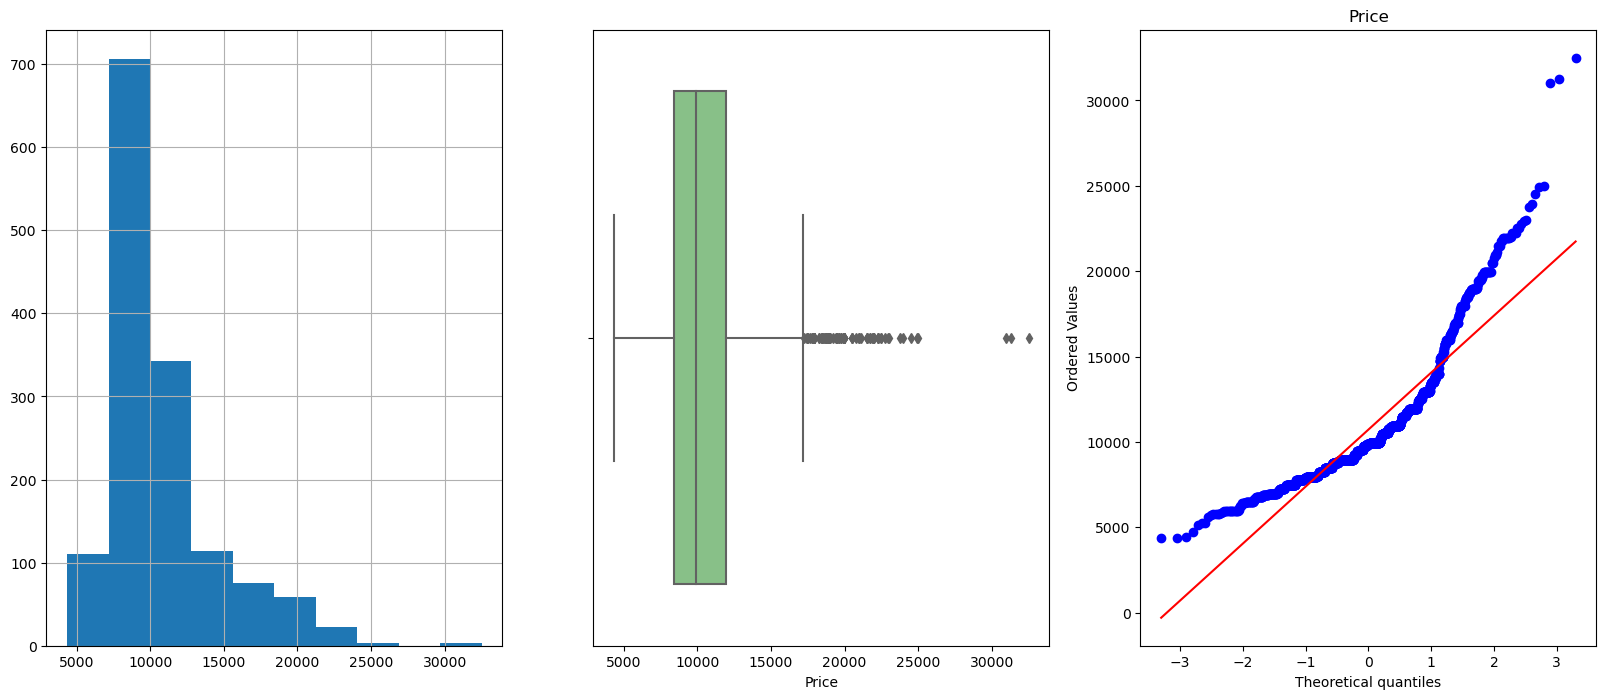

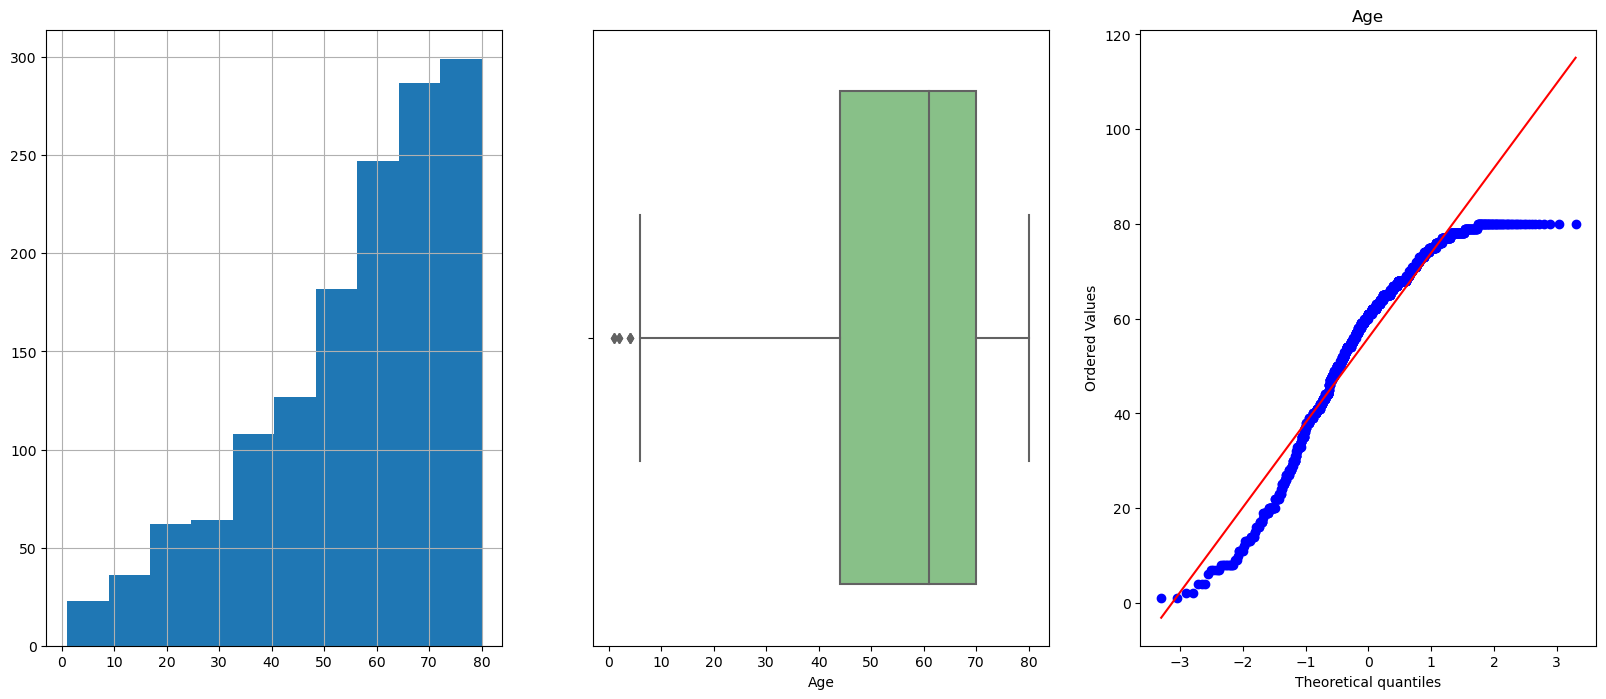

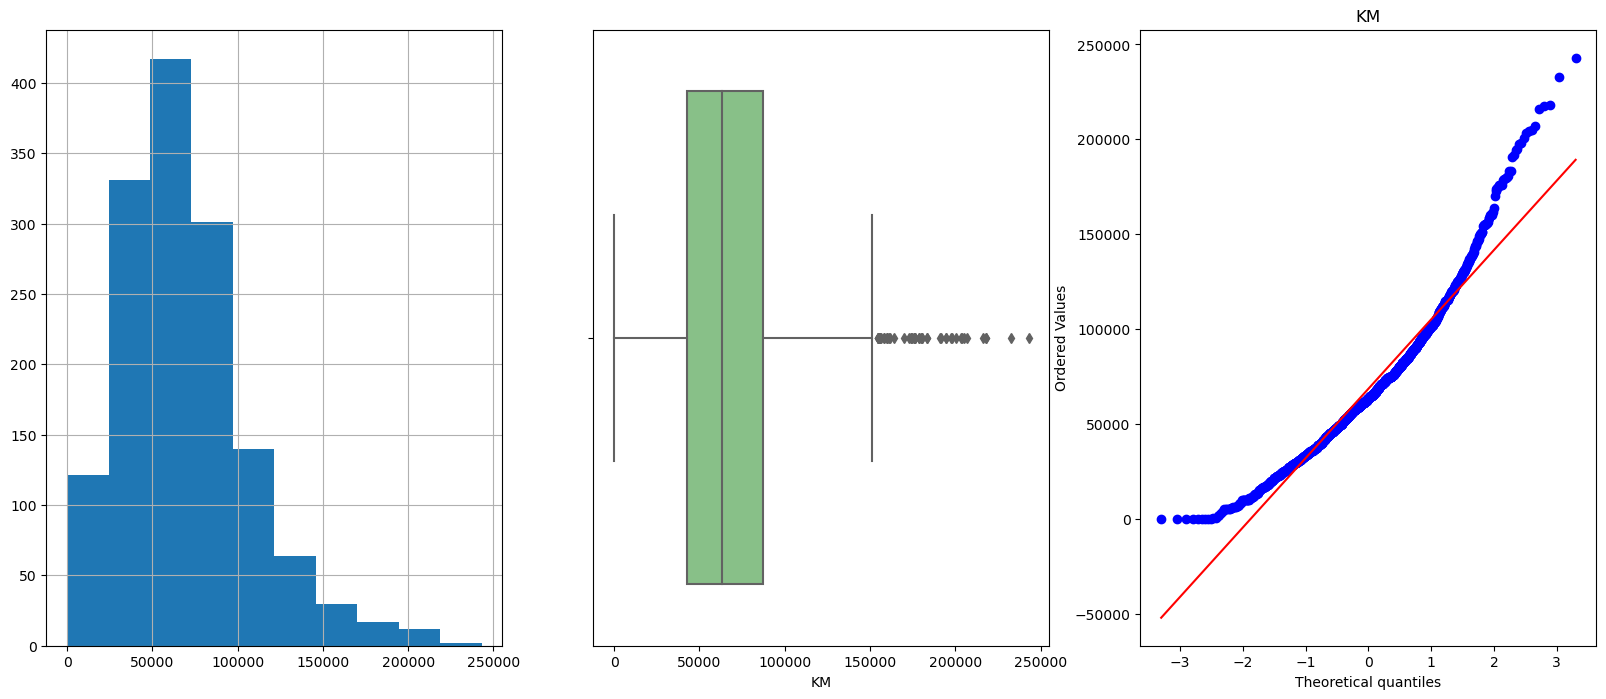

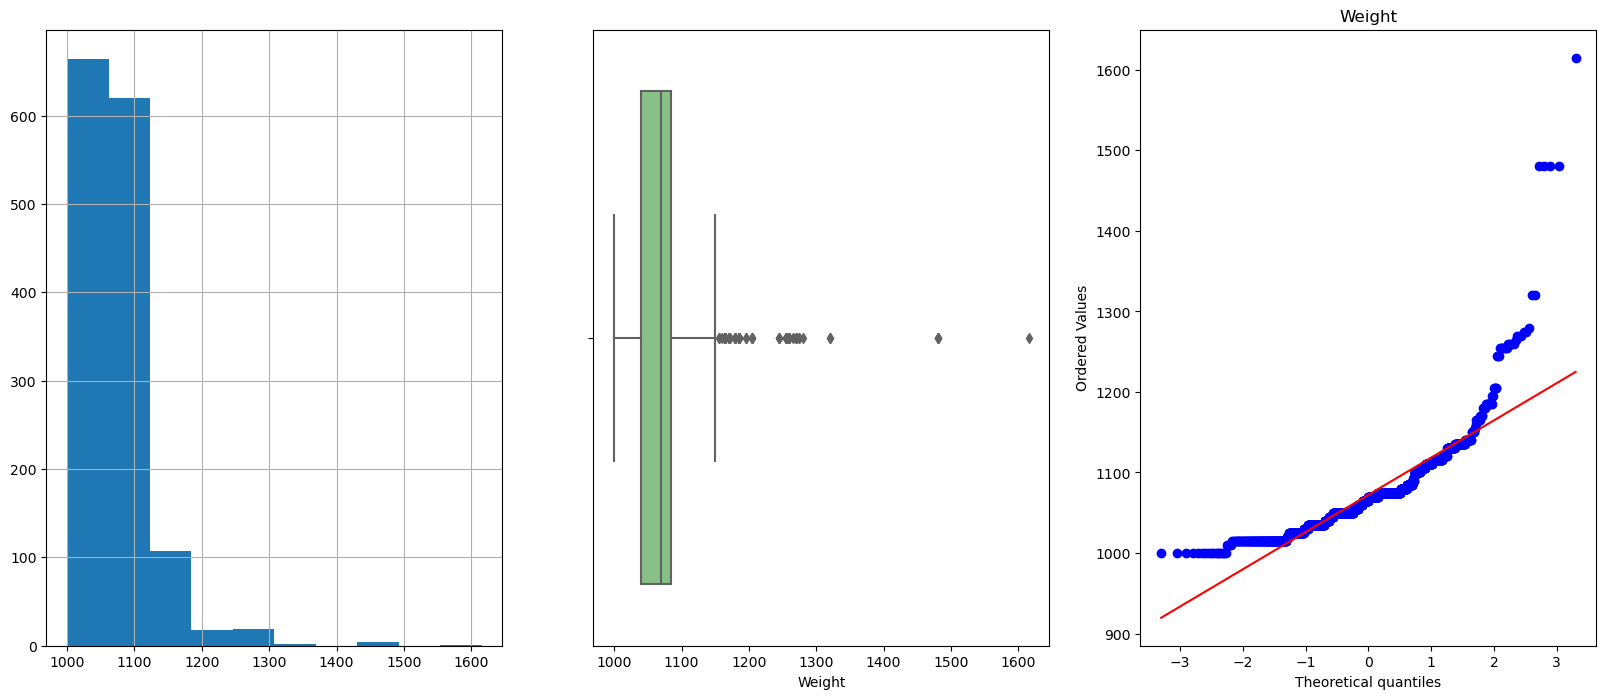

In [28]:
plot_data(df,'Price')
plot_data(df,'Age')
plot_data(df,'KM')
plot_data(df,'Weight')

###### <font color='green'> Observation
   Every feature has outliers and no feature follows a Normal distribution

###### Let's perform Shapiro-Wilk test for testing the Normality.
###### Null Hypothesis: The Sample comes from a Normal Distribution 

In [29]:
#perform Shapiro-Wilk test
print('Price feature',shapiro(df.Price),'\n'
     'Age feature',shapiro(df.Age),'\n'
     'Weight feature',shapiro(df.Weight),'\n'
     'KM feature',shapiro(df.KM))

Price feature ShapiroResult(statistic=0.8534729480743408, pvalue=1.5960294063332542e-34) 
Age feature ShapiroResult(statistic=0.926694929599762, pvalue=6.738004885543532e-26) 
Weight feature ShapiroResult(statistic=0.7825542688369751, pvalue=5.042796731627146e-40) 
KM feature ShapiroResult(statistic=0.9475831389427185, pvalue=3.444094263209402e-22)


###### <font color='green'> Observation
   All p-values are less than 0.05
    
   Hence we can Reject  Null Hypothesis,
   Therefore No feature follows Normal Distribution

###### <font color ='green'> Log Transform

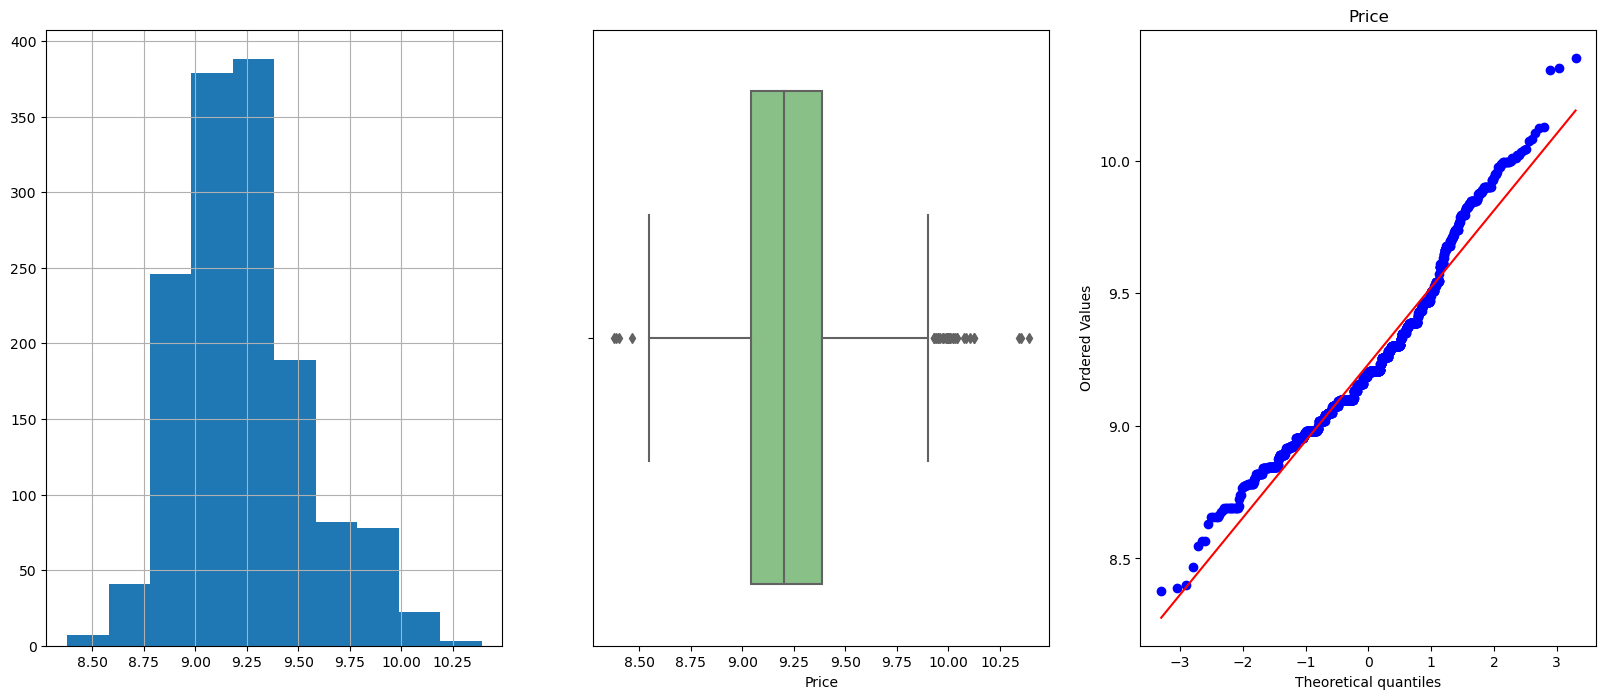

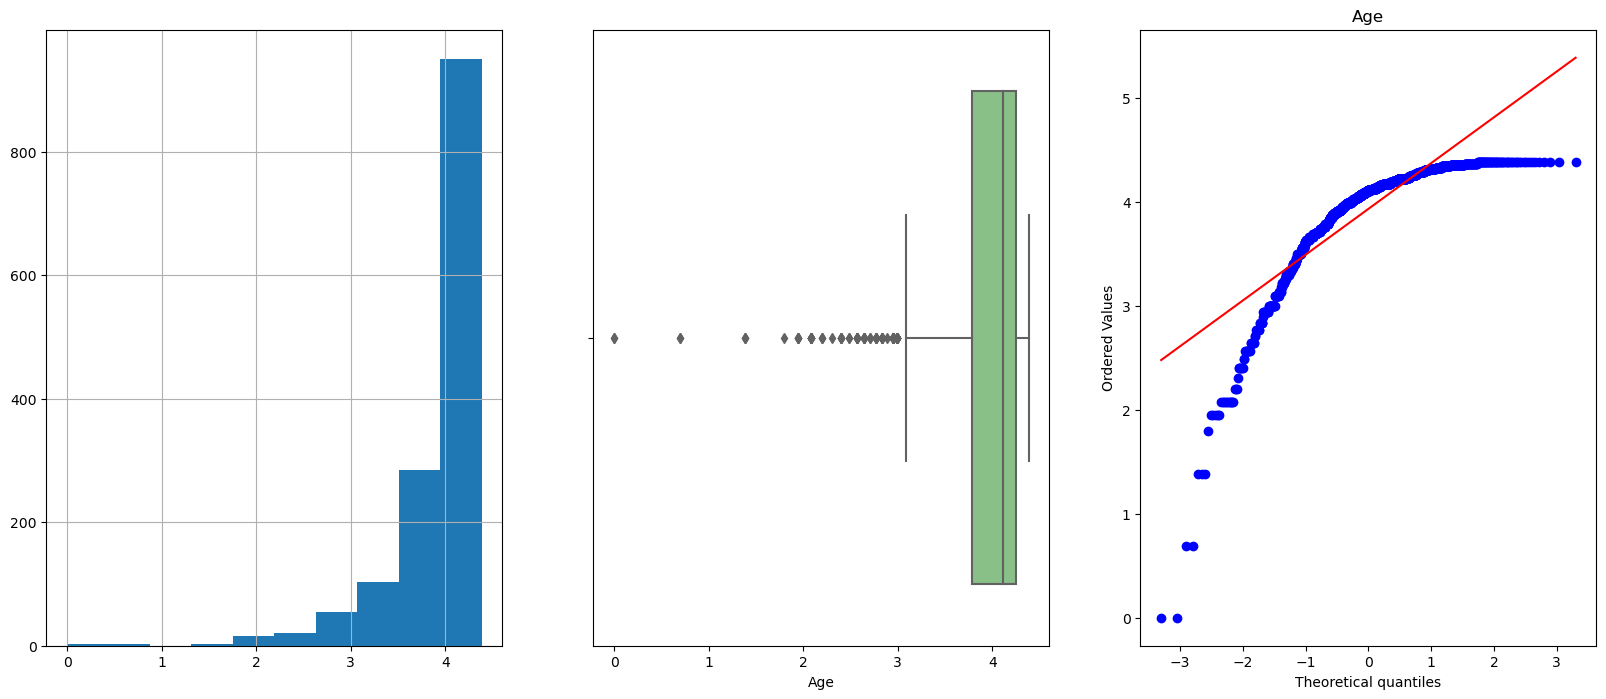

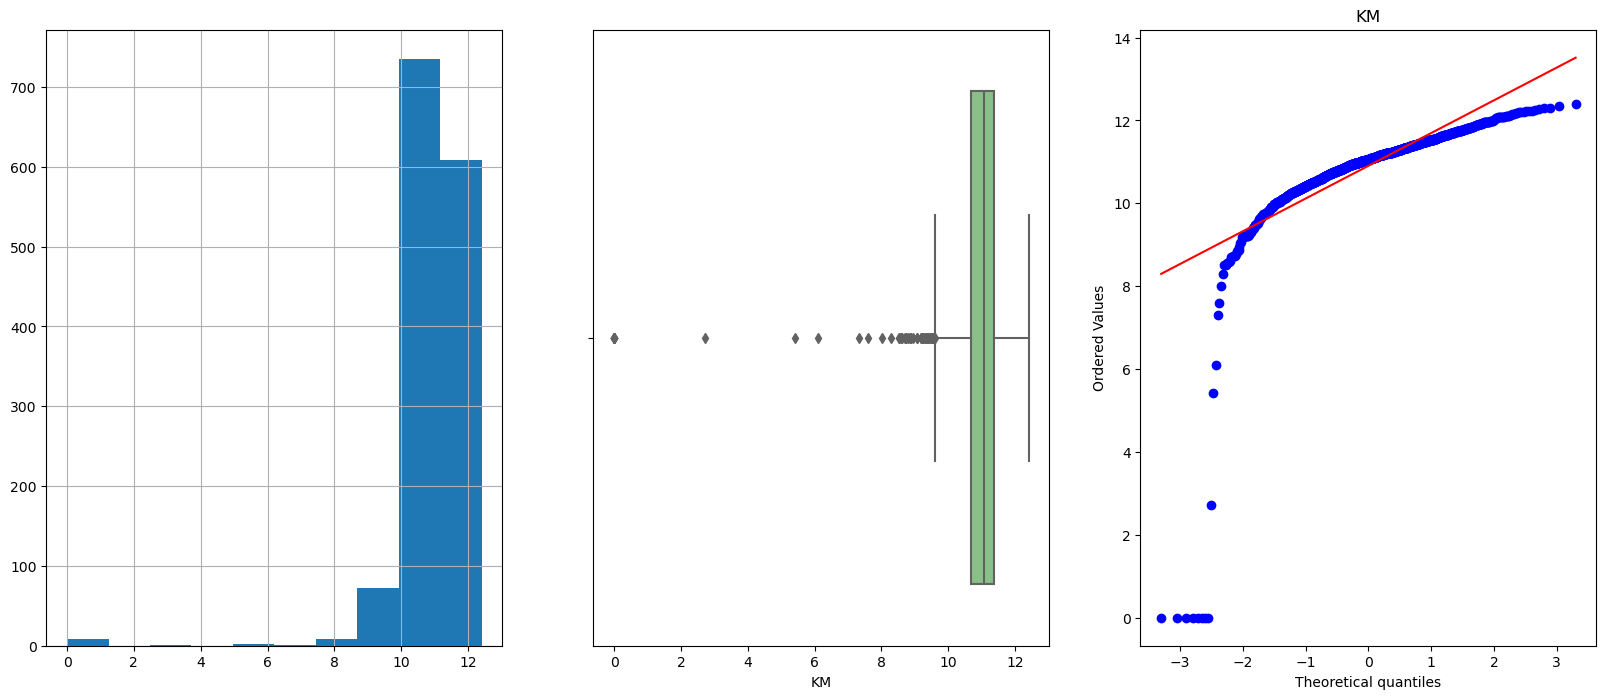

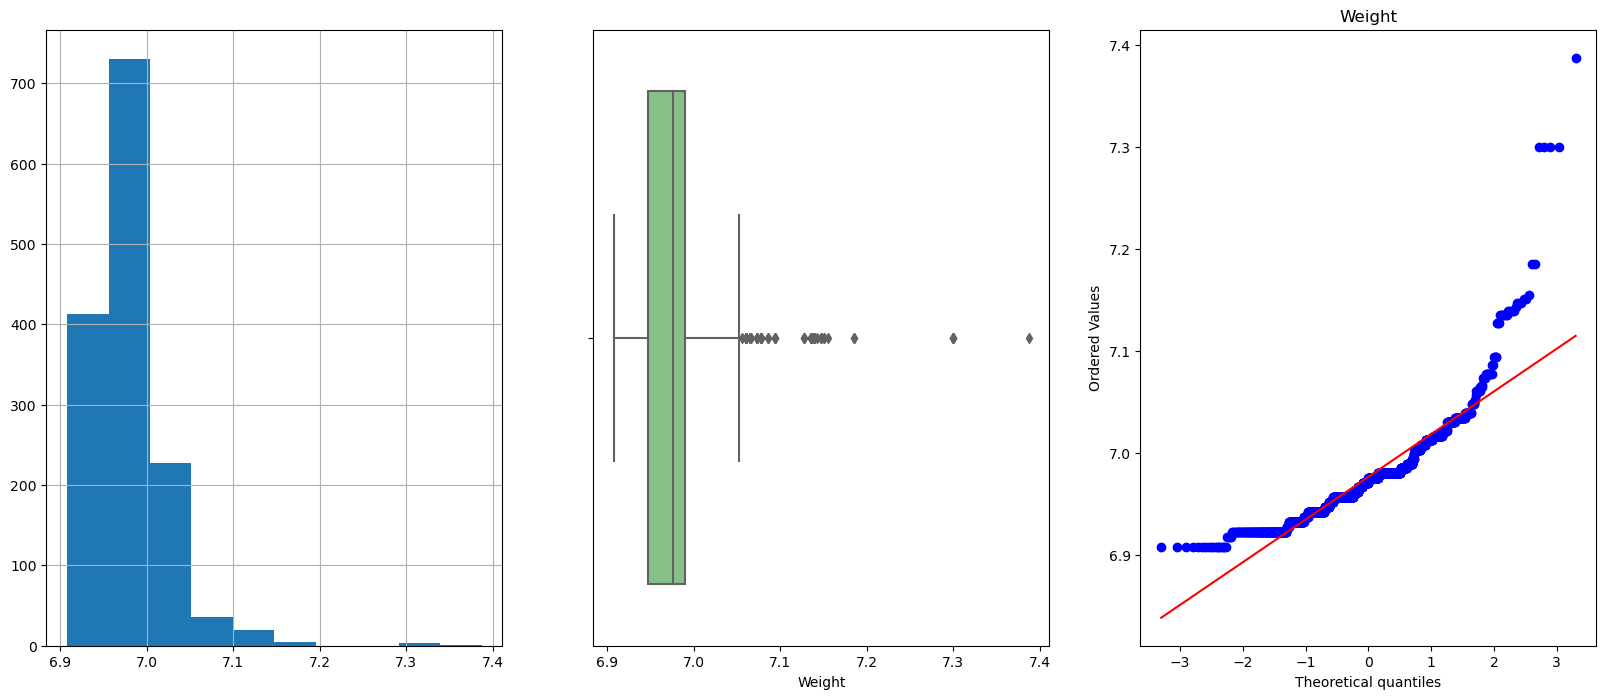

In [30]:
df_log=df.copy()
df_log[continuous_feature]=np.log(df_log[continuous_feature])

plot_data(df_log,'Price')
plot_data(df_log,'Age')
plot_data(df_log,'KM')
plot_data(df_log,'Weight')

###### <font color ='green'> Square root Transform

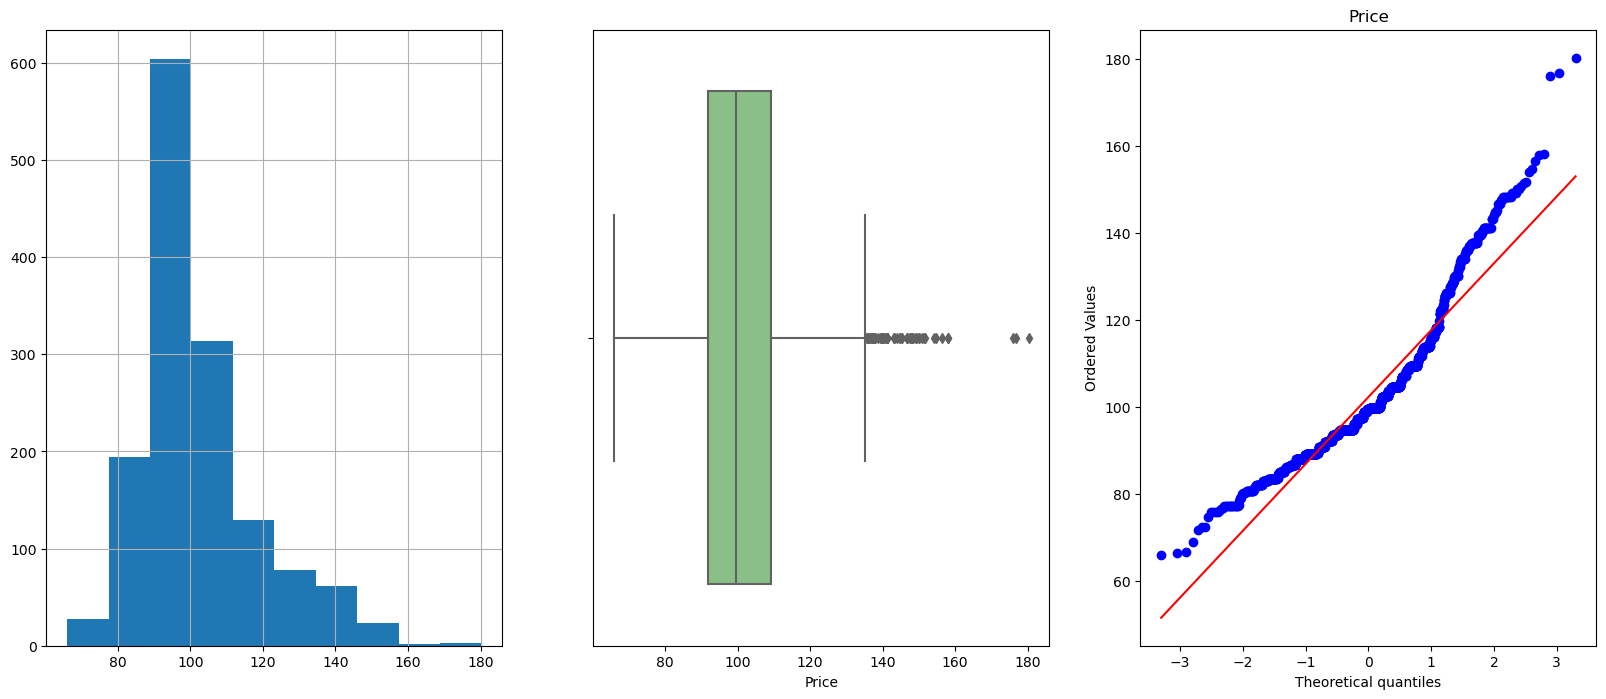

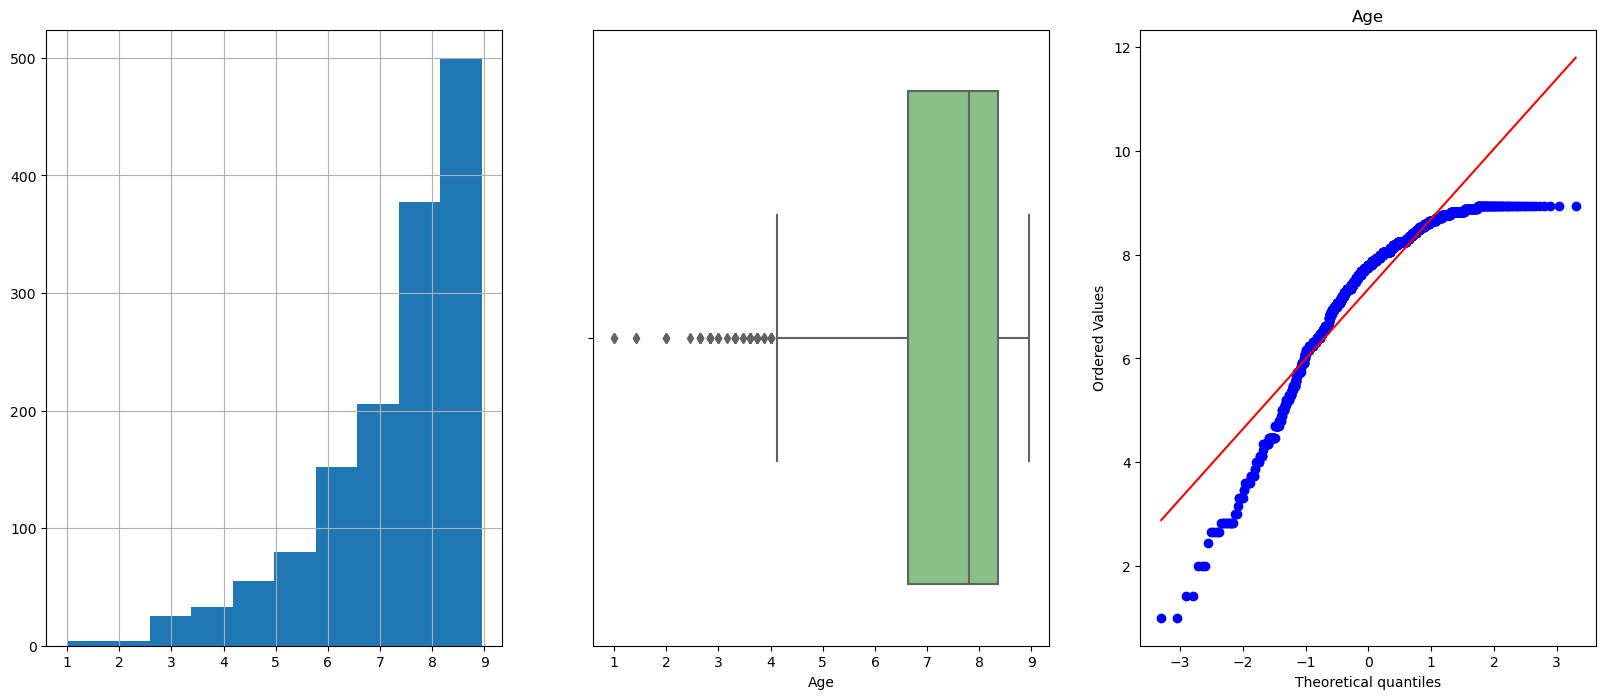

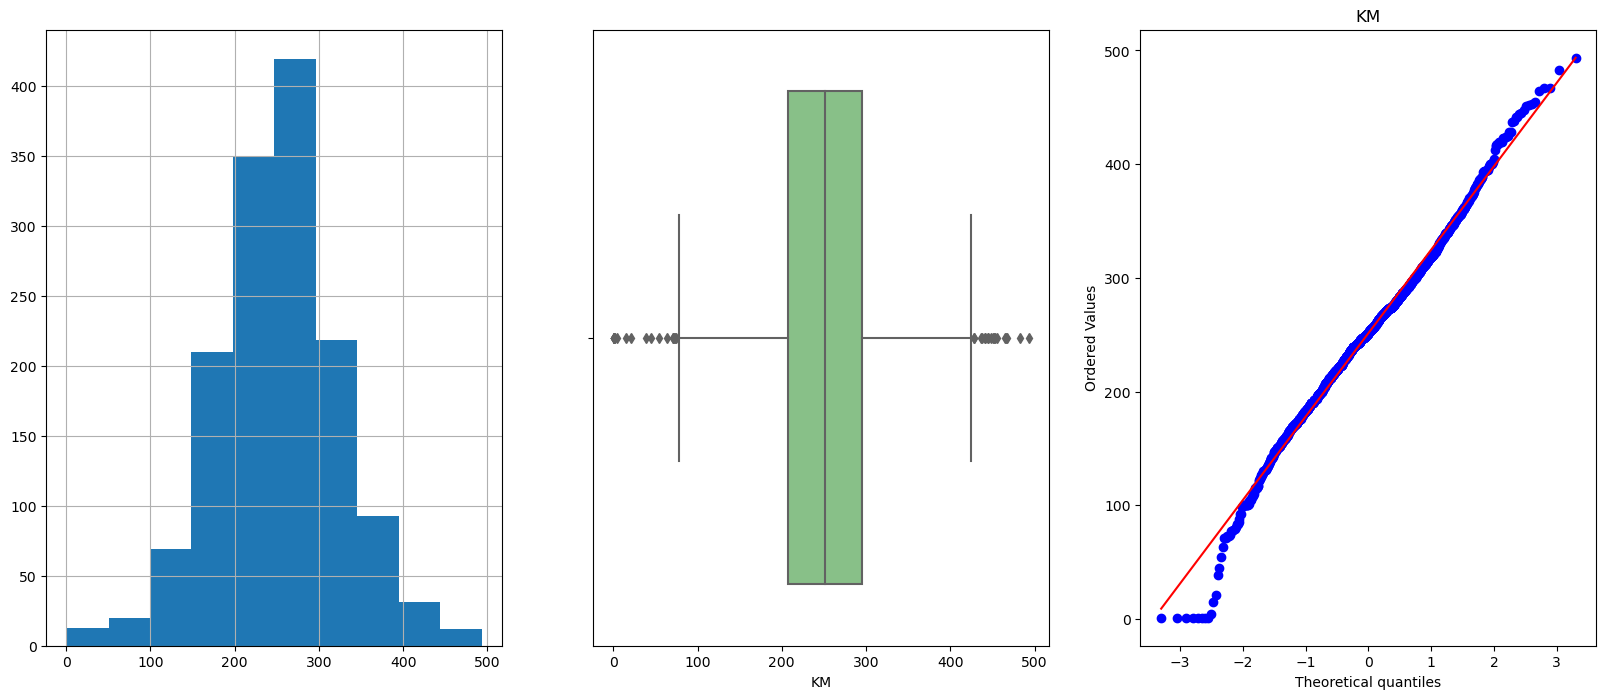

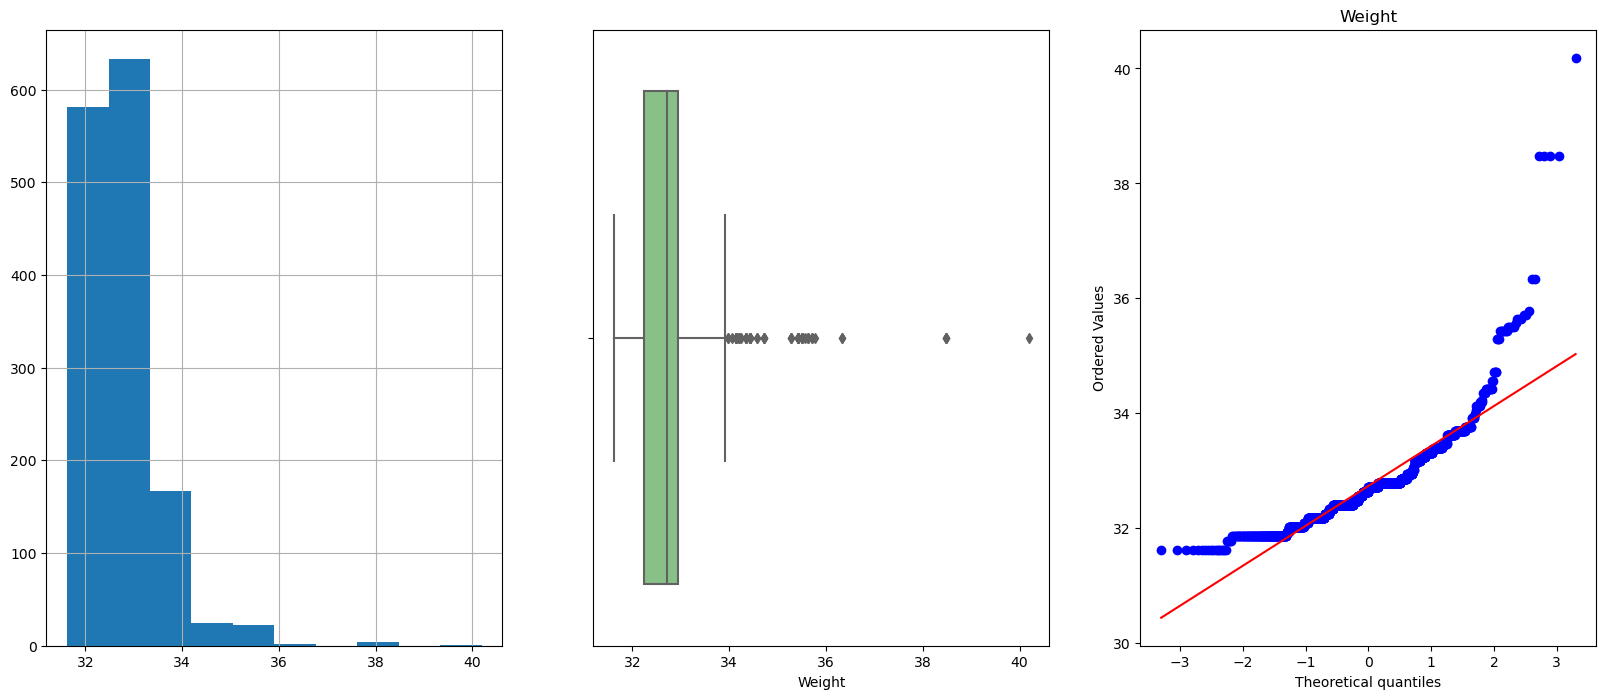

In [31]:
df_sqrt=df.copy()
df_sqrt[continuous_feature]=np.sqrt(df_sqrt[continuous_feature])

plot_data(df_sqrt,'Price')
plot_data(df_sqrt,'Age')
plot_data(df_sqrt,'KM')
plot_data(df_sqrt,'Weight')

###### <font color ='green'> Cubth root Transform

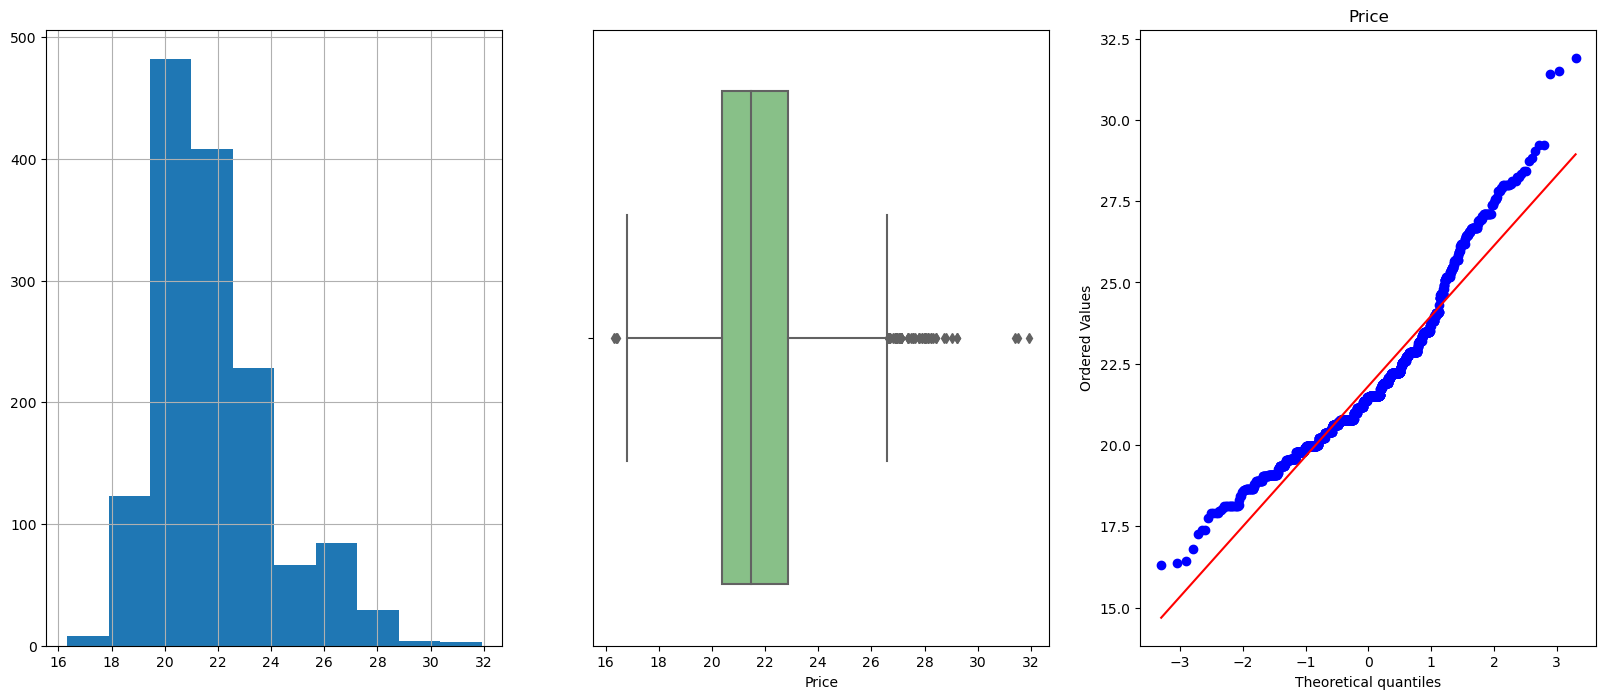

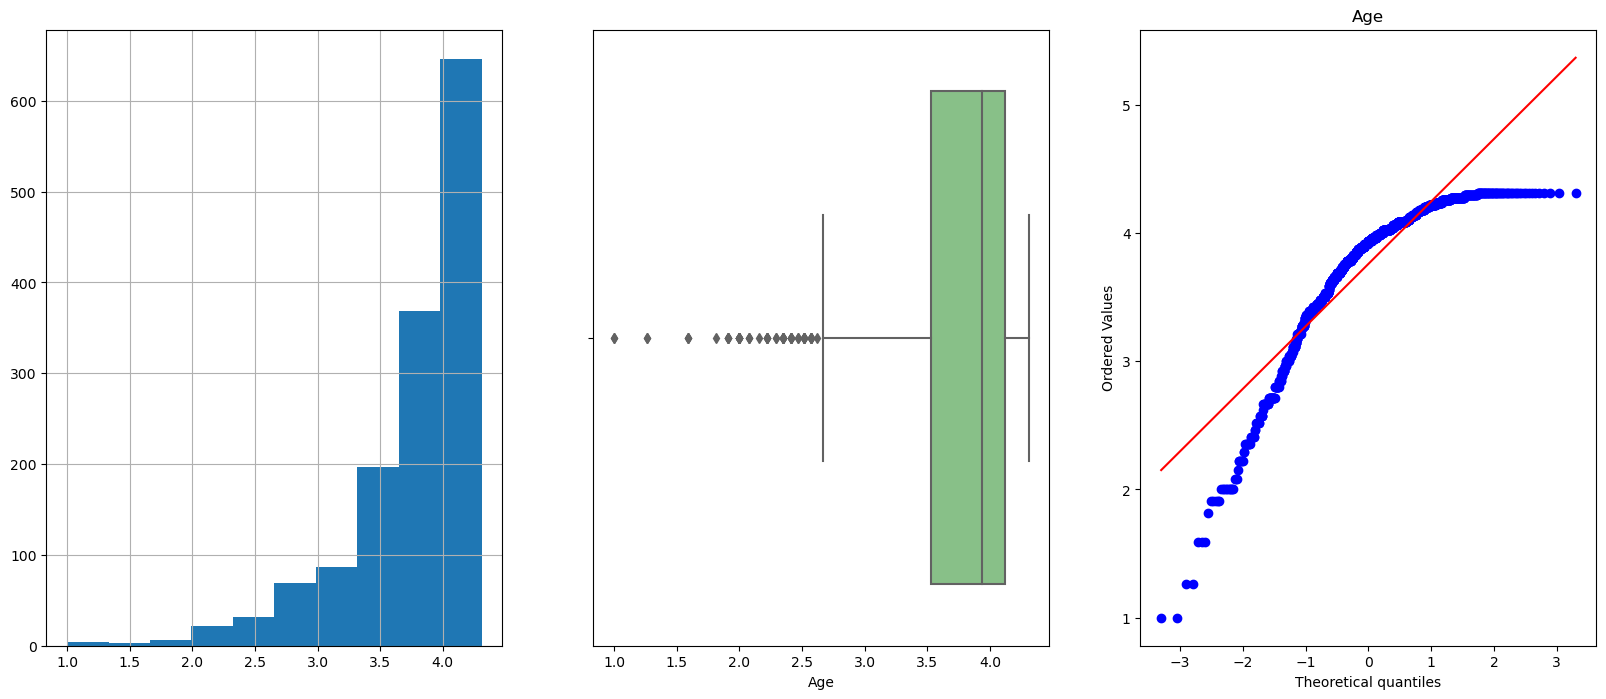

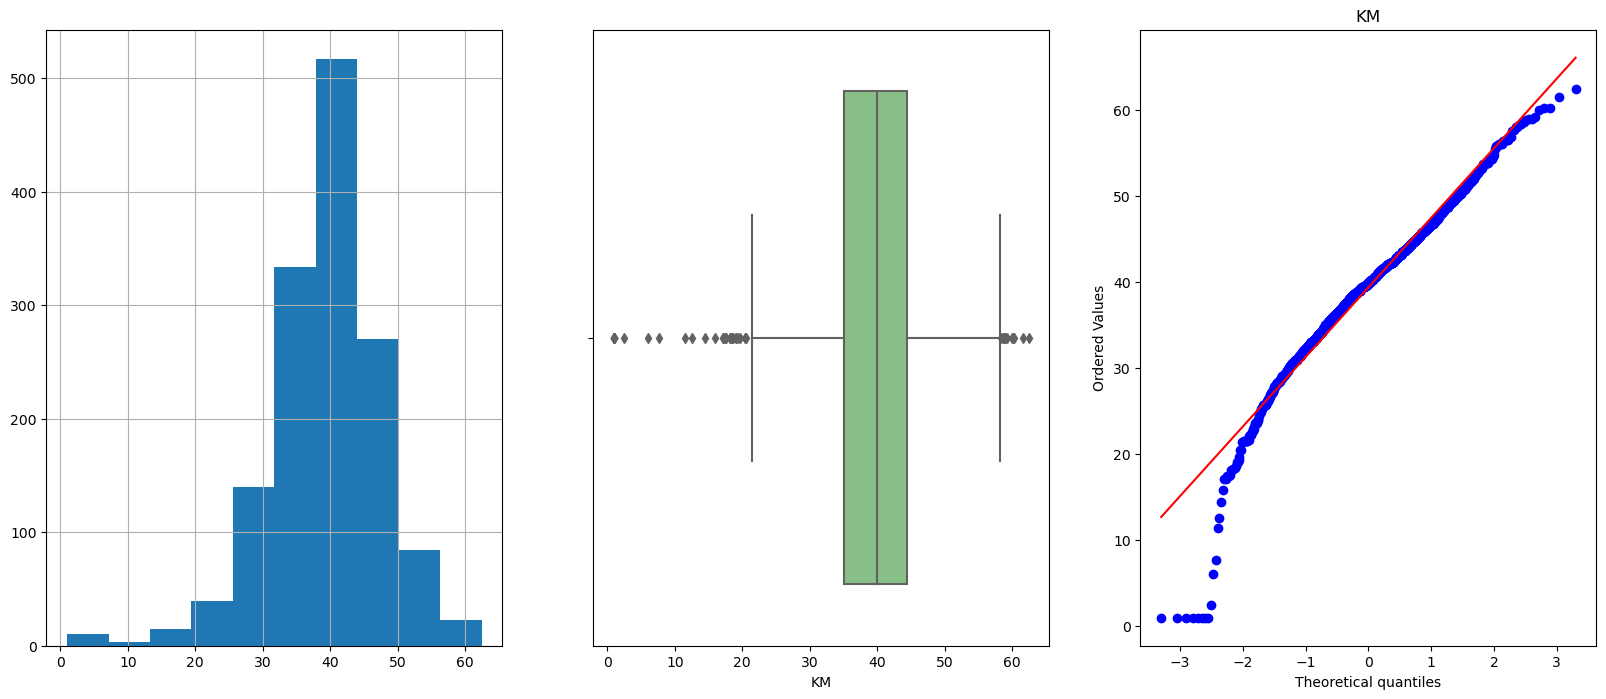

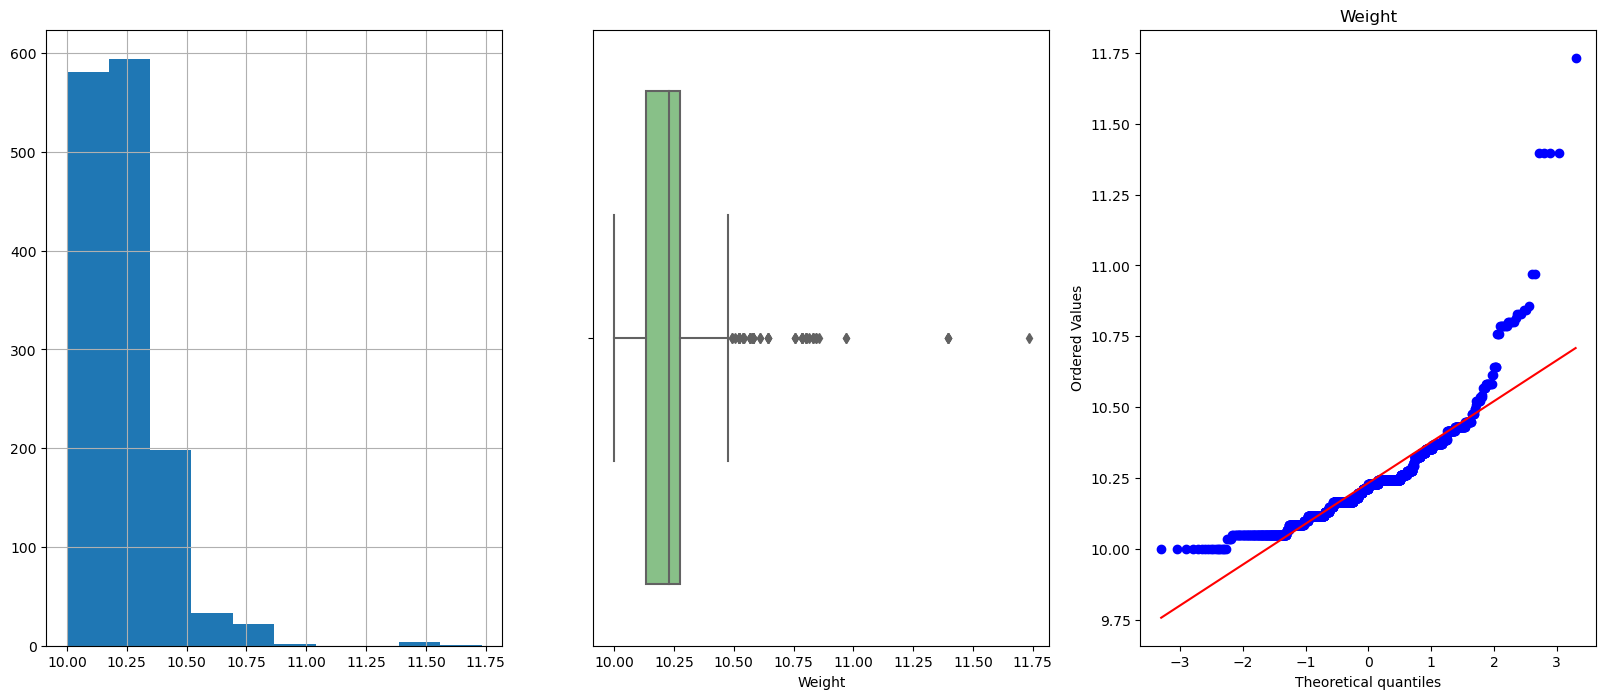

In [32]:
df_cbrt=df.copy()
df_cbrt[continuous_feature]=np.cbrt(df_cbrt[continuous_feature])

plot_data(df_cbrt,'Price')
plot_data(df_cbrt,'Age')
plot_data(df_cbrt,'KM')
plot_data(df_cbrt,'Weight')

###### <font color ='green'> Median Imputation

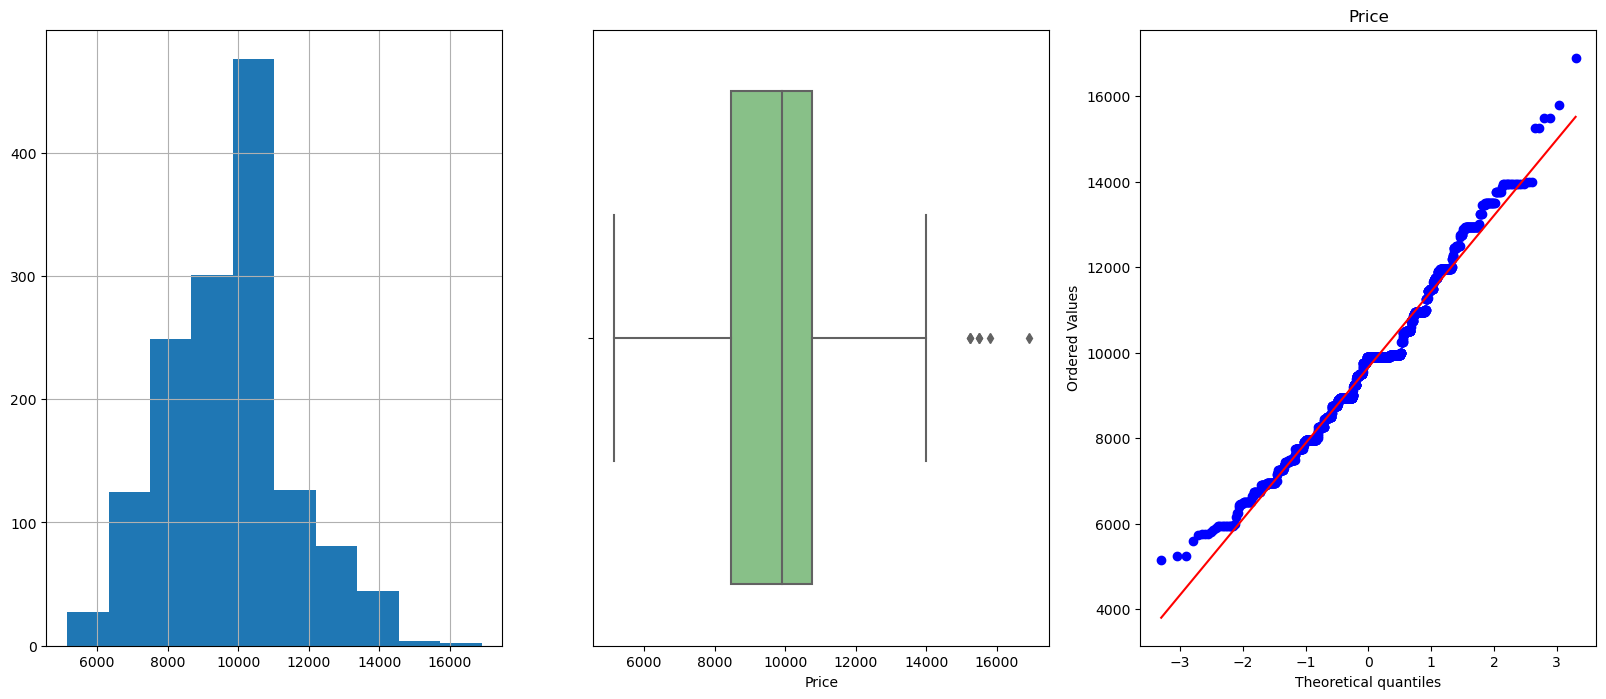

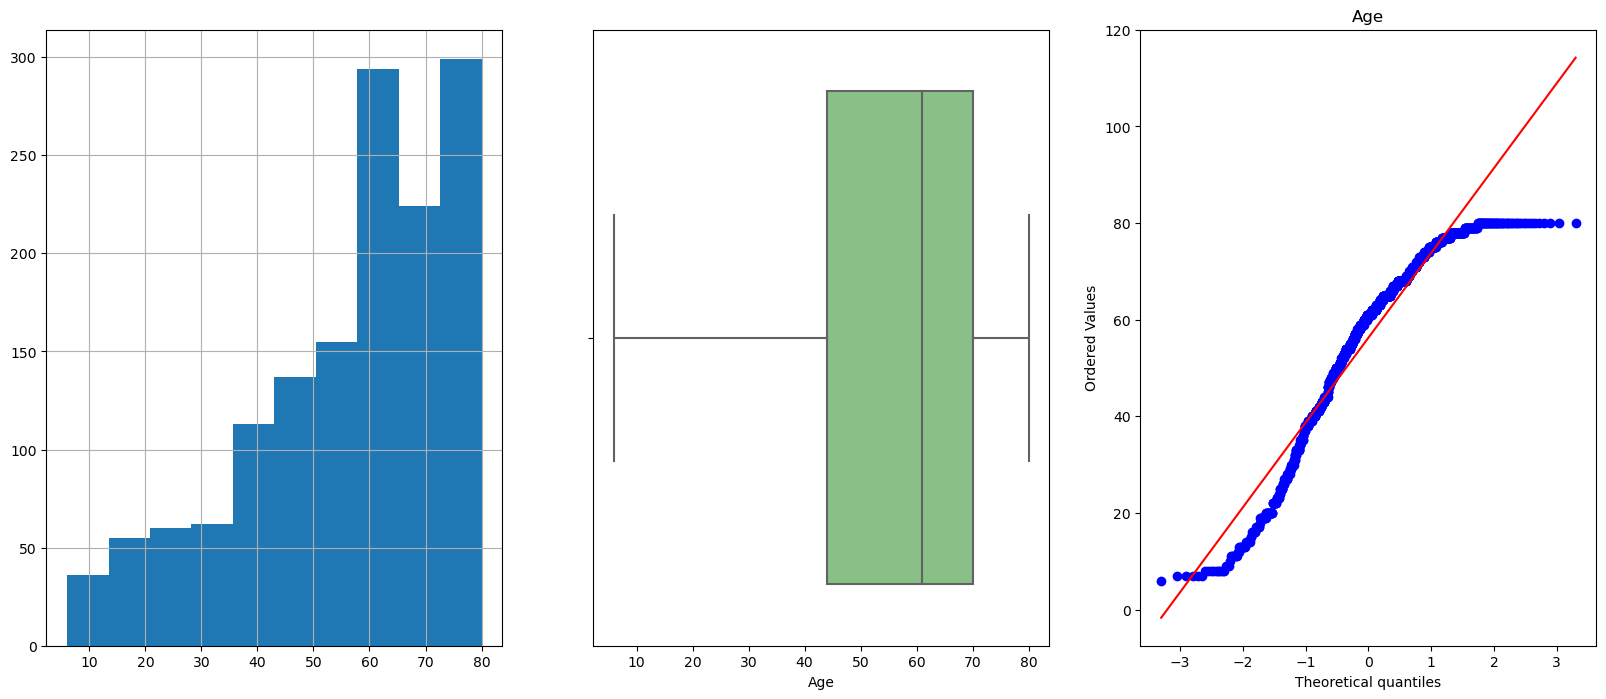

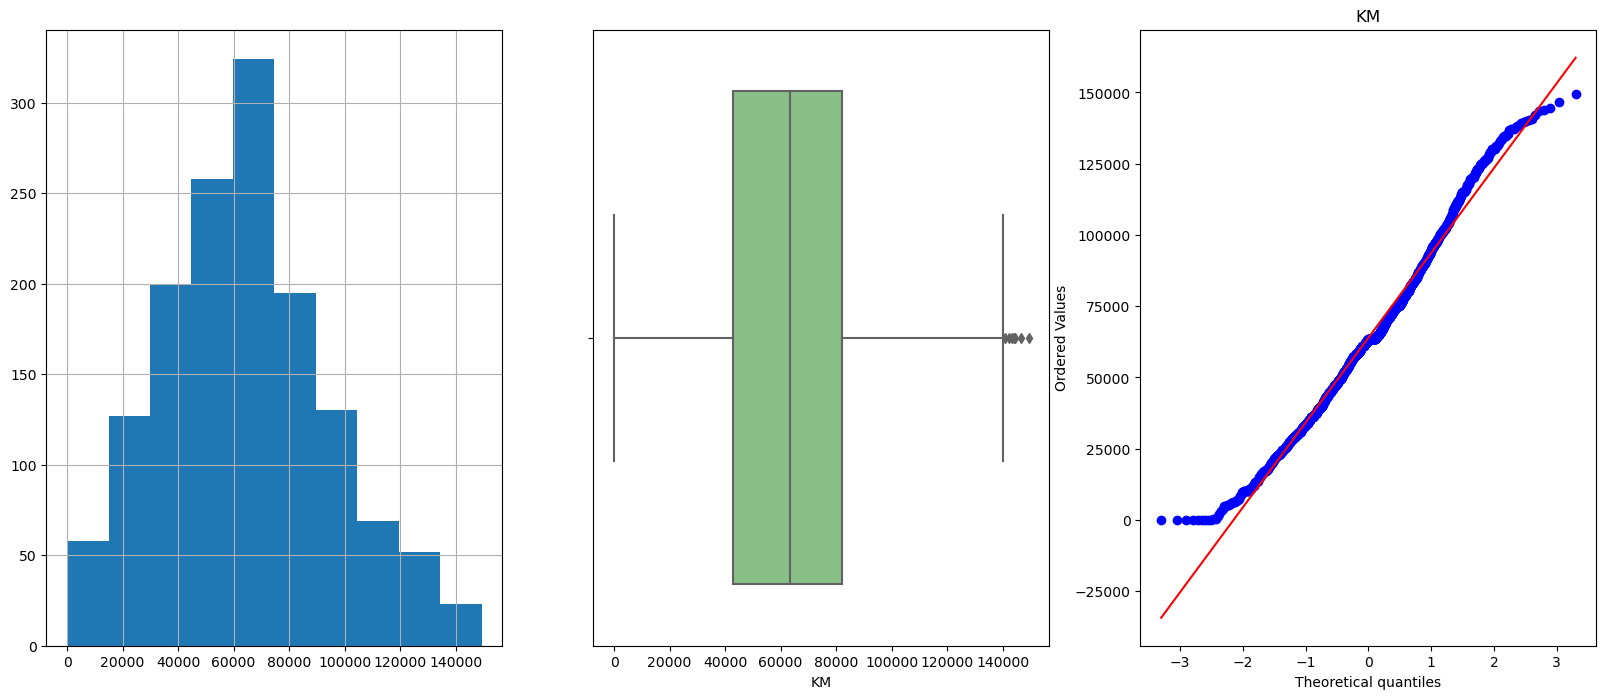

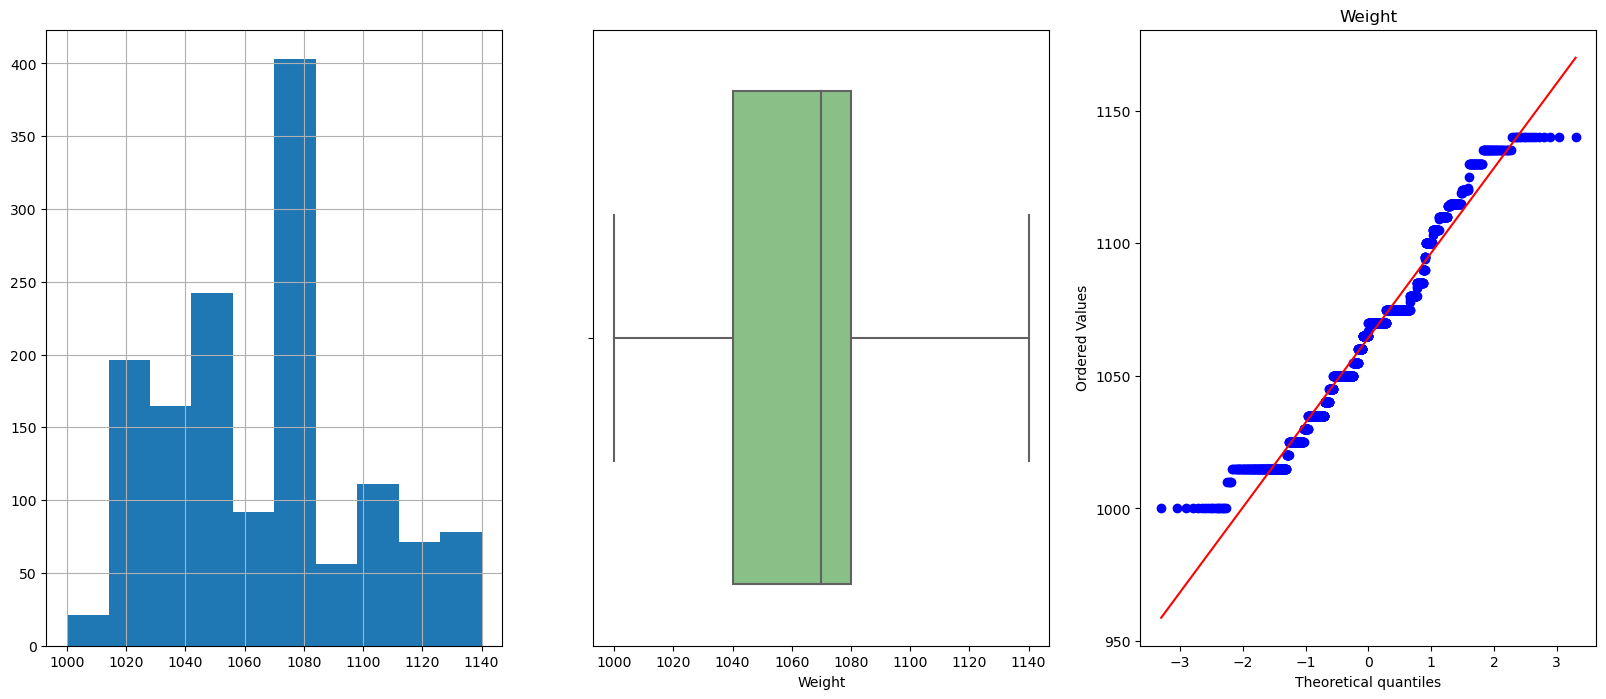

In [33]:
df_median=df.copy()
for feature in df_median[continuous_feature]:
    for i in df_median[feature]:
        q1 = np.quantile(df_median[feature],0.25)
        q3 = np.quantile(df_median[feature],0.75)
        med = np.median(df_median[feature])
        iqr = q3 - q1
        upper_bound = q3+(1.5*iqr)
        lower_bound = q1-(1.5*iqr)
        if i > upper_bound or i < lower_bound:
            df_median[feature] = df_median[feature].replace(i, med)
plot_data(df_median,'Price')
plot_data(df_median,'Age')
plot_data(df_median,'KM')
plot_data(df_median,'Weight')

###### <font color ='green'> Mean Imputation 

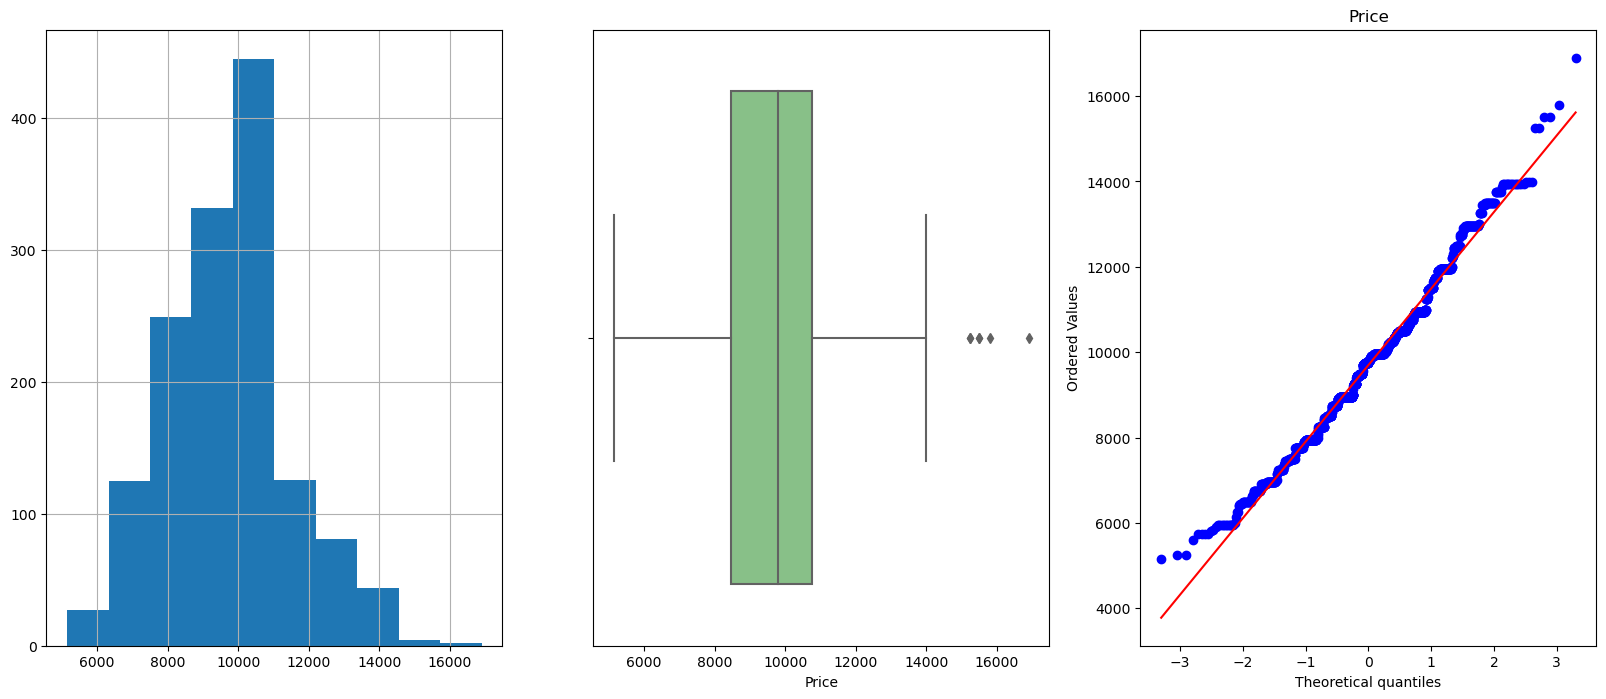

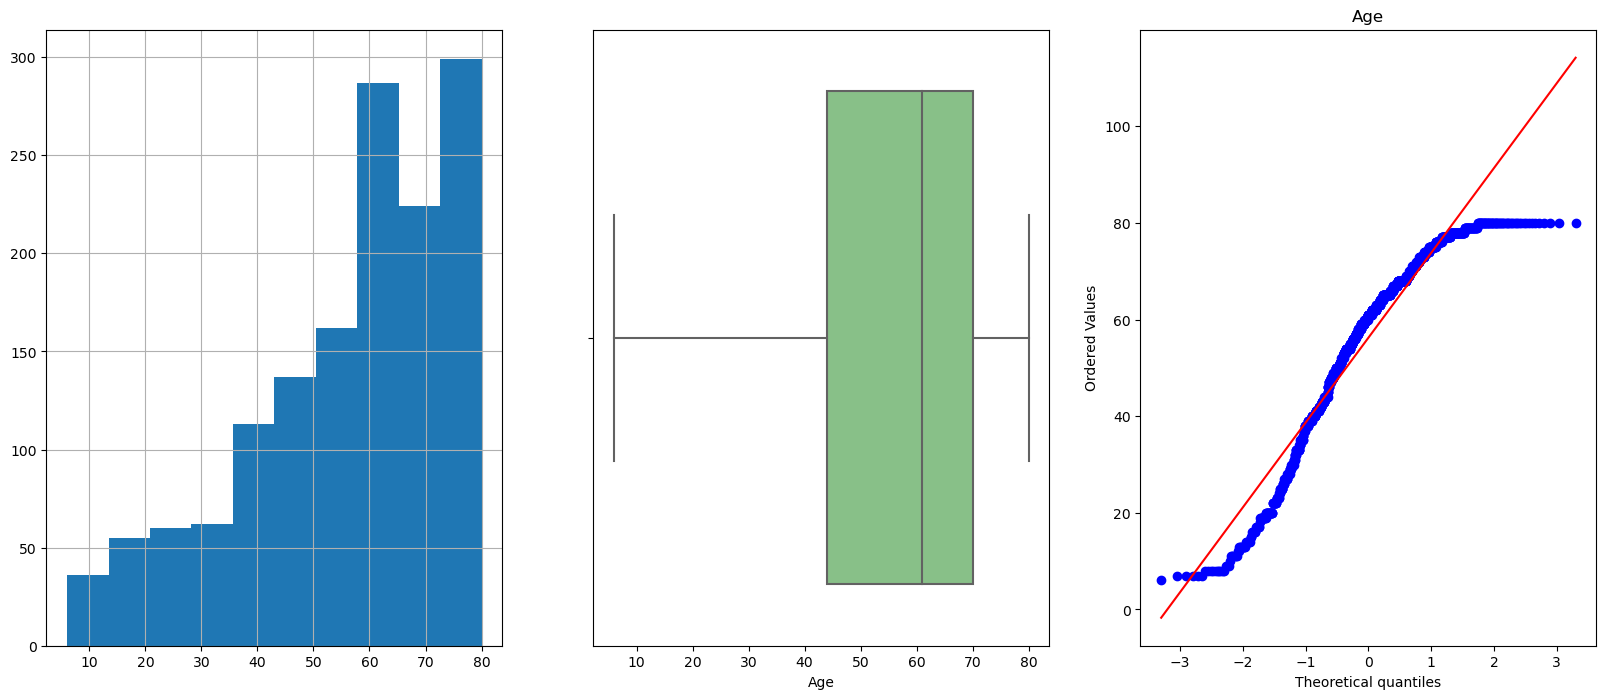

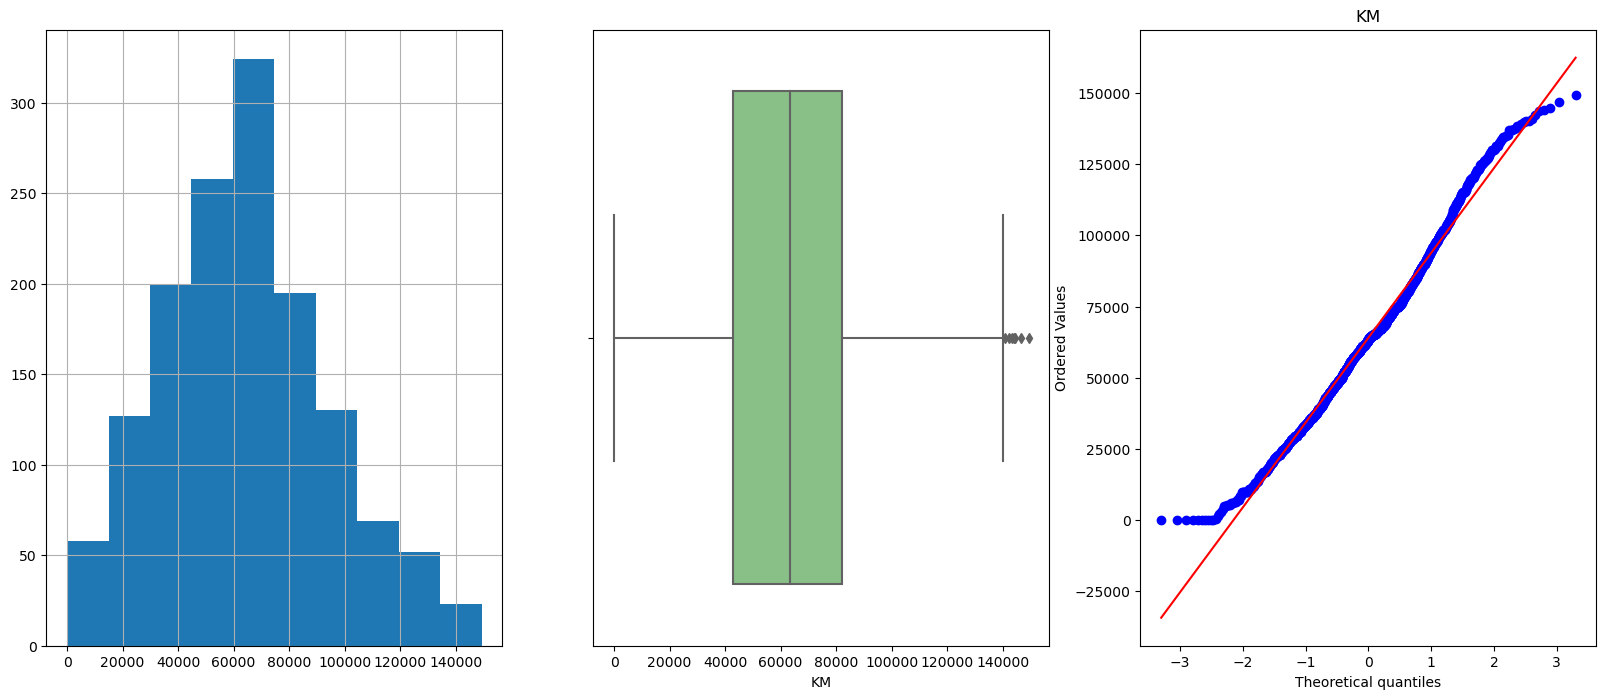

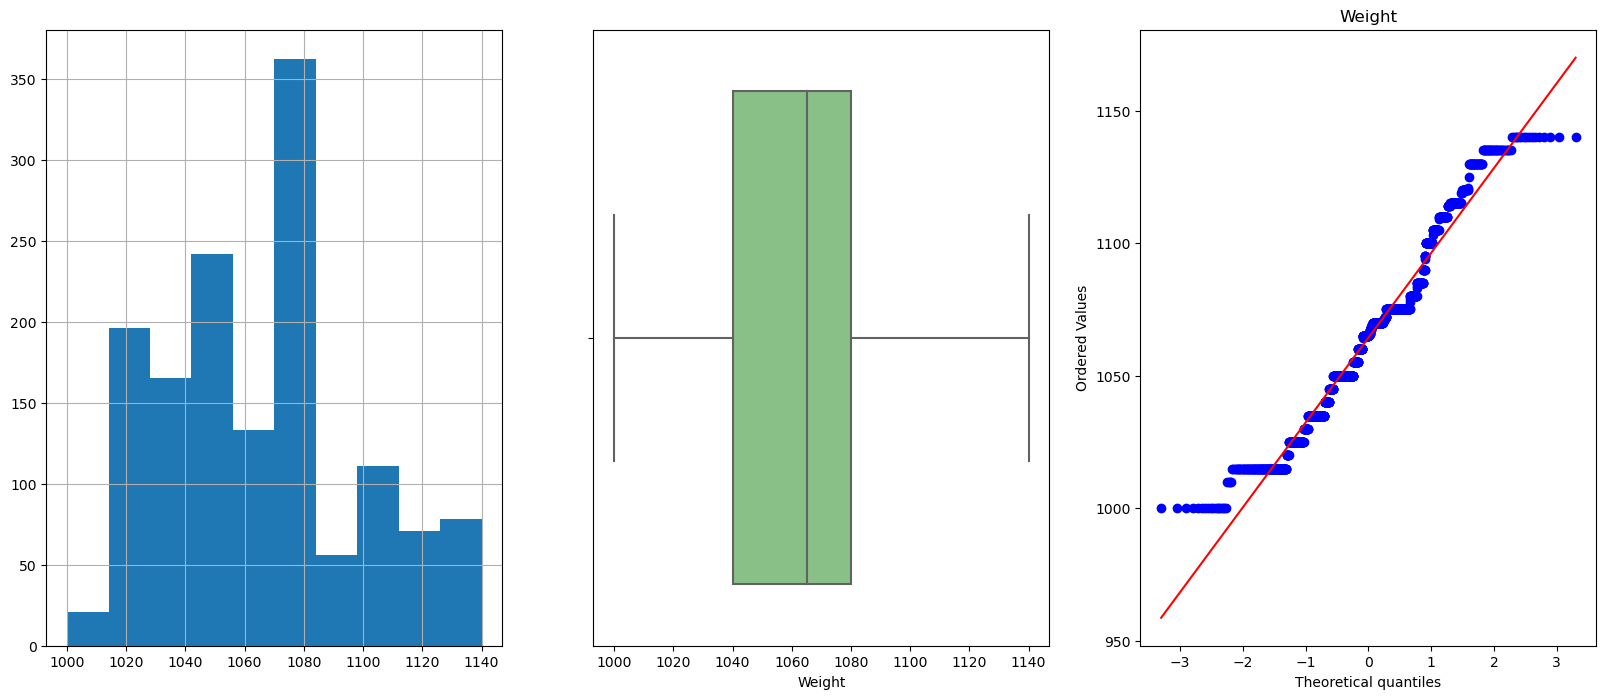

In [34]:
df_mean=df.copy()
for feature in df_mean[continuous_feature]:
    for i in df_mean[feature]:
        q1 = np.quantile(df_mean[feature],0.25)
        q3 = np.quantile(df_mean[feature],0.75)
        mean = np.mean(df_mean[feature])
        iqr = q3 - q1
        upper_bound = q3+(1.5*iqr)
        lower_bound = q1-(1.5*iqr)
        if i > upper_bound or i < lower_bound:
            df_mean[feature] = df_mean[feature].replace(i, mean)
plot_data(df_mean,'Price')
plot_data(df_mean,'Age')
plot_data(df_mean,'KM')
plot_data(df_mean,'Weight')

###### <font color='green'> Observations:
   Even after performing above all techniques, we neither got rid of outliers nor get normal distributions
    
   Since we have very limited data set and contain outliers in each feature, we won't be dropping outliers. Instead we find the Influential records and drop them.

In [35]:
raw_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     1779.
Date:                Wed, 22 Feb 2023   Prob (F-statistic):               0.00
Time:                        00:57:13   Log-Likelihood:                -12371.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1429   BIC:                         2.479e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2418.3188   1049.710     -2.304      0.021   -4477.457    -359.181
Age         -121.8874      2.620    -46.517      0.000    -127.027    -116.747
KM            -0.0206      0.001    -16.457      0.000      -0.023      -0.018
HP            33.4359      2.729     12.253      0.000      28.083      38.789
QT             3.8981      1.297      3.005      0.003       1.353       6.443
Weight        16.4498      1.024     16.069      0.000      14.442      18.458
==============================================================================
Omnibus:                      142.104   Durbin-Watson:                   1.545
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              898.694
Skew:                          -0.190   Prob(JB):                    7.10e-196
Kurtosis:                       6.858   Cond. No.                     2.31e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.31e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### <font color ='red'> Residual Analysis

In [36]:
def standard_values(i):
    return ((i-i.mean())/i.std())

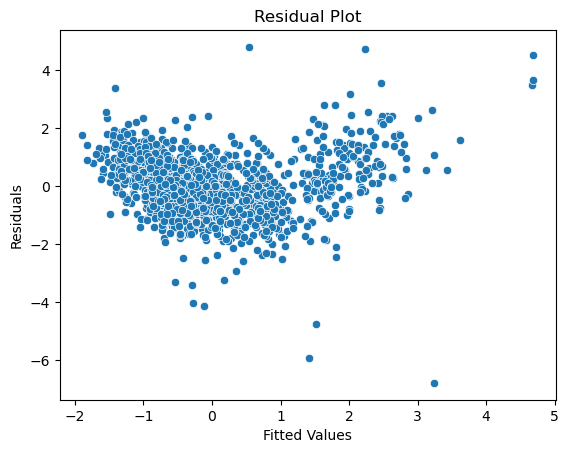

In [37]:
sns.scatterplot(x= standard_values(raw_model.fittedvalues), y= standard_values(raw_model.resid))
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

###### <font color='green'> Observation
   We can find a clear pattern the residual plot, so this model has the limitation of Heteroscedasticity

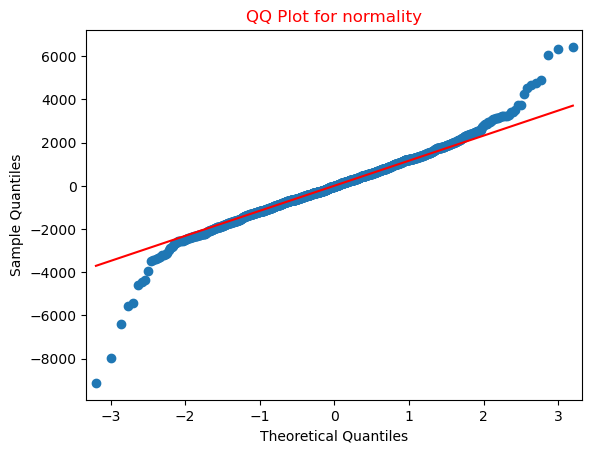

In [38]:
sm.qqplot(raw_model.resid, line='q')
plt.title('QQ Plot for normality', fontdict={'color':'red'})
plt.show()

###### Visualizing the relation between each feature and the errors in the raw model

eval_env: 1


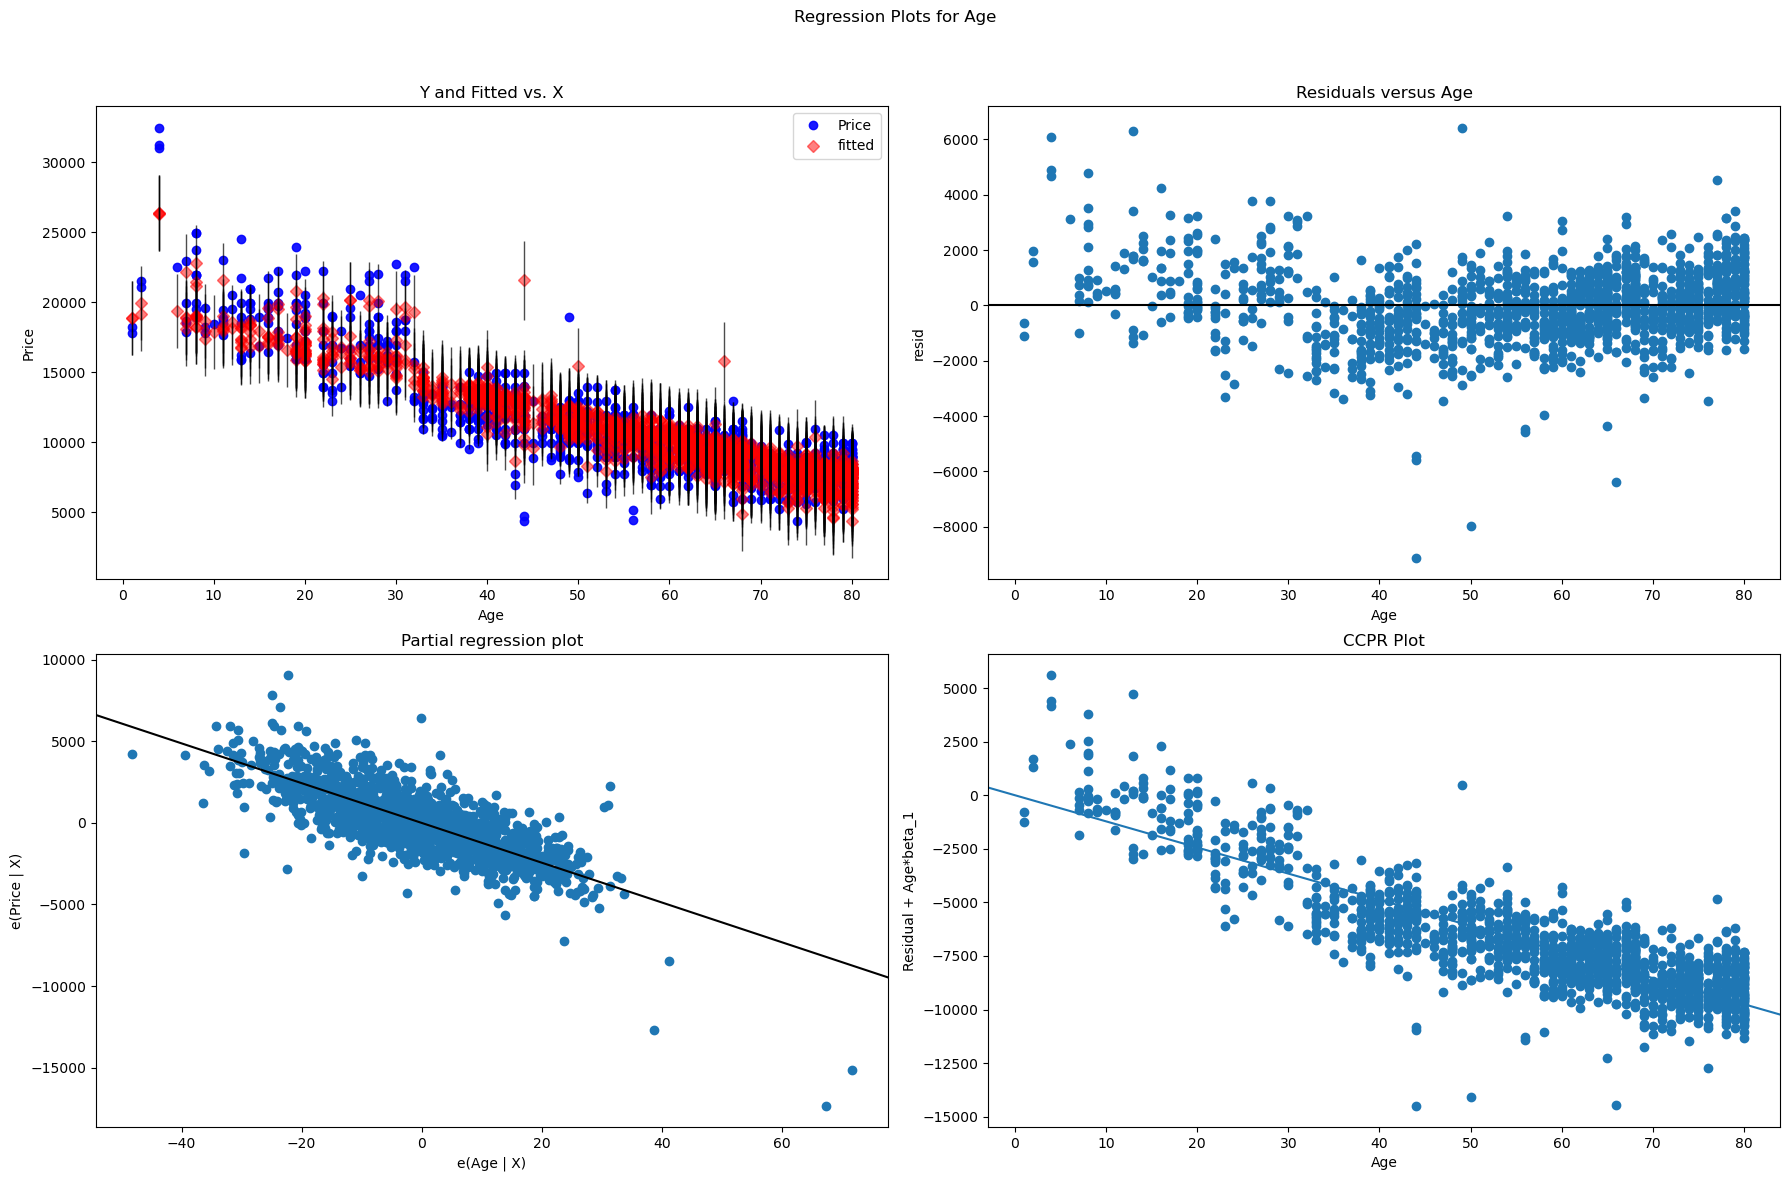

In [39]:
sm.graphics.plot_regress_exog(raw_model,'Age', fig =plt.figure(figsize=[18,12]))
plt.show()

eval_env: 1


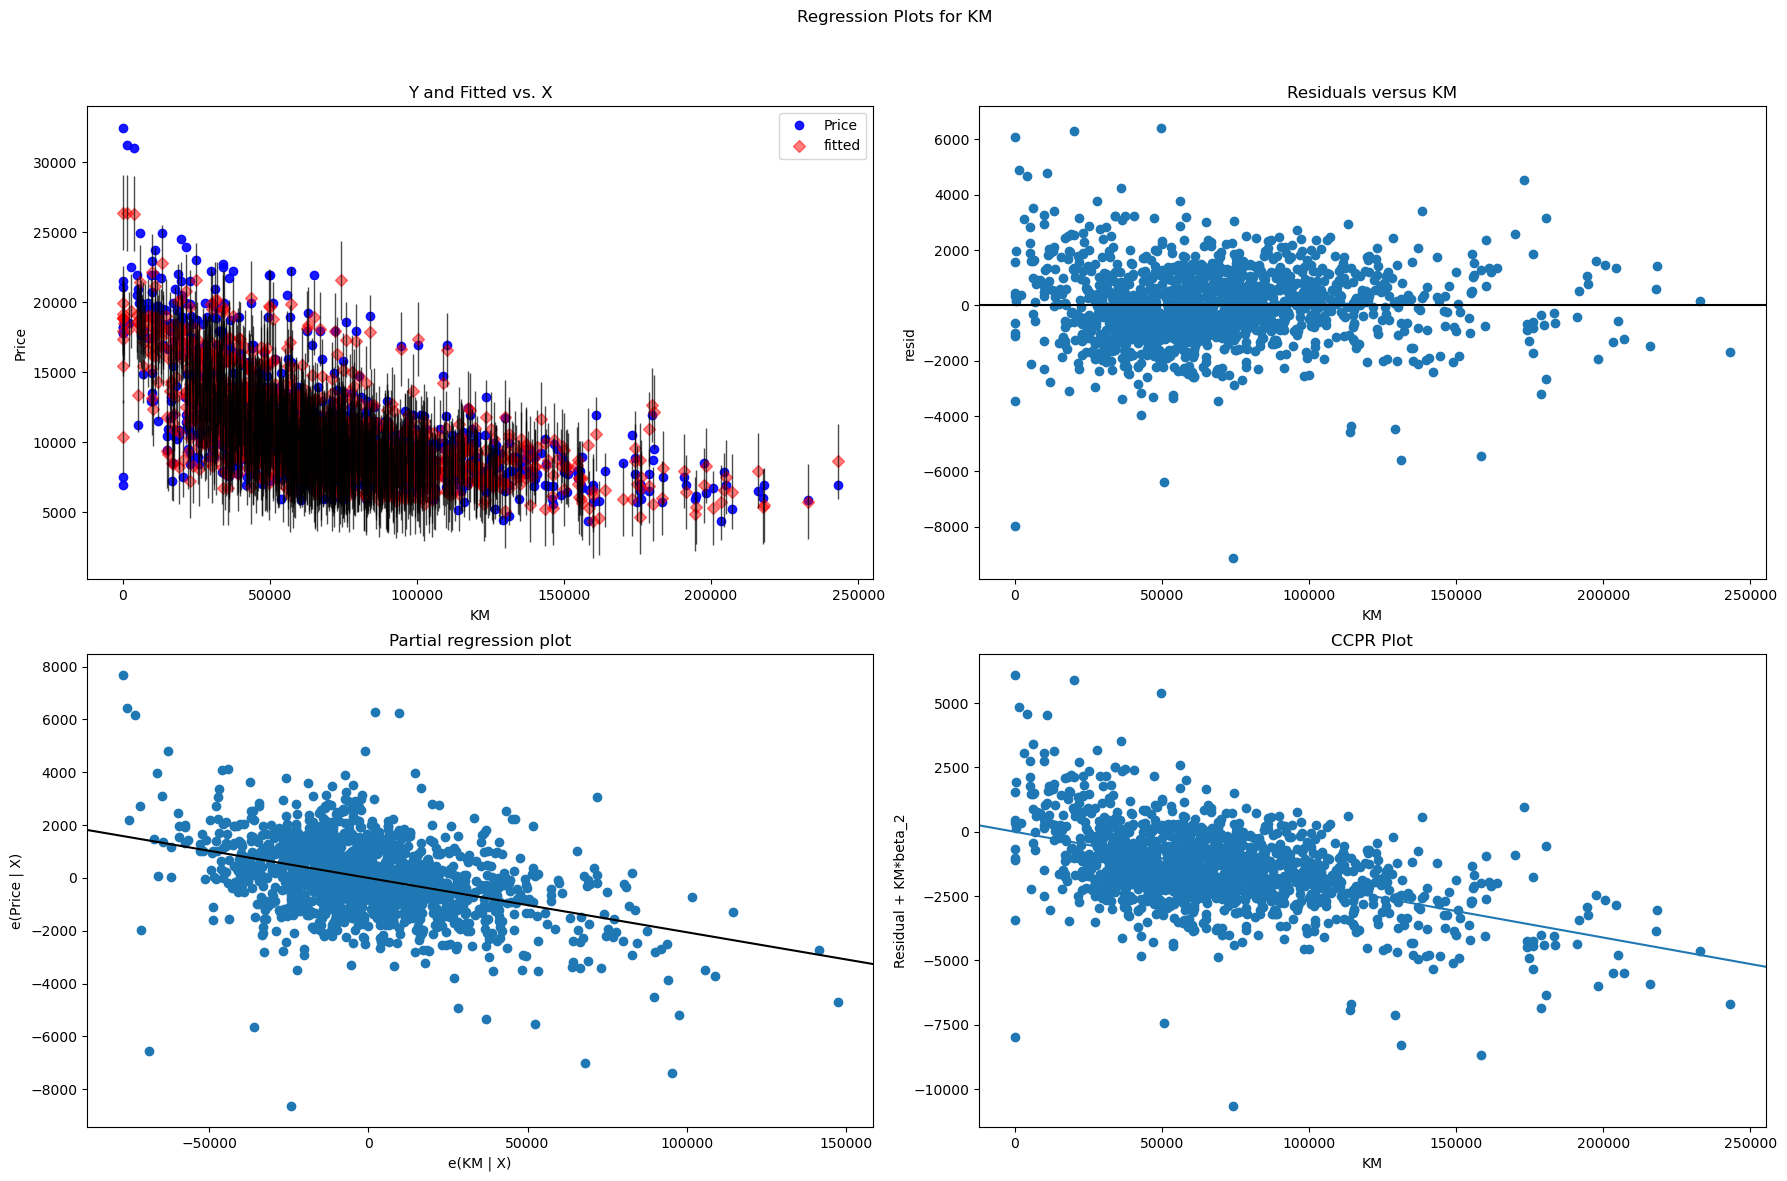

In [40]:
sm.graphics.plot_regress_exog(raw_model,'KM', fig =plt.figure(figsize=[18,12]))
plt.show()

eval_env: 1


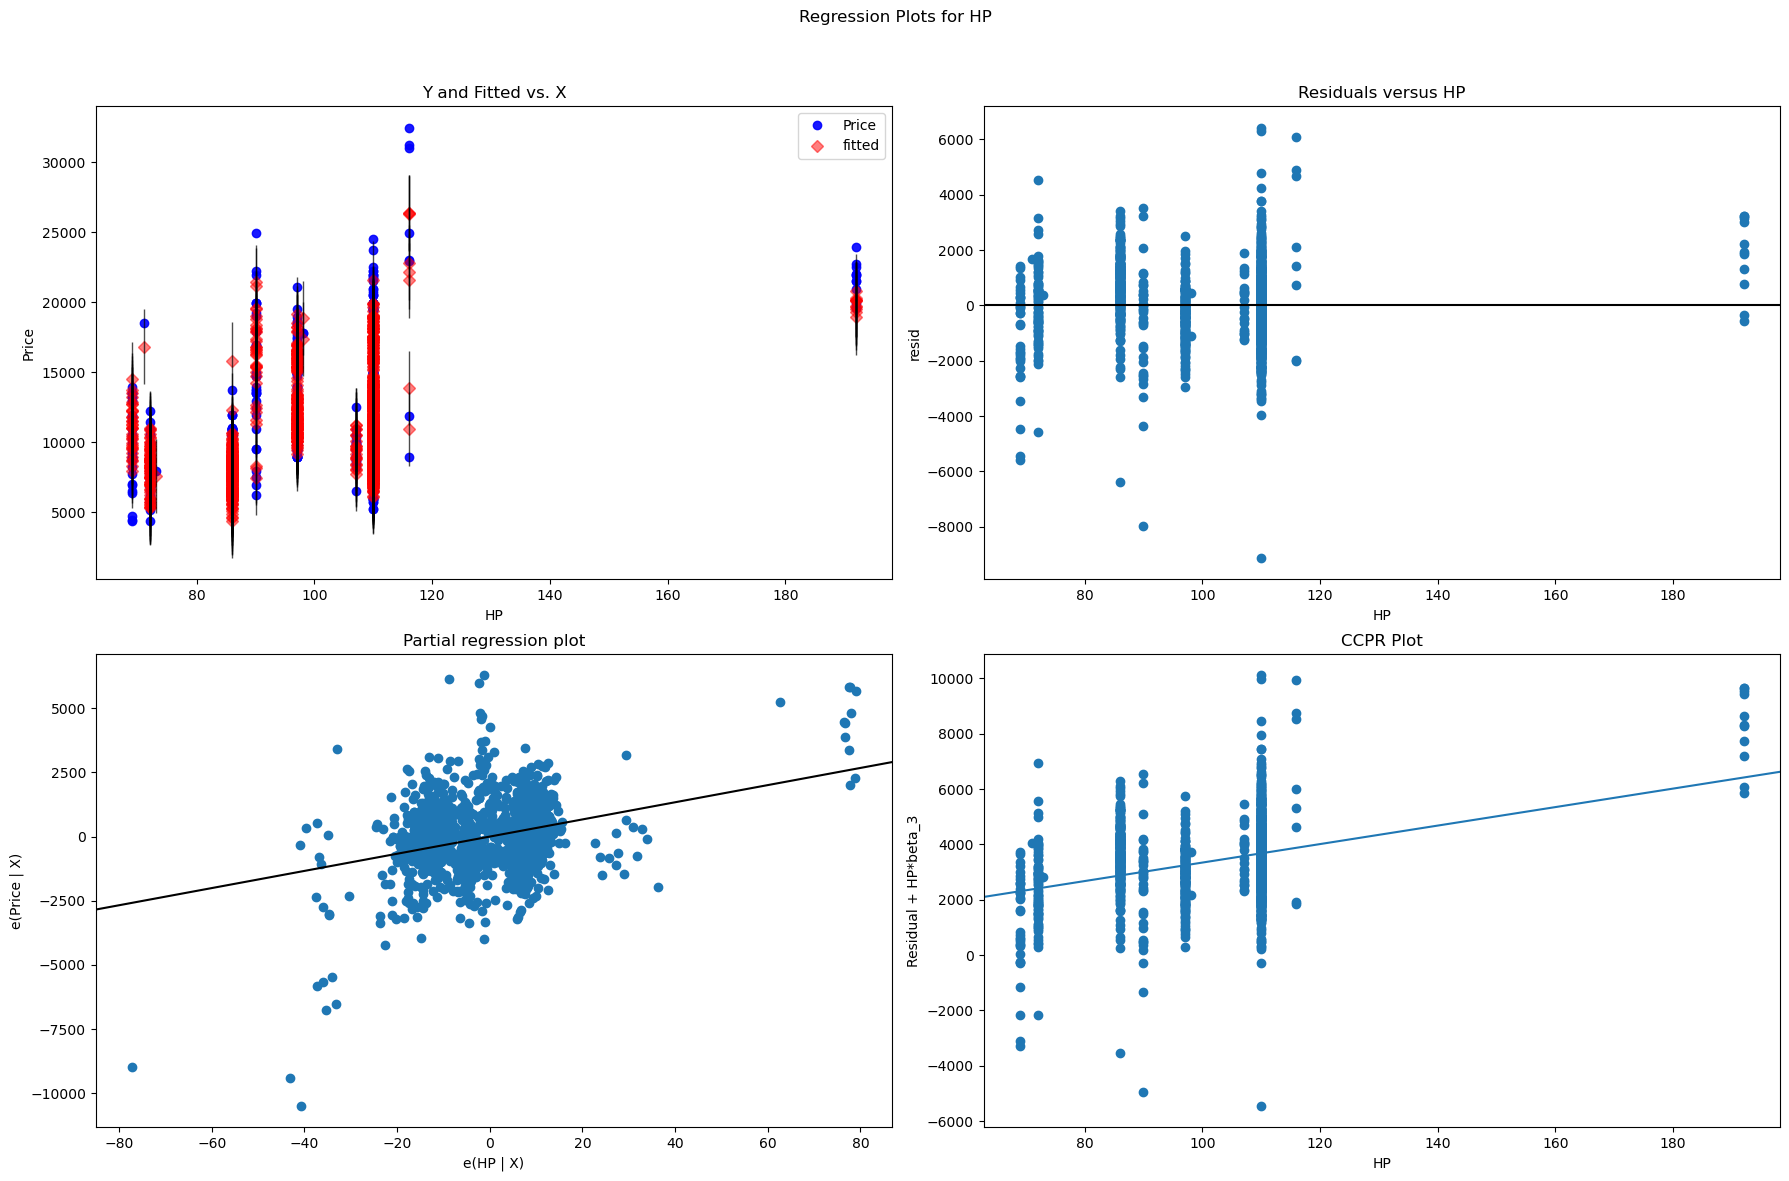

In [41]:
sm.graphics.plot_regress_exog(raw_model,'HP', fig =plt.figure(figsize=[18,12]))
plt.show()

eval_env: 1


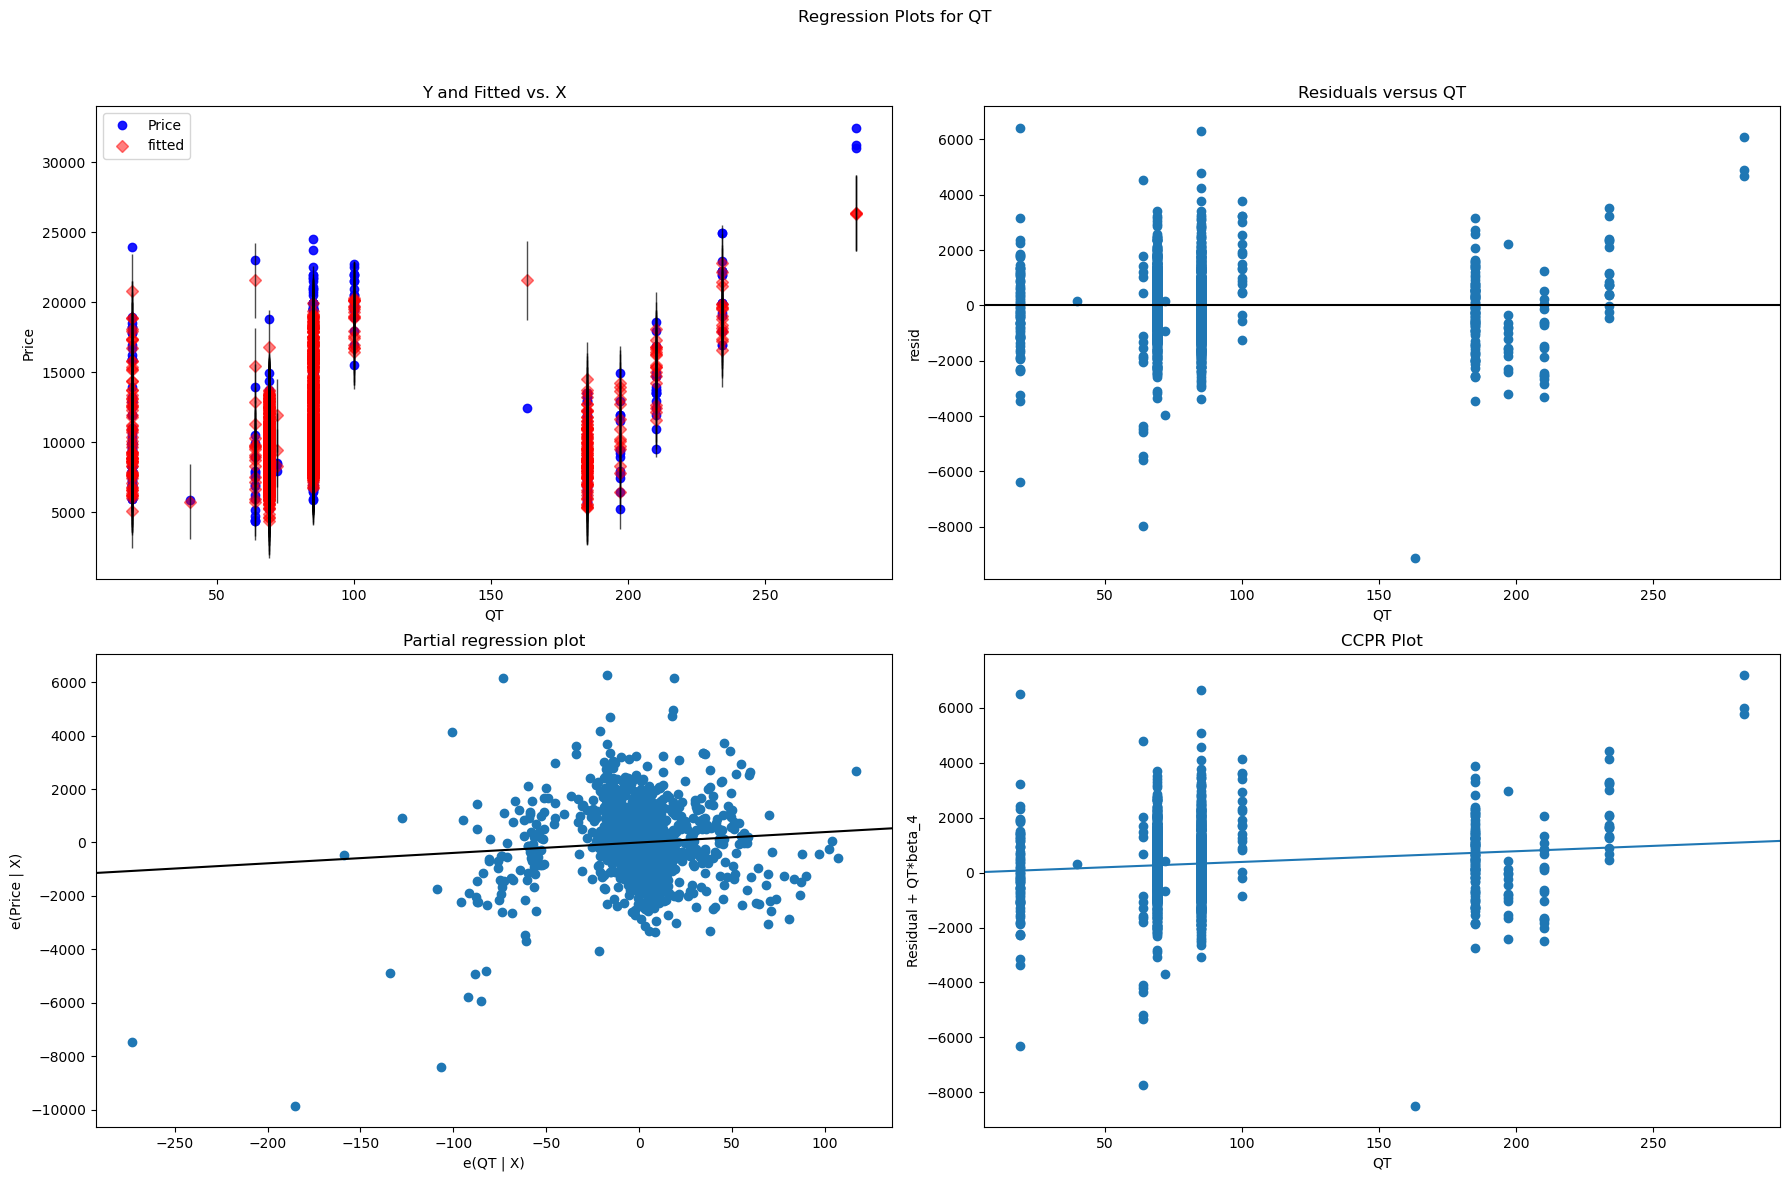

In [42]:
sm.graphics.plot_regress_exog(raw_model,'QT', fig =plt.figure(figsize=[18,12]))
plt.show()

eval_env: 1


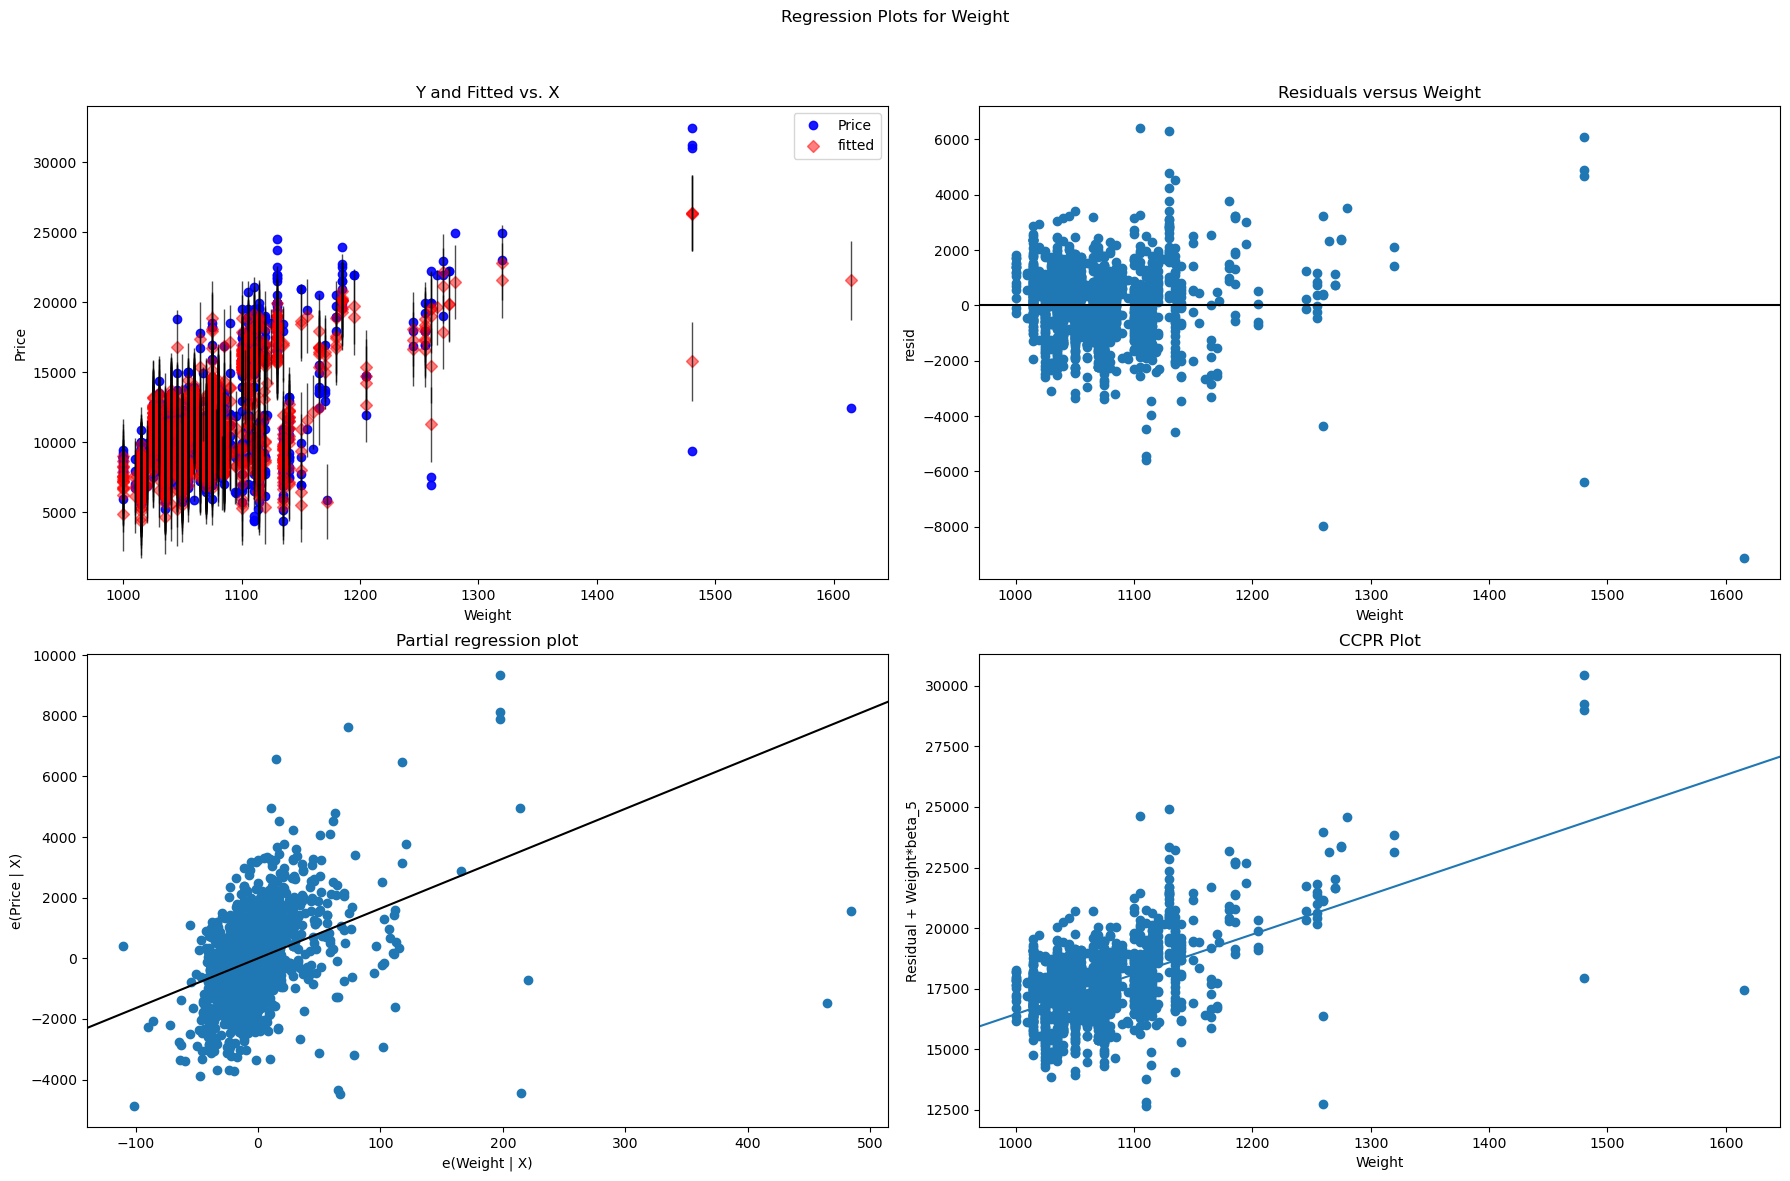

In [43]:
sm.graphics.plot_regress_exog(raw_model,'Weight', fig =plt.figure(figsize=[18,12]))
plt.show()

###### Now let's calculate the Cook's distance

In [44]:
(c,_) = raw_model.get_influence().cooks_distance
np.max(c),np.argmax(c)

(1.303788127367577, 220)

In [45]:
k = df.shape[1]
n = df.shape[0]
leverage_cutoff = (3*(k+1))/n
print('Cut-off line at',np.round(leverage_cutoff,2))

Cut-off line at 0.01


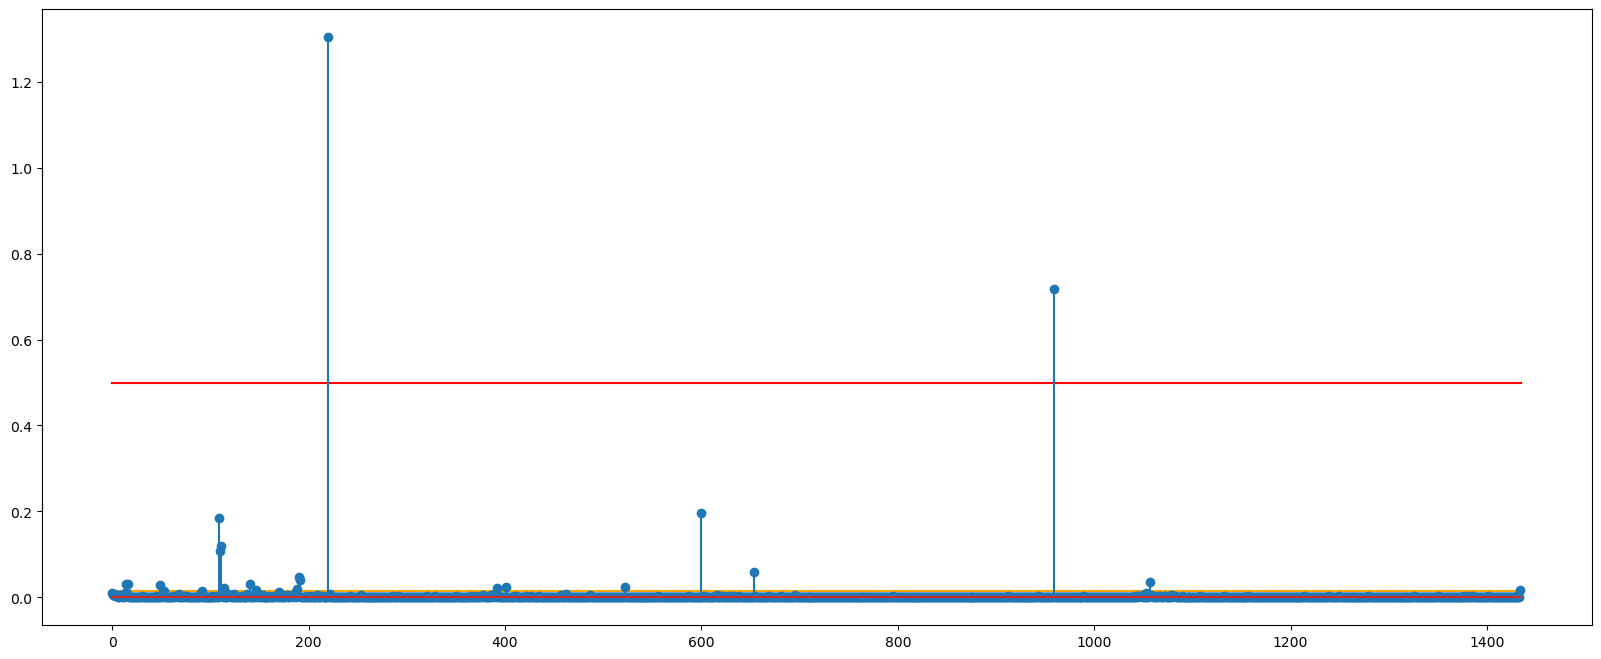

In [46]:
x=[0,len(df)]
y = [leverage_cutoff,leverage_cutoff]
y1 = [0.5,0.5]
plt.figure(figsize=(20,8))
plt.plot(x,y, c='orange')
plt.plot(x,y1,c='red')
plt.stem(np.arange(len(df)), np.round(c, 3))
plt.show()

###### <font color='green'> Observation
   We can observe there are so many datapoints which has cook's distance more than leverage cut-off (yellow line) some points even has cook's distance more than 0.5

###### Influence Plot

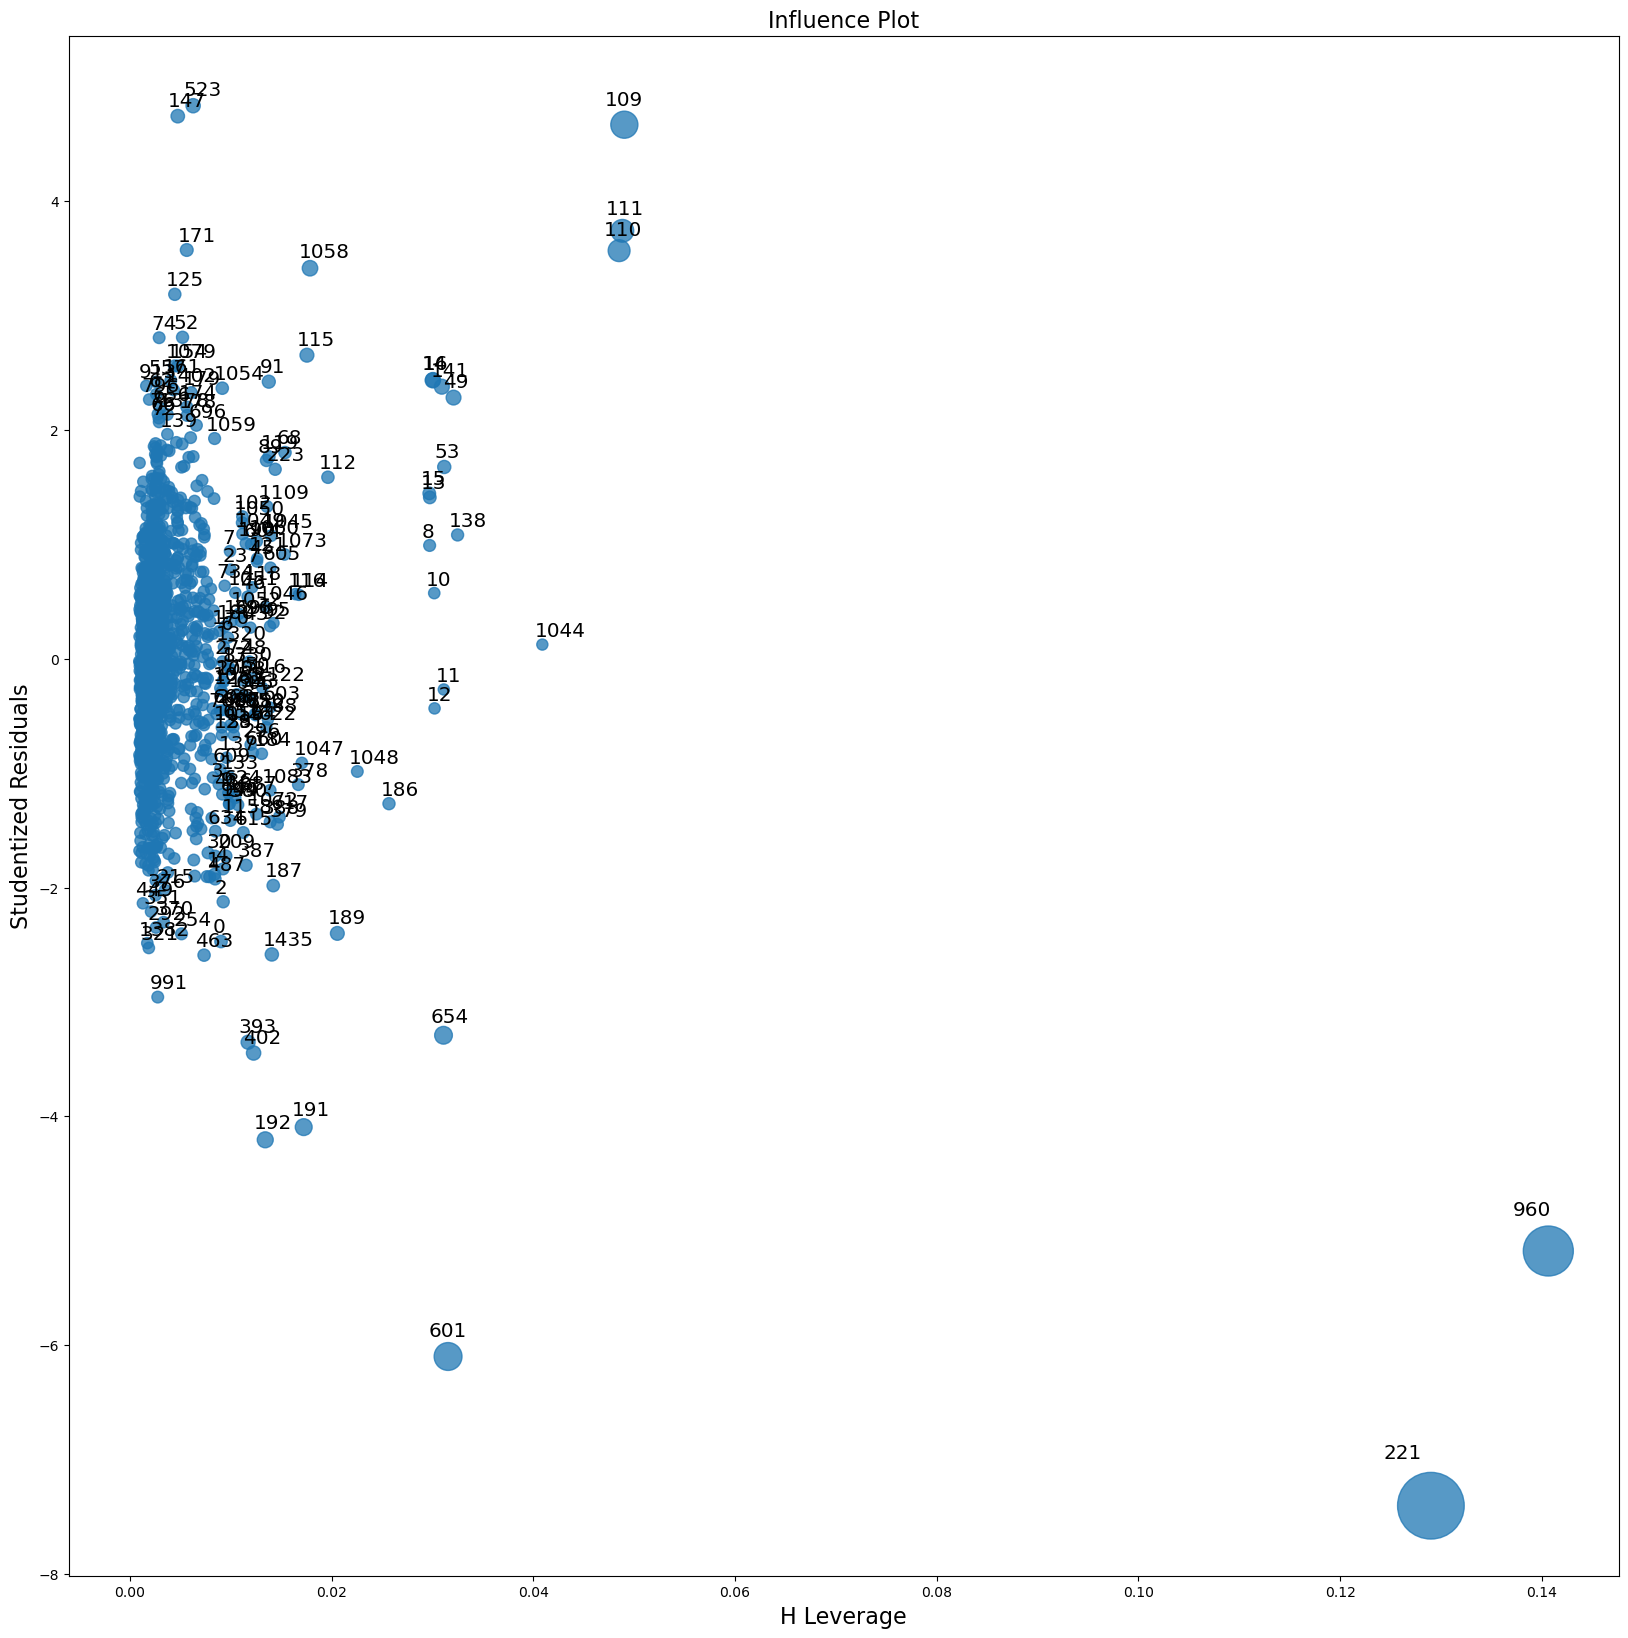

In [47]:
fig,ax=plt.subplots(figsize=(20,20))
fig =influence_plot(raw_model, ax=ax)
plt.show()

###### Deleting all the influence points to improve our model containing raw data

In [48]:
df1 = df.copy()
c1 = np.max(c)
lc_off = leverage_cutoff
while np.max(c1) > lc_off:
    k1 = df1.shape[1]
    n1 = df1.shape[0]
    lc_off = (3*(k1+1))/n1
    model = smf.ols('Price~Age+KM+HP+QT+Weight',data=df1).fit()
    (c1,_) = model.get_influence().cooks_distance
    np.max(c1),np.argmax(c1)
    df1 = df1.drop(df1.index[[np.argmax(c1)]], axis=0)
else:
    improved_model = smf.ols('Price~Age+KM+HP+QT+Weight',data=df1).fit()
    (c,_) = improved_model.get_influence().cooks_distance
    print(improved_model.rsquared , improved_model.aic,df1.shape)
    display(improved_model.summary())    

0.881130055402733 23386.593959707996 (1387, 6)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     2047.
Date:                Wed, 22 Feb 2023   Prob (F-statistic):               0.00
Time:                        00:57:28   Log-Likelihood:                -11687.
No. Observations:                1387   AIC:                         2.339e+04
Df Residuals:                    1381   BIC:                         2.342e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -9692.3020   1216.467     -7.968      0.000   -1.21e+04   -7305.979
Age         -114.2731      2.308    -49.519      0.000    -118.800    -109.746
KM            -0.0182      0.001    -16.533      0.000      -0.020      -0.016
HP             2.4349      2.899      0.840      0.401      -3.251       8.121
QT           -11.1426      1.348     -8.268      0.000     -13.786      -8.499
Weight        26.8585      1.223     21.965      0.000      24.460      29.257
==============================================================================
Omnibus:                       11.646   Durbin-Watson:                   1.757
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               15.321
Skew:                           0.097   Prob(JB):                     0.000471
Kurtosis:                       3.477   Cond. No.                     3.17e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.17e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

###### <font color='green'> Observations
    
    
 * We can clearly see that, the adjusted r-squared values, aic are improved
    
 * But the p-value of HP is increased to > 0.05 which will be a problem considering our Hypothesis test
    
 * Since we already saw that HP column doesn't contribute much to the Prediction of Target variables(from heatmap of correlation and bar graph of Discrete features)
    
 * So we will drop this feature and build another model with the same data used by improved model

###### Building Final model

In [49]:
final_model = smf.ols('Price~Age+KM+QT+Weight',data=df1).fit()
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     2560.
Date:                Wed, 22 Feb 2023   Prob (F-statistic):               0.00
Time:                        00:57:28   Log-Likelihood:                -11688.
No. Observations:                1387   AIC:                         2.339e+04
Df Residuals:                    1382   BIC:                         2.341e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -9816.3591   1207.340     -8.131      0.000   -1.22e+04   -7447.941
Age         -114.0626      2.294    -49.727      0.000    -118.562    -109.563
KM            -0.0183      0.001    -16.763      0.000      -0.020      -0.016
QT           -11.7055      1.169    -10.012      0.000     -13.999      -9.412
Weight        27.2466      1.132     24.069      0.000      25.026      29.467
==============================================================================
Omnibus:                       11.808   Durbin-Watson:                   1.760
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               15.790
Skew:                           0.092   Prob(JB):                     0.000373
Kurtosis:                       3.490   Cond. No.                     3.15e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.15e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

###### <font color='green'> Observations
   * We can see that R-squared and Adj R-squared values for both models are almost same, but we got no problem of collinearity of features in the Final Model

###### <font color='red'> Residual Analysis

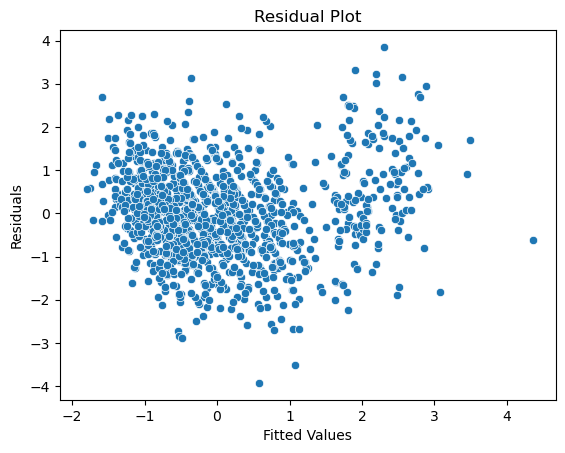

In [50]:
sns.scatterplot(x= standard_values(final_model.fittedvalues), y= standard_values(final_model.resid))
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

###### <font color='green'> Observation
  * We can observe there is no pattern in the plot, we did overcame problem of Heteroscedasticity by the Raw model

###### Checking the Normality of Errors

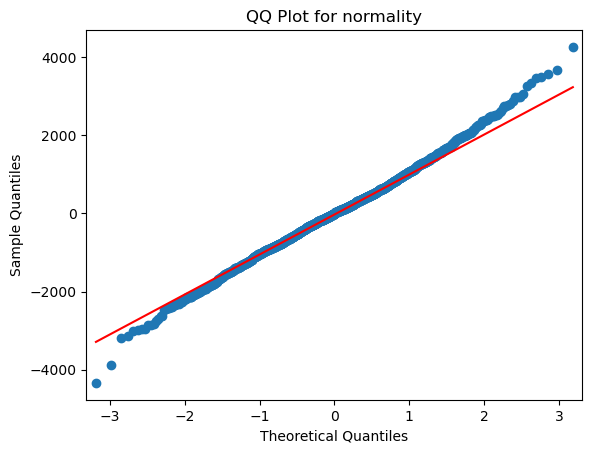

In [51]:
sm.qqplot(final_model.resid, line='q')
plt.title('QQ Plot for normality')
plt.show()

###### <font color='green'> Observation
  * The errors have a near Normal Distribution

###### Visualizing the relation between each feature and the errors in the raw model

eval_env: 1


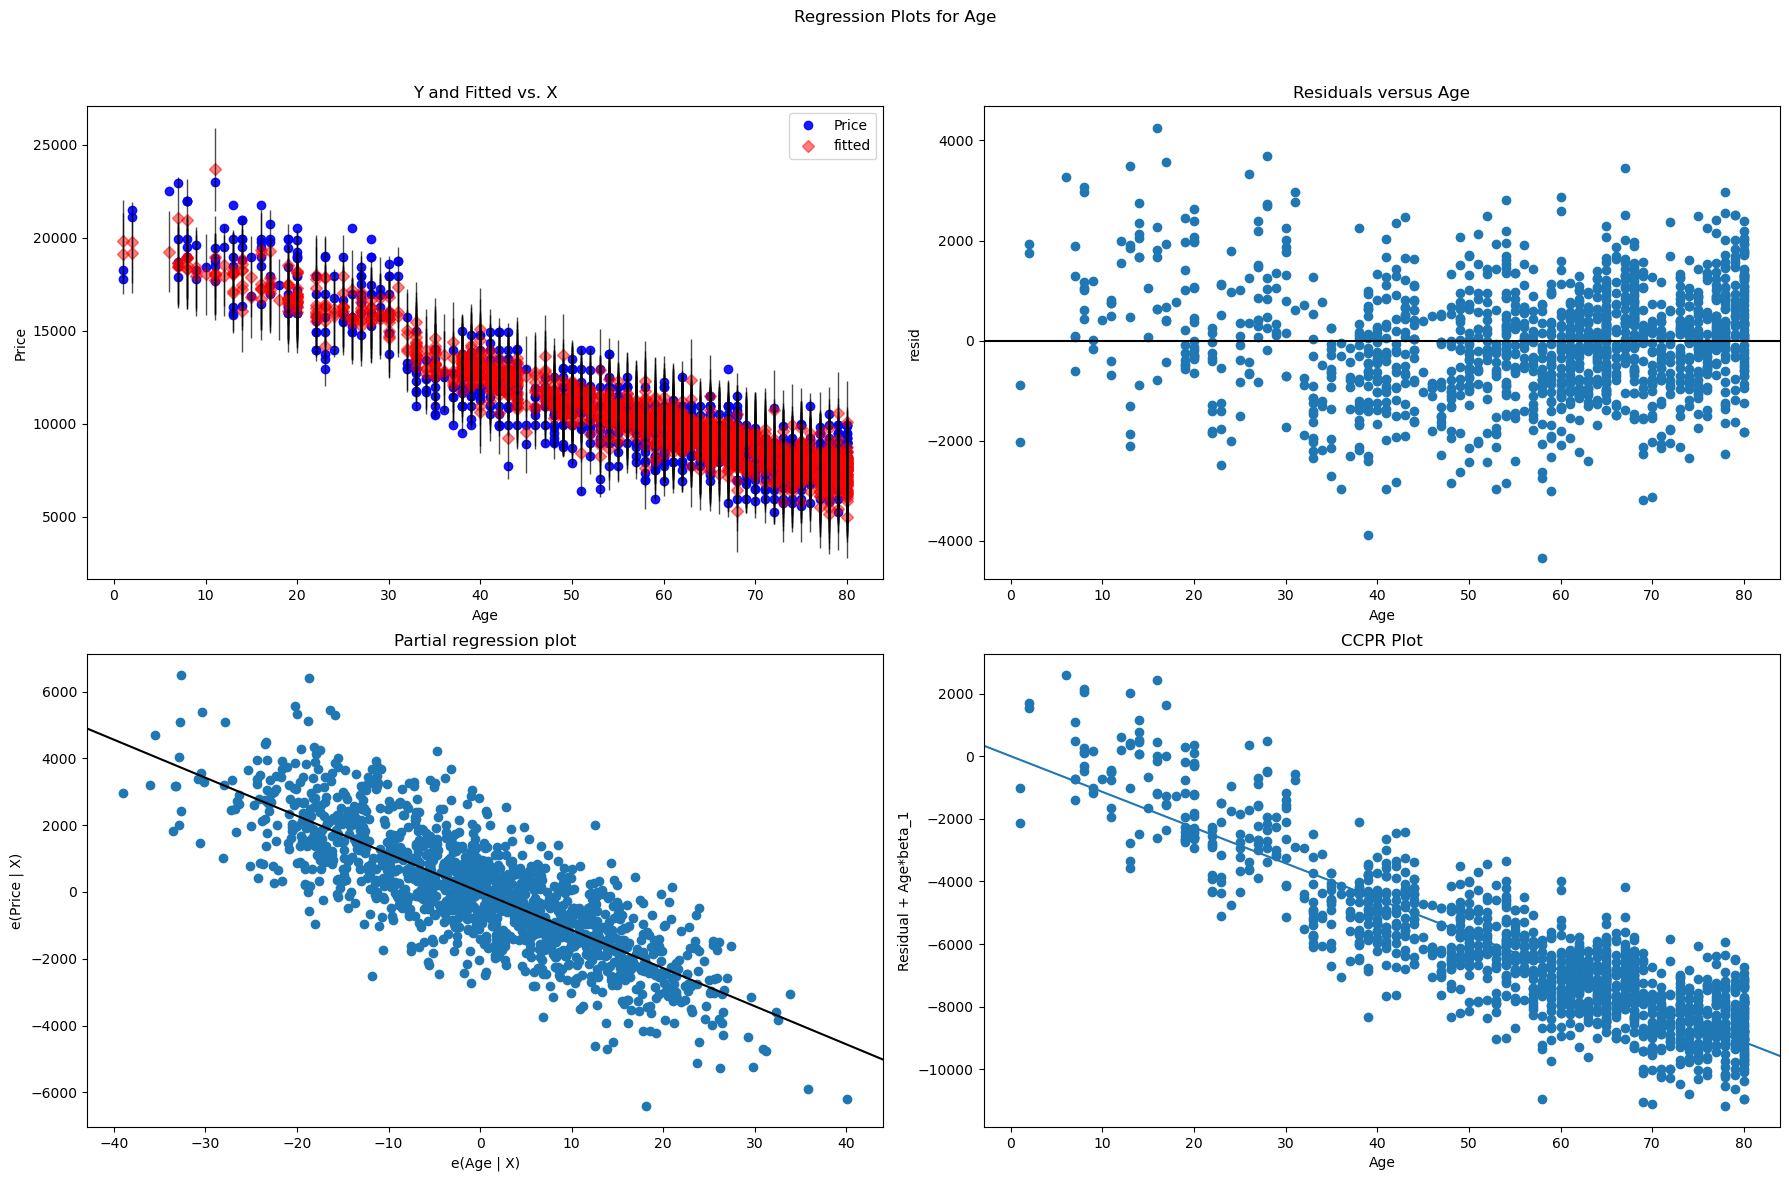

In [52]:
sm.graphics.plot_regress_exog(final_model,'Age', fig =plt.figure(figsize=[18,12]))
plt.show()

eval_env: 1


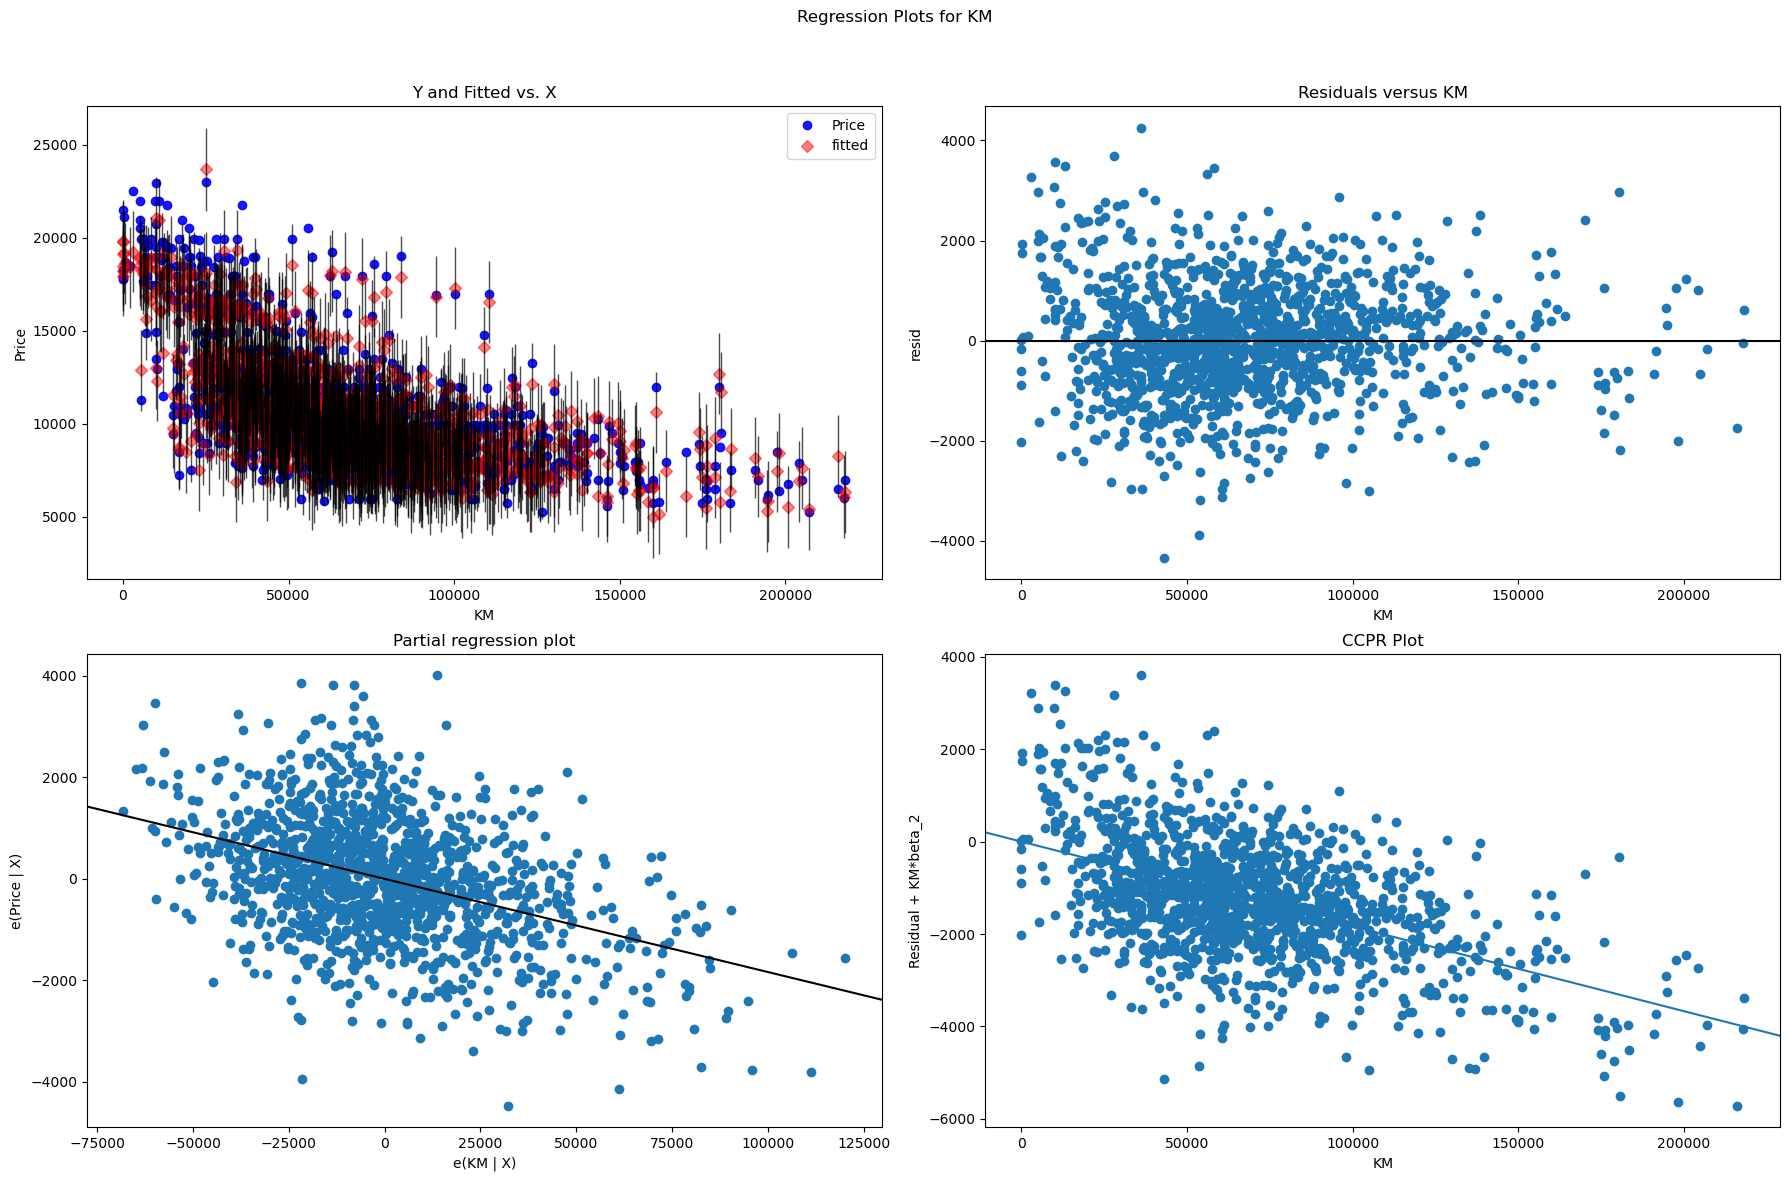

In [53]:
sm.graphics.plot_regress_exog(final_model,'KM', fig =plt.figure(figsize=[18,12]))
plt.show()

eval_env: 1


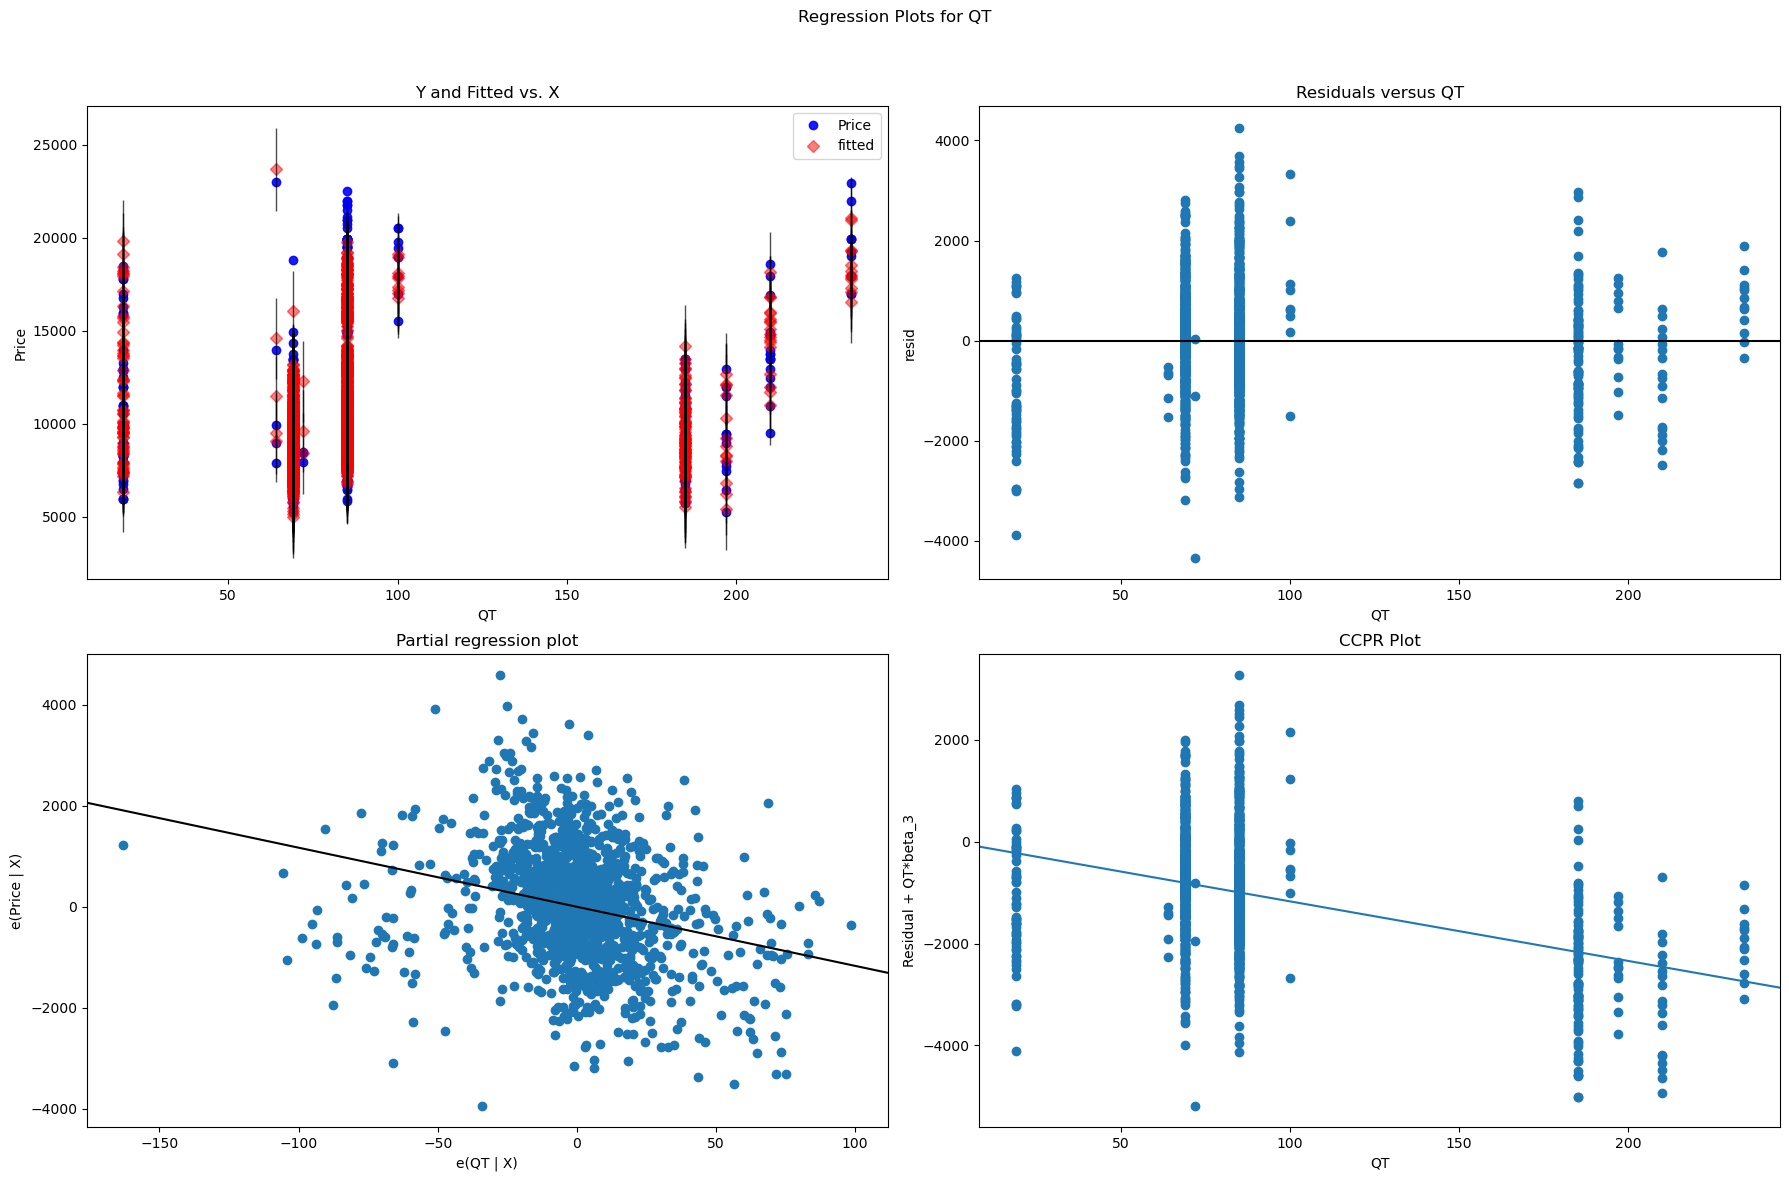

In [54]:
sm.graphics.plot_regress_exog(final_model,'QT', fig =plt.figure(figsize=[18,12]))
plt.show()

eval_env: 1


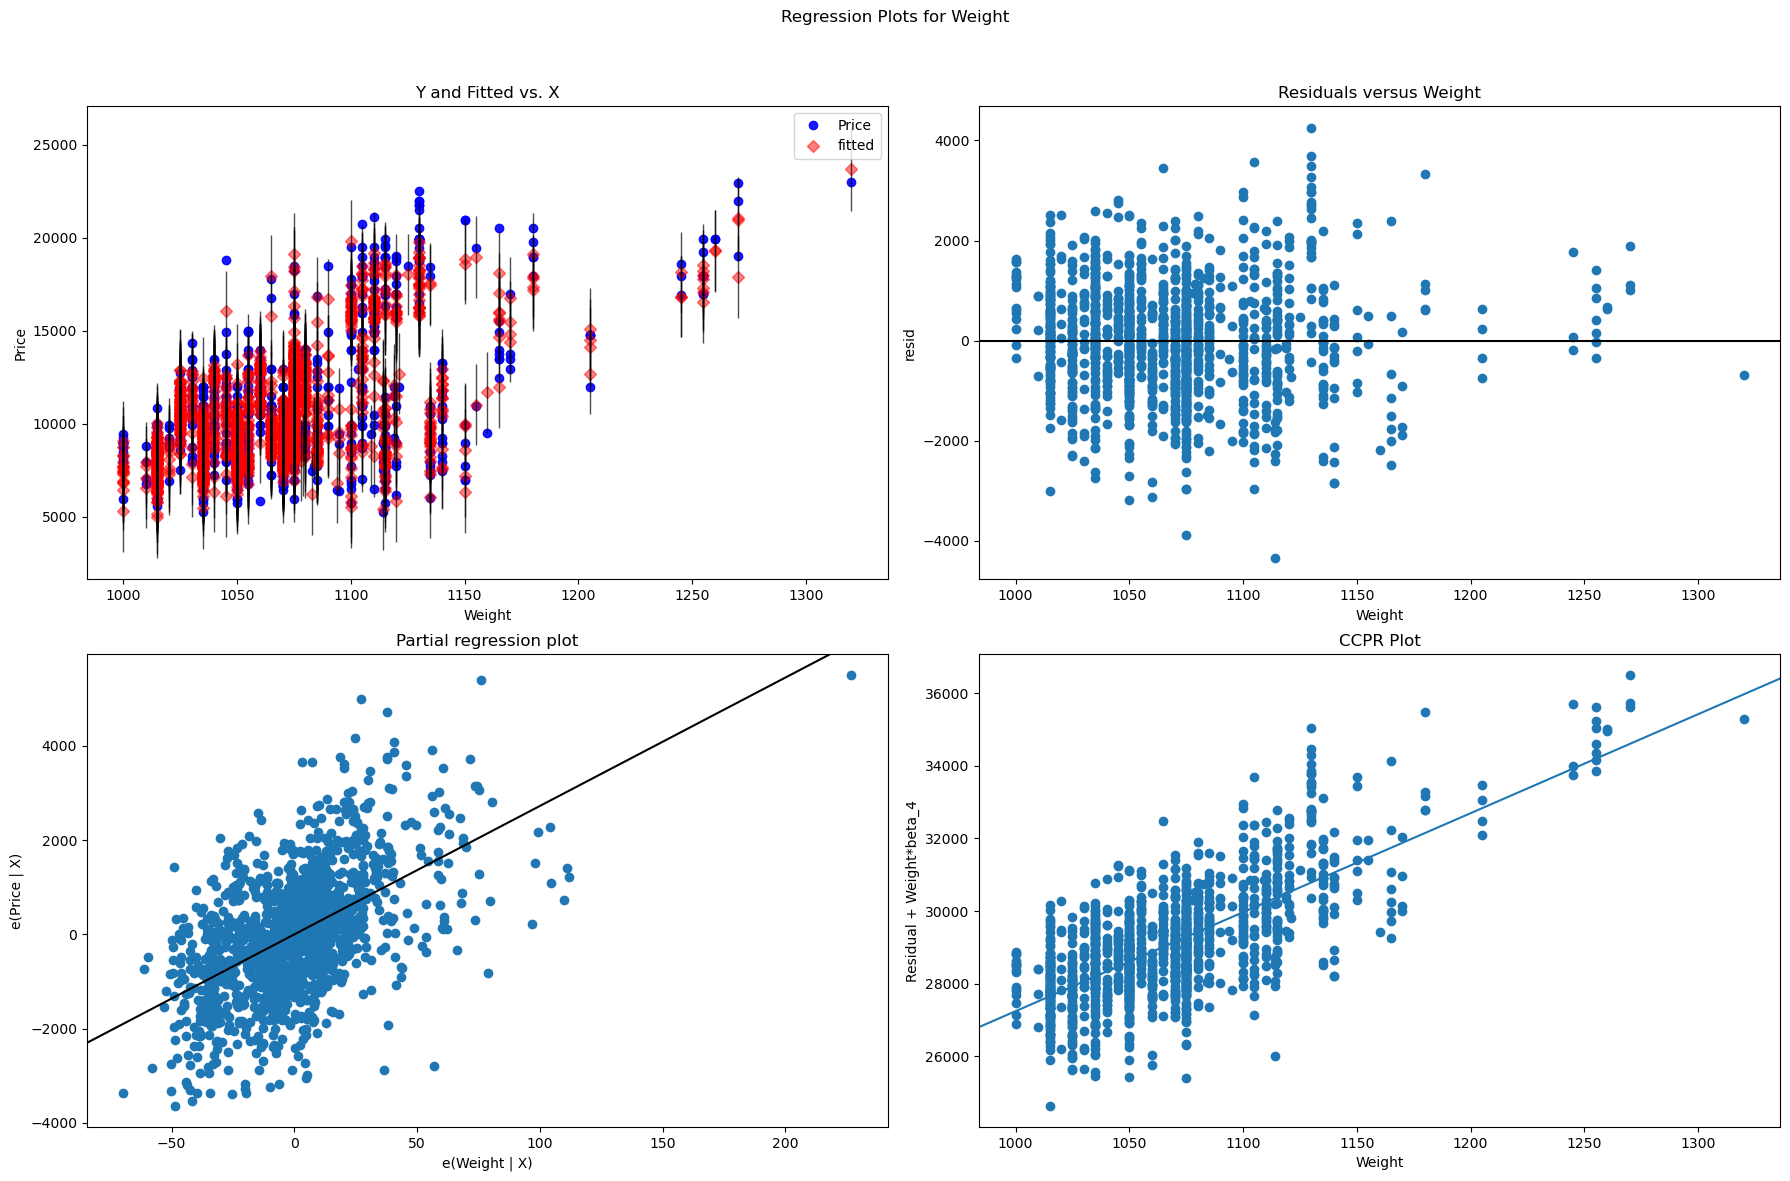

In [55]:
sm.graphics.plot_regress_exog(final_model,'Weight', fig =plt.figure(figsize=[18,12]))
plt.show()

###### Cook's Distance

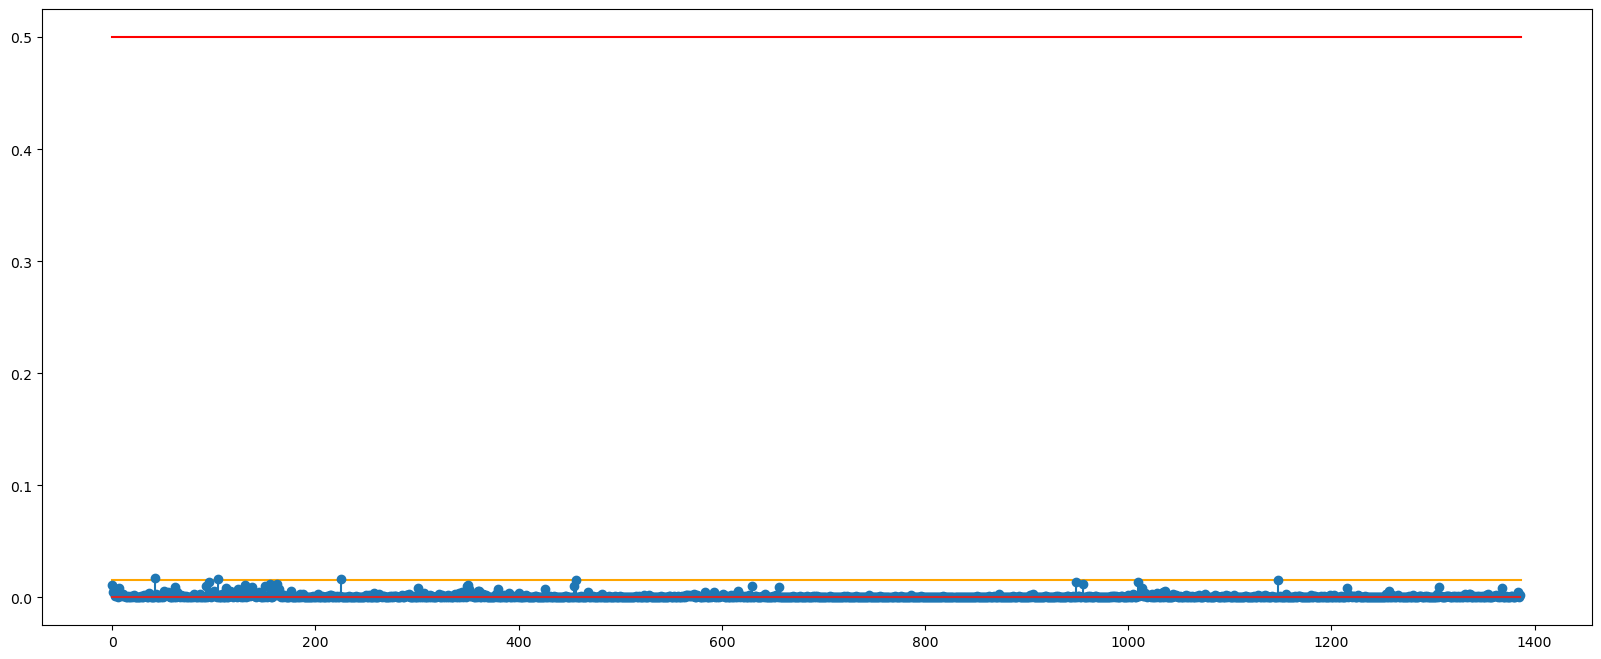

In [56]:
(c2,_) = final_model.get_influence().cooks_distance
np.max(c2),np.argmax(c2)
k1 = df1.shape[1]
n1 = df1.shape[0]
lc_off = (3*(k1+1))/n1
lc_off
x=[0,len(df1)]
y = [lc_off,lc_off]
y1 = [0.5,0.5]
plt.figure(figsize=(20,8))
plt.plot(x,y, c='orange')
plt.plot(x,y1,c='red')
plt.stem(np.arange(len(df1)), np.round(c2, 3))
plt.show()

In [57]:
predicted = data.copy()
predicted['Predicted Price'] = final_model.predict(data)
predicted

Age     KM     HP    CC  Doors  Gears   QT  Weight  Price  \
0      23  46986   90.0  2000      3      5  210    1165  13500   
1      23  72937   90.0  2000      3      5  210    1165  13750   
2      24  41711   90.0  2000      3      5  210    1165  13950   
3      26  48000   90.0  2000      3      5  210    1165  14950   
4      30  38500   90.0  2000      3      5  210    1170  13750   
...   ...    ...    ...   ...    ...    ...  ...     ...    ...   
1431   69  20544   86.0  1300      3      5   69    1025   7500   
1432   72  19000   86.0  1300      3      5   69    1015  10845   
1433   71  17016   86.0  1300      3      5   69    1015   8500   
1434   70  16916   86.0  1300      3      5   69    1015   7250   
1435   76      1  110.0  1600      5      5   19    1114   6950   

      Predicted Price  
0        15982.214468  
1        15506.025617  
2        15964.945635  
3        15621.420106  
4        15475.723350  
...               ...  
1431      9056.475255  
1432      8470.152587  
1433      8620.620713  
1434      8736.518311  
1435     11645.216883  

[1435 rows x 10 columns]

In [58]:
Models = pd.DataFrame({'Model Name':['Raw Model','Improved Model','Final Model'],
                      'R-Squared value':[raw_model.rsquared,improved_model.rsquared,final_model.rsquared],
                      'Adj R-Squared value':[raw_model.rsquared_adj,improved_model.rsquared_adj,final_model.rsquared_adj],
                      'RMSE Value':[np.sqrt(raw_model.mse_resid),np.sqrt(improved_model.mse_resid),np.sqrt(final_model.mse_resid)]})
Models

Model Name  R-Squared value  Adj R-Squared value   RMSE Value
0       Raw Model         0.861566             0.861081  1345.040088
1  Improved Model         0.881130             0.880700  1107.148104
2     Final Model         0.881069             0.880725  1107.030186

#### The Model with  Highest Adj R-Squared and Lowest RMSE value is <font color ='green'> Final Model

###### Since Final model has the best Adjusted R-Square and Highest RMSE value among all the models, It is the 'BEST' model